In [1]:
import os, glob, pickle
import numpy as np
from utils.training import train_cplmixVAE
from utils.eval_models import eval_mixmodel
from utils.cluster_analysis import K_selection
from scipy.optimize import linear_sum_assignment
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.axes_grid1 import make_axes_locatable
%matplotlib inline

ModuleNotFoundError: No module named 'utils'

In [2]:
n_run = 1
n_categories = 15
state_dim = 15
n_arm = 2
tau = .1
fc_dim = 100
latent_dim = 30
lr = 0.001
p_drop = .2
batch_size = 1000
n_epoch = 1000
n_epoch_p = 1000
n_gene = 9881 # 7688 #9881
subclass_ = 'L2-3-IT'
subclass = 'L2-3IT'
ttype = ['L2/3 IT_2']
device = None

In [3]:
path = os.getcwd()
data_path = f'/data/AD_MTG_{subclass_}_nGene_{n_gene}_nDonor_84.p'
data_path = path + str(data_path)
folder_name = f'{subclass}_run_{n_run}_NoIT2_K_{n_categories}_Sdim_{state_dim}_ngene_{n_gene}_fcDim_{fc_dim}_latDim_{latent_dim}_lr_{lr}_pDrop_{p_drop}_n_arm_{n_arm}_tau_{tau}_bsize_{batch_size}_nepoch_{n_epoch}_nepochP_{n_epoch_p}'
saving_folder = path + "/results/"
saving_folder = saving_folder + str(folder_name)

In [4]:
models = glob.glob(saving_folder + '/model/cpl_mixVAE_model_*')
cpl_mixVAE, data, sum_dict = eval_mixmodel(n_categories=n_categories, 
                                       state_dim=state_dim, 
                                       n_arm=n_arm,
                                       latent_dim=latent_dim,
                                       fc_dim=fc_dim,
                                       tau=tau,
                                       subclass=subclass,
                                       ttype=ttype,
                                       saving_folder=saving_folder, 
                                       data_path=data_path,
                                       device=device,
                                       models=models)
n_pruning = len(sum_dict['cT_vs_cT'])
with open(saving_folder + f'/sum_dict_{n_pruning}.npy', 'wb') as f:
    np.save(f, sum_dict)
    
f.close()  

loading AD L2-3IT data ... 
Data is loaded
['L2/3 IT_1' 'L2/3 IT_10' 'L2/3 IT_12' 'L2/3 IT_13' 'L2/3 IT_3'
 'L2/3 IT_5' 'L2/3 IT_6' 'L2/3 IT_7' 'L2/3 IT_8']
using CPU ...
/Users/yeganeh.marghi/github/cplmix_AD/results/L2-3IT_run_1_NoIT2_K_15_Sdim_15_ngene_9881_fcDim_100_latDim_30_lr_0.001_pDrop_0.2_n_arm_2_tau_0.1_bsize_1000_nepoch_1000_nepochP_1000/model/cpl_mixVAE_model_after_pruning_1_2022-10-17-16-51-41.pth
/Users/yeganeh.marghi/github/cplmix_AD/results/L2-3IT_run_1_NoIT2_K_15_Sdim_15_ngene_9881_fcDim_100_latDim_30_lr_0.001_pDrop_0.2_n_arm_2_tau_0.1_bsize_1000_nepoch_1000_nepochP_1000/model/model_eval
/Users/yeganeh.marghi/github/cplmix_AD/results/L2-3IT_run_1_NoIT2_K_15_Sdim_15_ngene_9881_fcDim_100_latDim_30_lr_0.001_pDrop_0.2_n_arm_2_tau_0.1_bsize_1000_nepoch_1000_nepochP_1000/model/cpl_mixVAE_model_after_pruning_5_2022-10-17-16-51-41.pth
/Users/yeganeh.marghi/github/cplmix_AD/results/L2-3IT_run_1_NoIT2_K_15_Sdim_15_ngene_9881_fcDim_100_latDim_30_lr_0.001_pDrop_0.2_n_arm_2_tau_0.

/Users/yeganeh.marghi/github/cplmix_AD/utils/cluster_analysis.py:165: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax1 = fig_1.add_subplot()


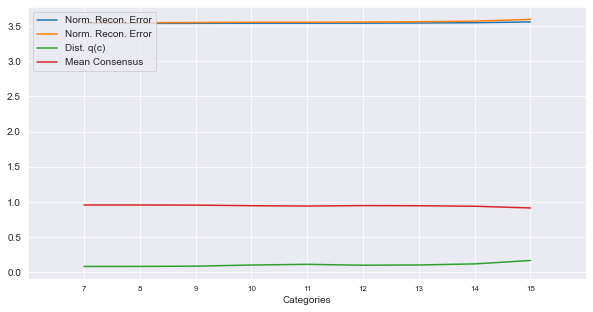

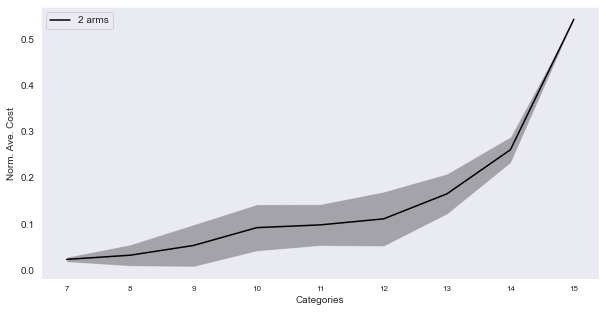

In [5]:
fig1, fig2 = K_selection(sum_dict, n_categories, n_arm, n_gene)

In [4]:
model_order = 9
selected_model = glob.glob(saving_folder + '/model/cpl_mixVAE_model_after_pruning_' + str(n_categories - model_order) + '*')[0]
# selected_model = glob.glob(saving_folder + '/model/cpl_mixVAE_model_before_pruning_*')[0]
cpl_mixVAE, data, outcome = eval_mixmodel(n_categories=n_categories, 
                           state_dim=state_dim, 
                           n_arm=n_arm,
                           latent_dim=latent_dim,
                           fc_dim=fc_dim,
                           tau=tau,
                           subclass=subclass,
                           ttype=ttype,
                           saving_folder=saving_folder, 
                           data_path=data_path,
                           all_data=True,
                           device=device,
                           models=[selected_model])

loading AD L2-3IT data ... 
Data is loaded
['L2/3 IT_1' 'L2/3 IT_10' 'L2/3 IT_12' 'L2/3 IT_13' 'L2/3 IT_3'
 'L2/3 IT_5' 'L2/3 IT_6' 'L2/3 IT_7' 'L2/3 IT_8']
using CPU ...
/Users/yeganeh.marghi/github/cplmix_AD/results/L2-3IT_run_1_NoIT2_K_15_Sdim_15_ngene_9881_fcDim_100_latDim_30_lr_0.001_pDrop_0.2_n_arm_2_tau_0.1_bsize_1000_nepoch_1000_nepochP_1000/model/cpl_mixVAE_model_after_pruning_6_2022-10-17-16-51-41.pth
/Users/yeganeh.marghi/github/cplmix_AD/results/L2-3IT_run_1_NoIT2_K_15_Sdim_15_ngene_9881_fcDim_100_latDim_30_lr_0.001_pDrop_0.2_n_arm_2_tau_0.1_bsize_1000_nepoch_1000_nepochP_1000/model/model_eval


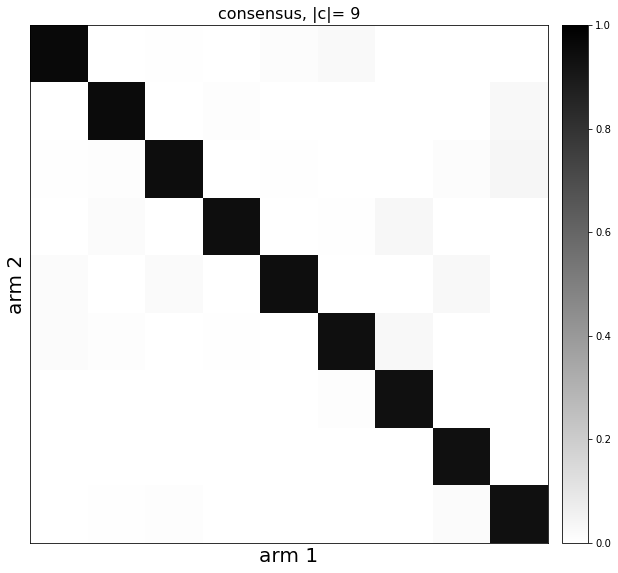

In [5]:
plt.figure(figsize=[10,10])
ax = plt.gca()
im = ax.imshow(outcome['consensus'][0], cmap='binary', vmax=1)
plt.xlabel('arm 1', fontsize=20)
plt.ylabel('arm 2', fontsize=20)
plt.xticks([])
plt.yticks([])
plt.title('consensus, |c|= ' + str(outcome['consensus'][0].shape[0]), fontsize=16)
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.2)
plt.colorbar(im, cax=cax)

[8 2 4 5 0 3 1 6 7]
[8 2 4 5 0 3 1 6 7]
[8 2 4 5 0 3 1 6 7]
[8 2 4 5 0 3 1 6 7]


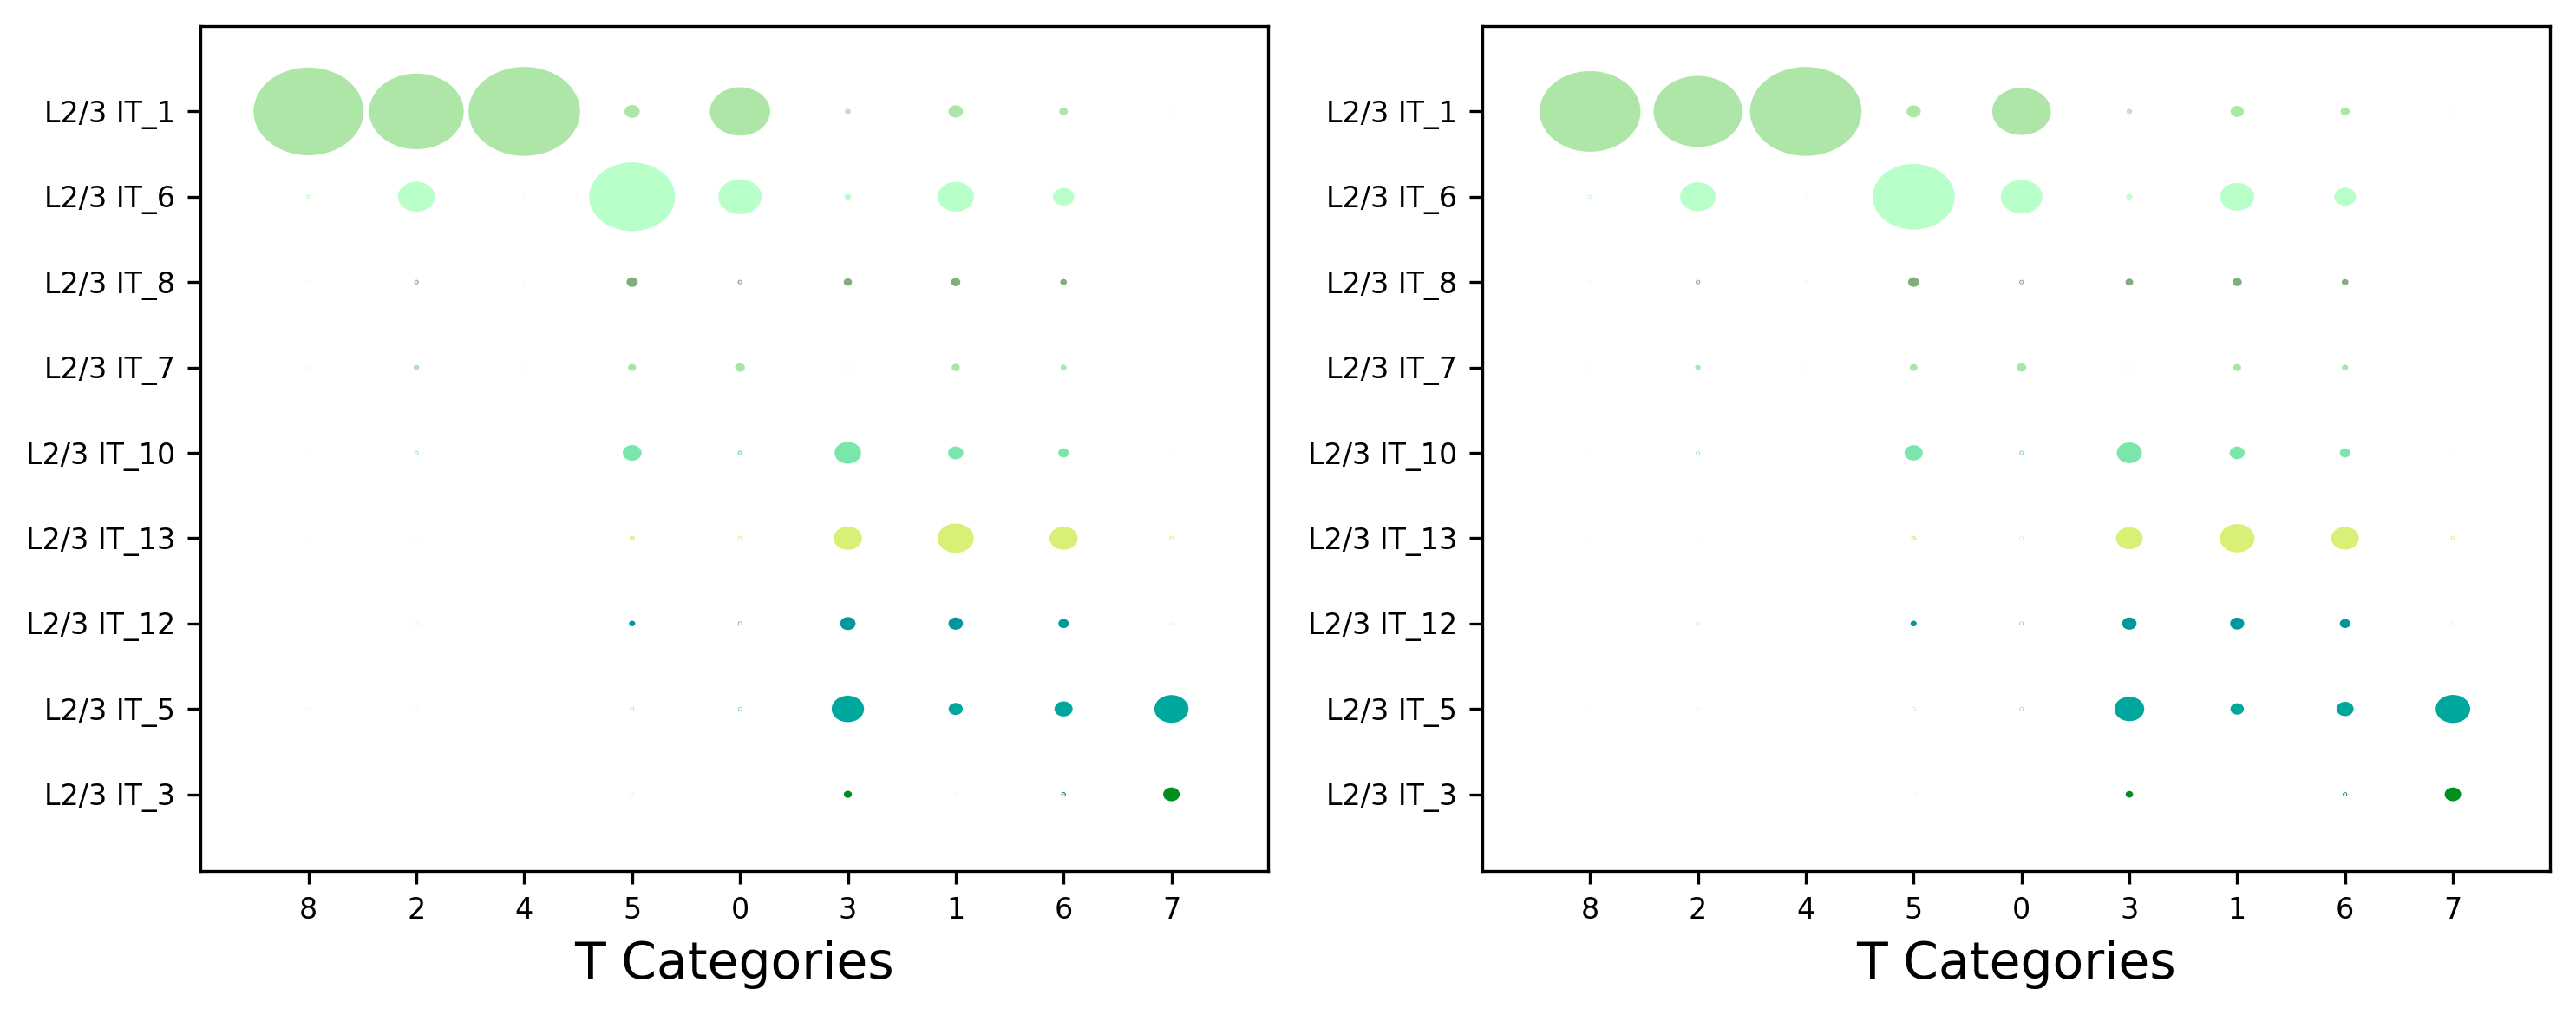

In [6]:
data['supertype_scANVI'] = np.array(data['supertype_scANVI'])
# T_class = np.unique(data['supertype_scANVI'])
uniq_labels = np.unique(data['label'])
color = ['#ADE6A6', '#B8FFCA', '#82AD7D', '#A6E6A9', '#7AE6AB', '#D9F077',
       '#00979D', '#00A79D', '#008F1F', '#53879D']
#         , '#2F8C4D', '#33A9CE',
#        '#0094C2', '#005C07', '#669D6A', '#00879D', '#00A809', '#26BF64',
#        '#00FF00', '#00DDC5', '#26FFF2', '#3D9946', '#008F39', '#73CA95',]
data['color'] = np.copy(data['cluster_color'])
uniq_clr, T_class, num_Tclass = [], [], []

for i_type, ttype in enumerate(uniq_labels):
    idx = np.where(data['label'] == ttype)[0]
    data['color'][idx] = color[i_type]
    uniq_clr.append(color[i_type])
    T_class.append(data['supertype_scANVI'][idx[0]])
    num_Tclass.append(len(idx))

cT_vs_cT = outcome['cT_vs_cT'][0]
confm = np.zeros((n_arm, len(T_class), model_order))
fig, axs = plt.subplots(1, n_arm, figsize=(10, 4), dpi=300)

T_class = np.array(T_class)
class_reord = np.array([1, 2, 7, 8, 6, 4, 5, 3, 0])
class_reord = class_reord[::-1].astype(int)

for arm in range(n_arm): 
    categories = np.unique(outcome['pred_label'][-1][arm]).astype(int)
    perform_mat = cT_vs_cT[arm, class_reord, :]
    row_sum = perform_mat.sum(axis=1)
    confm[arm, :, :] = np.divide(perform_mat, row_sum[:, np.newaxis], 
                        out=np.zeros_like(perform_mat), 
                        where=row_sum[:, np.newaxis]!=0)
    row_ind, col_ind = linear_sum_assignment(1 - perform_mat)

    if model_order > len(T_class):
        not_used_cat = [a for a in range(model_order) if a not in list(col_ind)]
        cat_indx = np.concatenate((col_ind, np.array(not_used_cat)))
    else:
        cat_indx = col_ind
        
    cat_indx = np.array([8, 2, 4, 5, 0, 3, 1, 6, 7])
    print(cat_indx)

    sort_idx = [np.argsort(perform_mat[it, :])[::-1] for it in range(len(T_class))]  
    sort_idx = np.vstack(sort_idx).astype(int)
    indexes = np.unique(sort_idx[:, 0], return_index=True)[1]
    max_idx = [sort_idx[:,0][index] for index in sorted(indexes)]
    max_c_ind = -1 * np.ones(model_order) #sort_idx[:,0]
    rep_c = np.zeros(len(max_idx))
# #     if model_order > len(T_class):
#     not_used_cat = [a for a in range(model_order) if a not in max_idx]
#     match_ind = [np.where(nuc == col_ind)[0][0] for nuc in not_used_cat]
#     not_used_cat = np.array(not_used_cat)[np.argsort(match_ind)]
#     jump = 0
#     for cc in not_used_cat:
#         colm = np.argmax(perform_mat[:, cc].astype(int))
#         find_indx = np.where(sort_idx[colm, 0] == max_idx)[0][0]
#         rep_c[find_indx] += 1
#         if max_c_ind[find_indx+int(rep_c[find_indx])] > 0:
#             jump += 1
#         max_c_ind[find_indx+int(sum(rep_c))] = cc
#         print(cc, find_indx+int(rep_c[find_indx])+jump)
    
#     print(max_c_ind)
#     tmp_idx = np.where(max_c_ind==-1)[0]
#     max_c_ind[tmp_idx] = max_idx
#     cat_indx = max_c_ind.astype(int)
    print(cat_indx)
    
#     else:
#         cat_indx = sort_idx[:, 0]

    mtx = perform_mat[:, cat_indx] / np.max(perform_mat[:, cat_indx]) / 2
    for l in range(len(T_class)):
        for col in range(model_order):
            xy = np.array([col, l])
            axs[arm].add_patch(plt.Circle(xy, radius=(mtx[l, col]), color=color[l]))
    axs[arm].set_xlim([-1, model_order-.1])
    axs[arm].set_ylim([-1, len(T_class)-.1])
    axs[arm].invert_yaxis()
    axs[arm].set_yticks(np.arange(len(T_class)))
    axs[arm].set_xticks(np.arange(model_order))
    axs[arm].set_yticklabels(T_class[class_reord], fontsize=8)
    axs[arm].set_xticklabels(cat_indx, fontsize=8) # categories[cat_indx], fontsize=8
    axs[arm].set_xlabel('T Categories', fontsize=14)
#     axs[0].set_ylabel('Supertypes', fontsize=14)

fig.tight_layout()

In [20]:
sort_idx = [np.argsort(perform_mat[it, :])[::-1] for it in range(len(T_class))]  
sort_idx = np.vstack(sort_idx).astype(int)

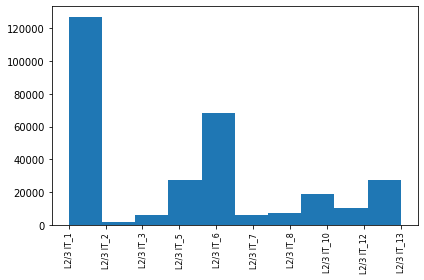

[126984, 1810, 5909, 27503, 68226, 6298, 7453, 19008, 10581, 27601] 301373


In [7]:
plt.figure()
plt.hist(data['label'])
    
plt.xticks(uniq_labels, T_class, fontsize=8, rotation=90)
plt.tight_layout()
plt.savefig(saving_folder + '/subclass_posterior.png', dpi=600)
plt.show()
print(num_Tclass, sum(num_Tclass))


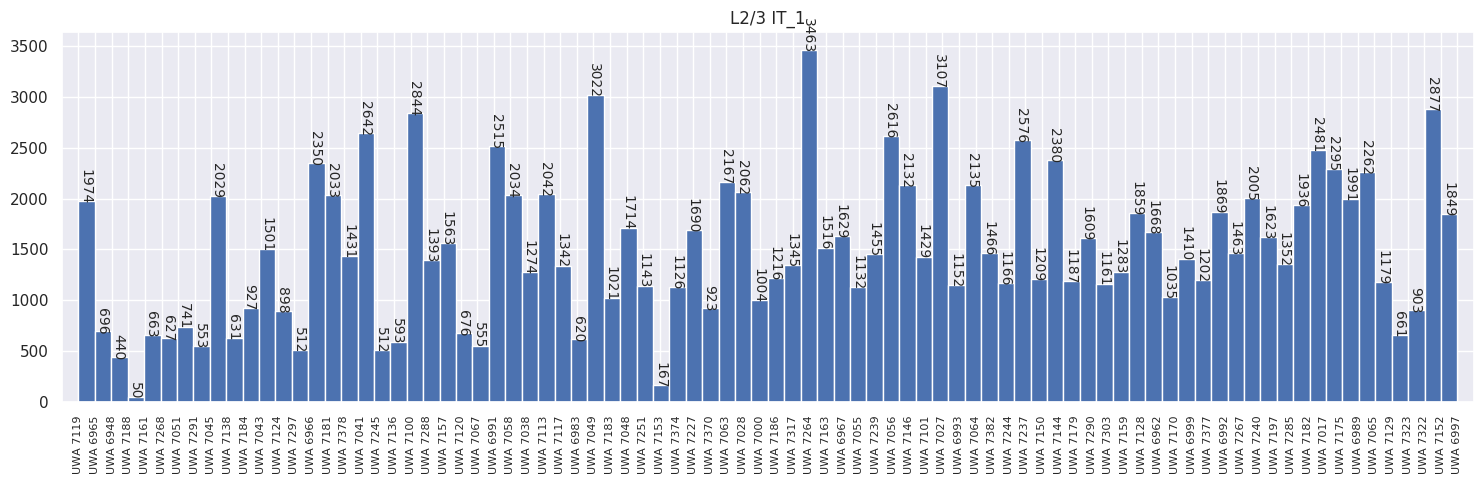

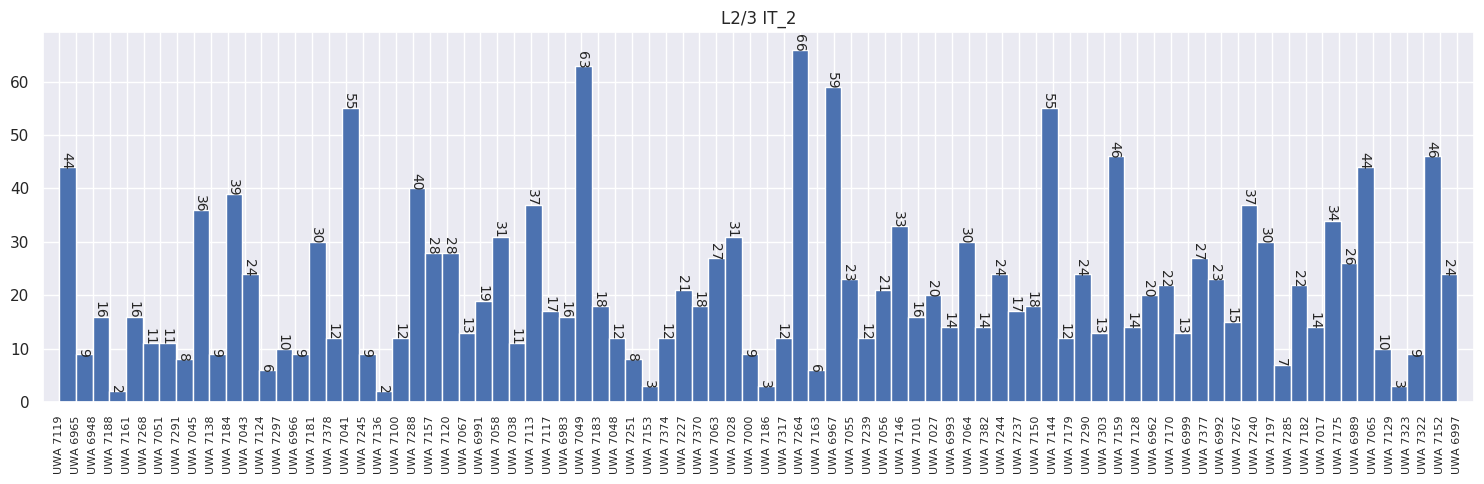

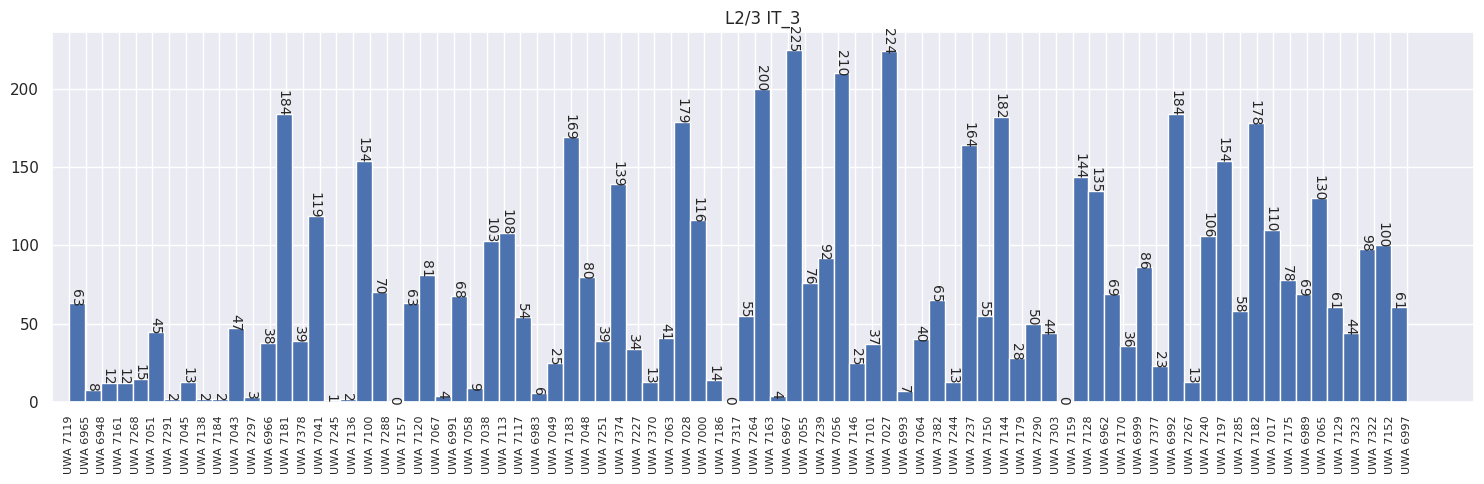

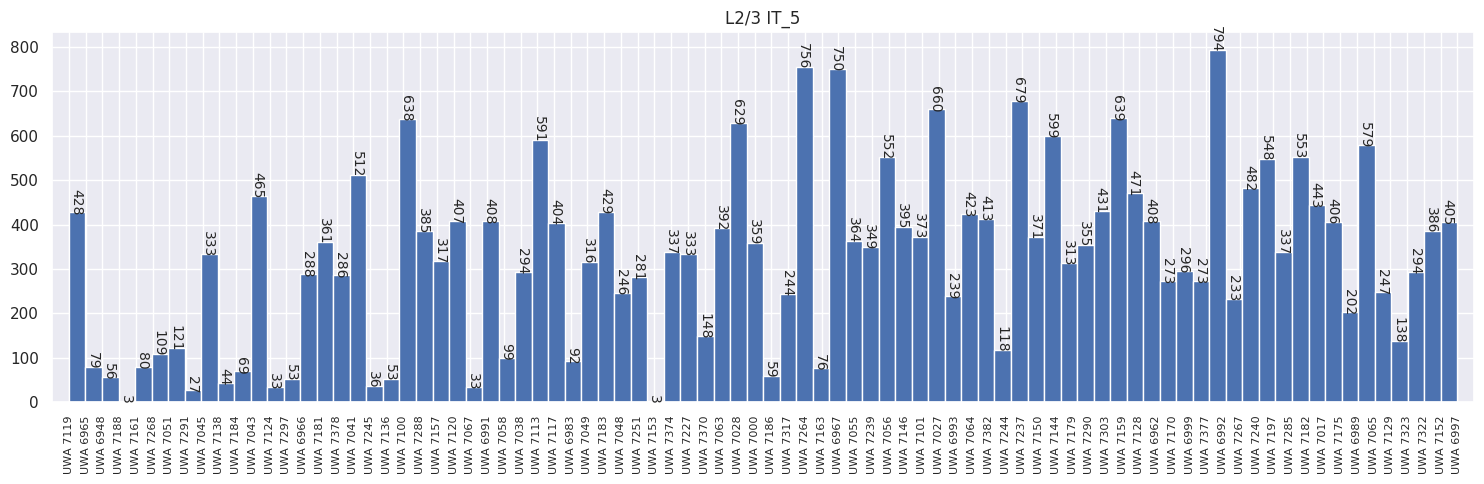

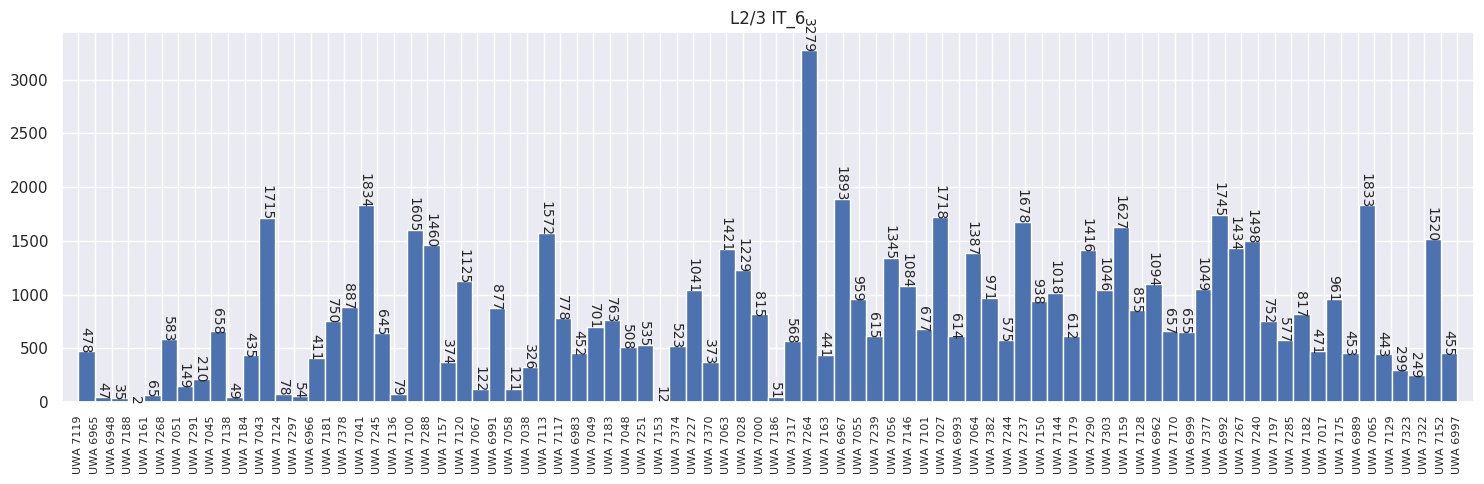

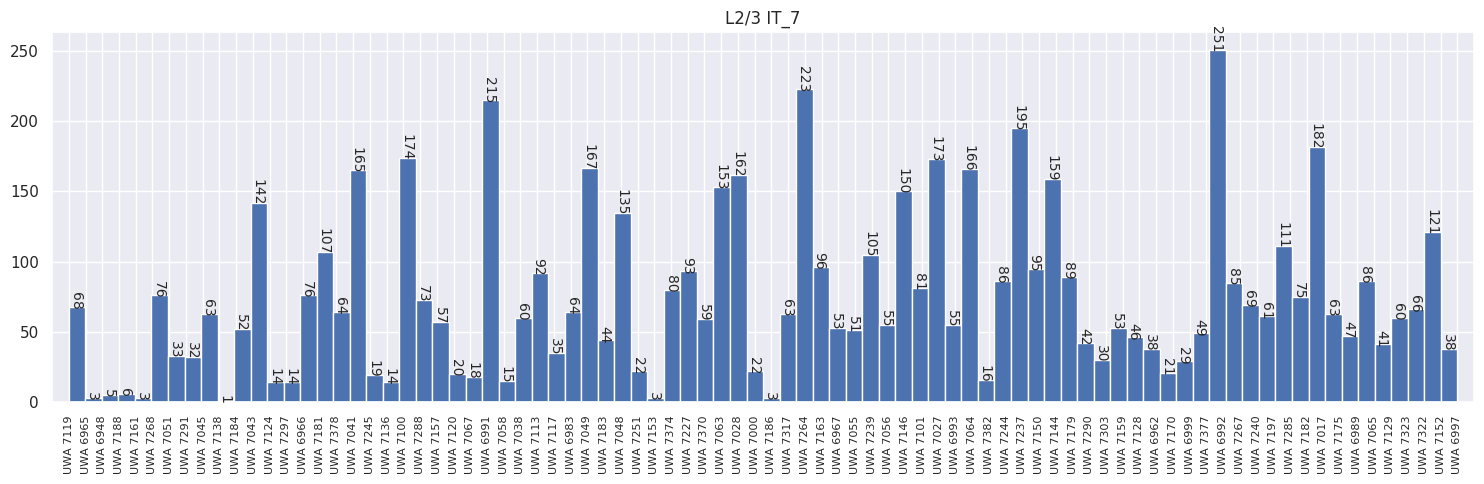

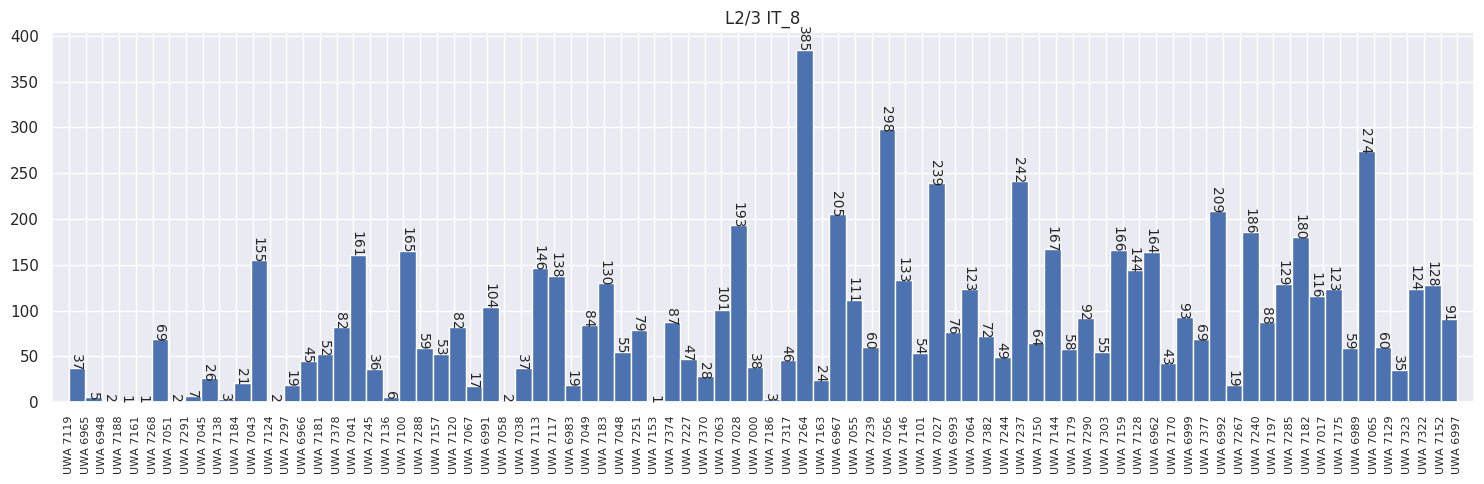

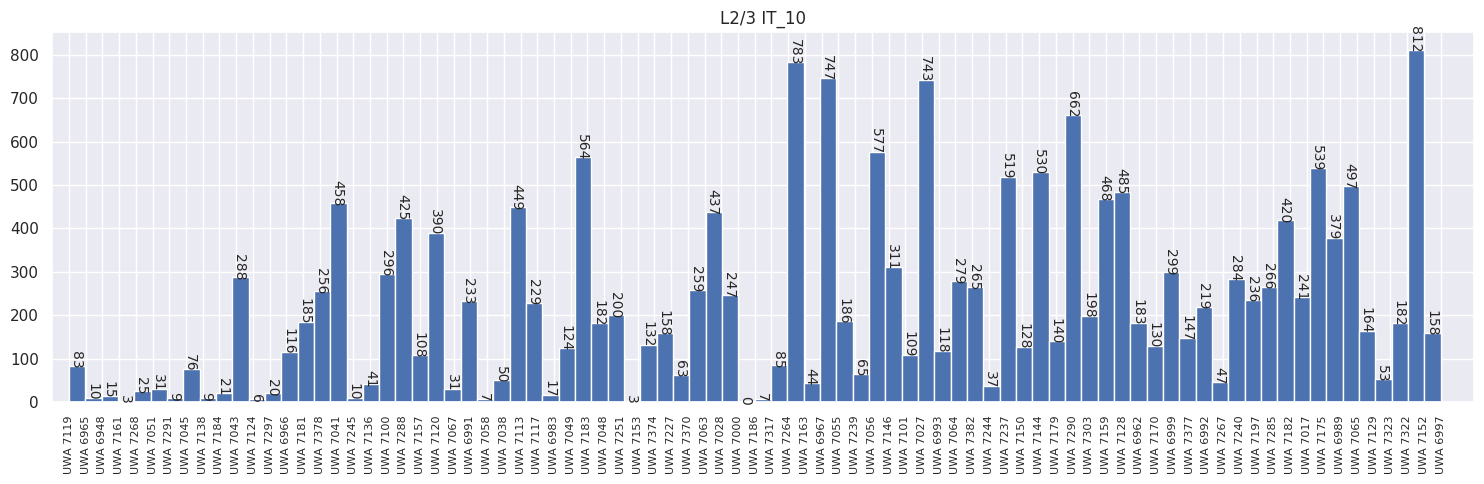

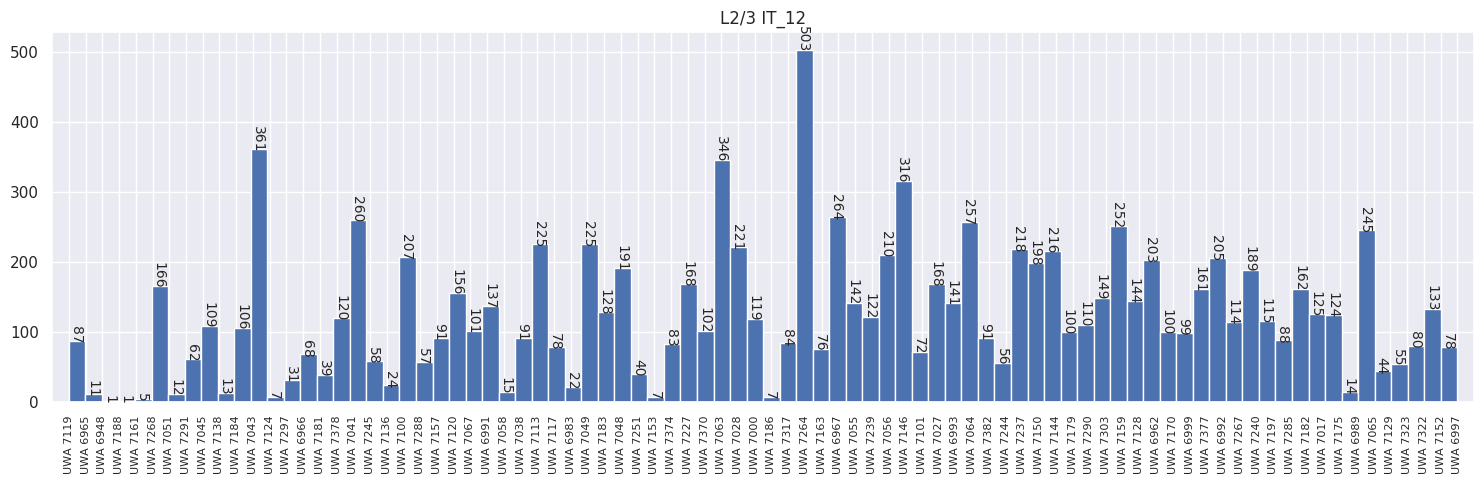

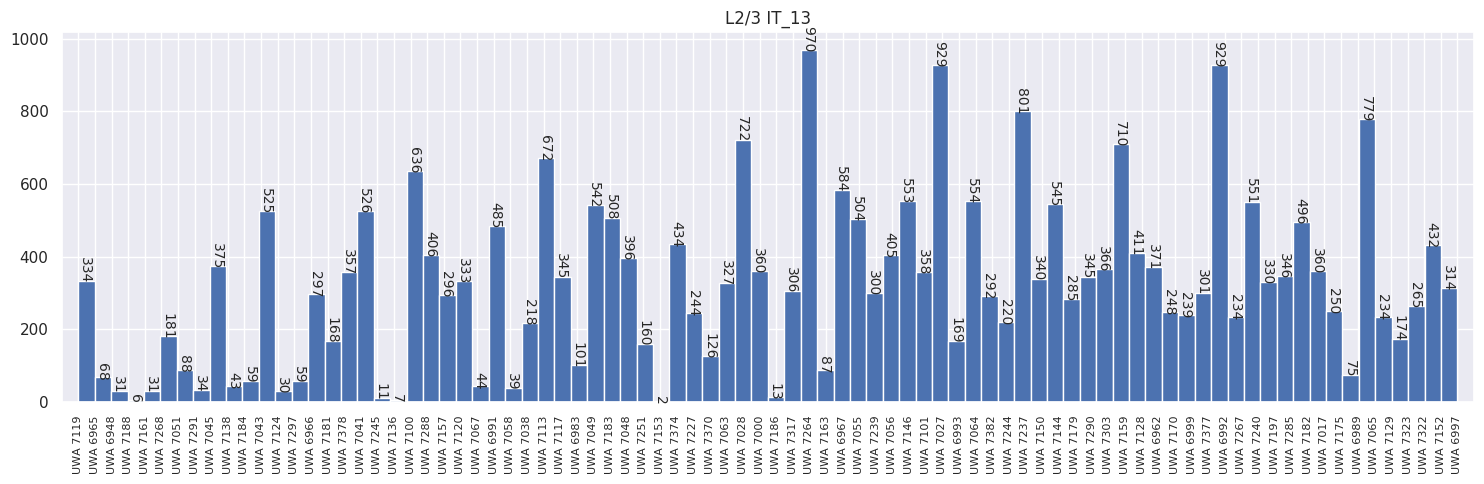

In [8]:
uniq_d = np.unique(data['external_donor_name'])
for ic, c in enumerate(T_class):
    plt.figure(figsize=[15, 5],dpi=100)
    hist = plt.hist(data['external_donor_name'][data['supertype_scANVI']==c], bins=len(uniq_d))
    for x,y in zip(hist[1], hist[0]):
        plt.text(x, y+.1, str(int(y)), fontsize=10, rotation=270)
        
    plt.xticks(fontsize=8, rotation=90)
    plt.xlim(-1, len(uniq_d))
    plt.title(c)
    plt.tight_layout()
    plt.savefig(saving_folder + '/supertype_' + str(ic) + '_distribution.png', dpi=600)
    plt.show()

/Users/yeganeh.marghi/miniconda3/envs/tf14-cpu/lib/python3.7/site-packages/ipykernel_launcher.py:36: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


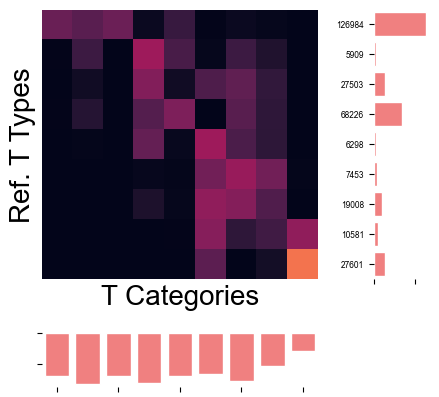

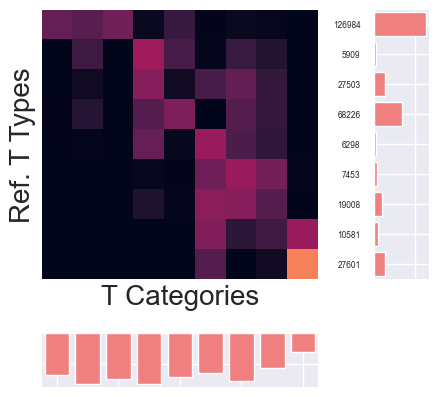

In [7]:
for arm in range(n_arm):
    fig = plt.figure(figsize=(5, 5), dpi=100)
    grid = plt.GridSpec(4, 4, hspace=1, wspace=1)
    ax_main = fig.add_subplot(grid[:-1, :-1])
    ax_right = fig.add_subplot(grid[:-1, -1], xticklabels=[])
    ax_bottom = fig.add_subplot(grid[-1, 0:-1], xticklabels=[], yticklabels=[])
    sns.set(font_scale=1.)
    sns.heatmap(np.squeeze(confm[arm, :, cat_indx].T), vmin=0, xticklabels=[], yticklabels=[], vmax=1, ax=ax_main, cbar=False)
    ax_main.set_ylabel('Ref. T Types', fontsize=20)
    ax_main.set_xlabel('T Categories', fontsize=20)
    ax_main.set_yticklabels(ax_main.get_yticklabels())

    # histogram on the right
    perform_mat = cT_vs_cT[arm, :, :]
    ax_bottom.bar(np.arange(model_order), np.sum(perform_mat[:, cat_indx], axis=0), color='lightcoral')
    # ax_bottom.set_ylim([0, 300])
    ax_bottom.invert_yaxis()
    ax_bottom.set_xlim([-.5, model_order-.5])
    ax_bottom.spines['top'].set_visible(False)
    ax_bottom.spines['right'].set_visible(False)
    ax_bottom.spines['bottom'].set_visible(False)
    ax_bottom.spines['left'].set_visible(False)

    # histogram in the bottom
    ax_right.barh(np.arange(len(T_class)), np.sum(perform_mat[:, cat_indx], axis=1).T, color='lightcoral')
    ax_right.set_ylim([-.5, len(T_class)-.5])
    # ax_right.set_xlim([0, 300])
    ax_right.set_yticks(np.arange(len(T_class)))
    ax_right.invert_yaxis()
    ax_right.set_yticklabels(np.sum(perform_mat[:, cat_indx], axis=1).astype(int), fontsize=6)
    ax_right.spines['top'].set_visible(False)
    ax_right.spines['right'].set_visible(False)
    ax_right.spines['bottom'].set_visible(False)
    ax_right.spines['left'].set_visible(False)

    fig.tight_layout()
    plt.savefig(saving_folder + '/confmax_K_' + str(model_order) + '_arm_' + str(arm) + '.png', dpi=600)

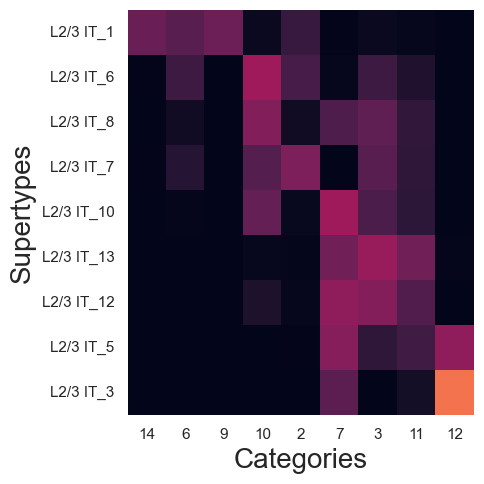

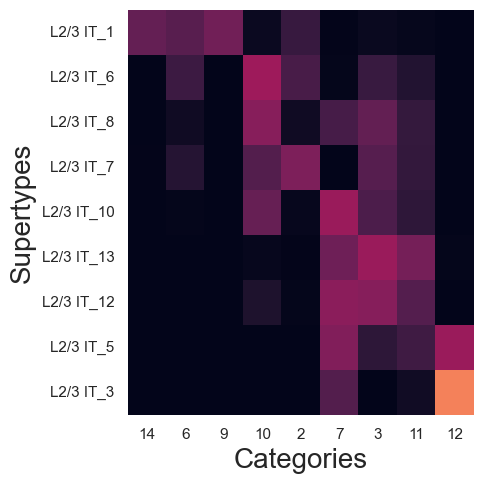

In [8]:
for arm in range(n_arm):
    fig = plt.figure(figsize=(5, 5), dpi=100)
    ax = fig.add_subplot()
    sns.set(font_scale=1.)
    sns.heatmap(np.squeeze(confm[arm, :, cat_indx].T), vmin=0, xticklabels=categories[cat_indx], 
                yticklabels=T_class[class_reord], vmax=1, ax=ax, cbar=False)
    ax.set_ylabel('Supertypes', fontsize=20)
    ax.set_xlabel('Categories', fontsize=20)
    fig.tight_layout()
    plt.savefig(saving_folder + '/confmax_' + subclass + '_arm_' + str(arm) + '.png', dpi=600)

In [9]:
path = os.getcwd()
ps_time_path = path + '/data/pseudotime.npy'
ps_time = np.load(ps_time_path)
data['ps_time'] = np.zeros(len(data['label']))
for idonor, donor in enumerate(np.unique(data['external_donor_name'])):
    idx0 = np.where(data['external_donor_name'] == donor)[0]
    n_donor = int(donor[donor.find(' ')+1:])
    idx1 = np.where(ps_time[0, :].astype(int) == n_donor)[0]
    data['ps_time'][idx0] = ps_time[1, idx1][0]

In [10]:
data['ps_time']

array([0.07148746, 0.07148746, 0.07148746, ..., 0.85038367, 0.85038367,
       0.85038367])

2.0
2.0 5
using CPU ...
Total loss: 0.014687601809522935
Total loss: 0.013101416506937571
Total loss: 0.012039270917219775
Total loss: 0.0145386311092547
Total loss: 0.009503312675016267
Total loss: 0.01104388093309743
Total loss: 0.01311073053096022
Total loss: 0.014679004837359701
Total loss: 0.01213321349184428
Total loss: 0.012315978562193257


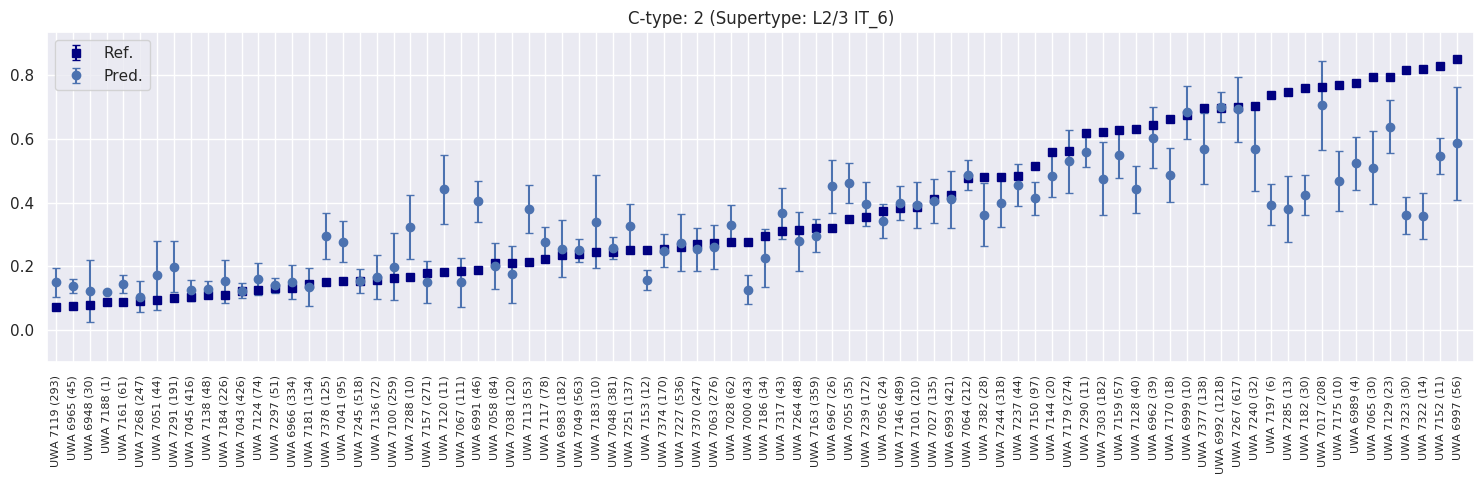

Pearsons correlation: 0.843
3.0


/home/yeganeh/miniconda3/envs/tf14-gpu/lib/python3.7/site-packages/ipykernel_launcher.py:116: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/yeganeh/miniconda3/envs/tf14-gpu/lib/python3.7/site-packages/ipykernel_launcher.py:117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


3.0 3
using CPU ...
Total loss: 0.019978255266323686
Total loss: 0.02451158834931751
Total loss: 0.015538190879548589
Total loss: 0.02220588061027229
Total loss: 0.021802417080228526
Total loss: 0.023053608291472
Total loss: 0.019758043345063925
Total loss: 0.02138765063136816
Total loss: 0.015541002076740066
Total loss: 0.0193821315964063


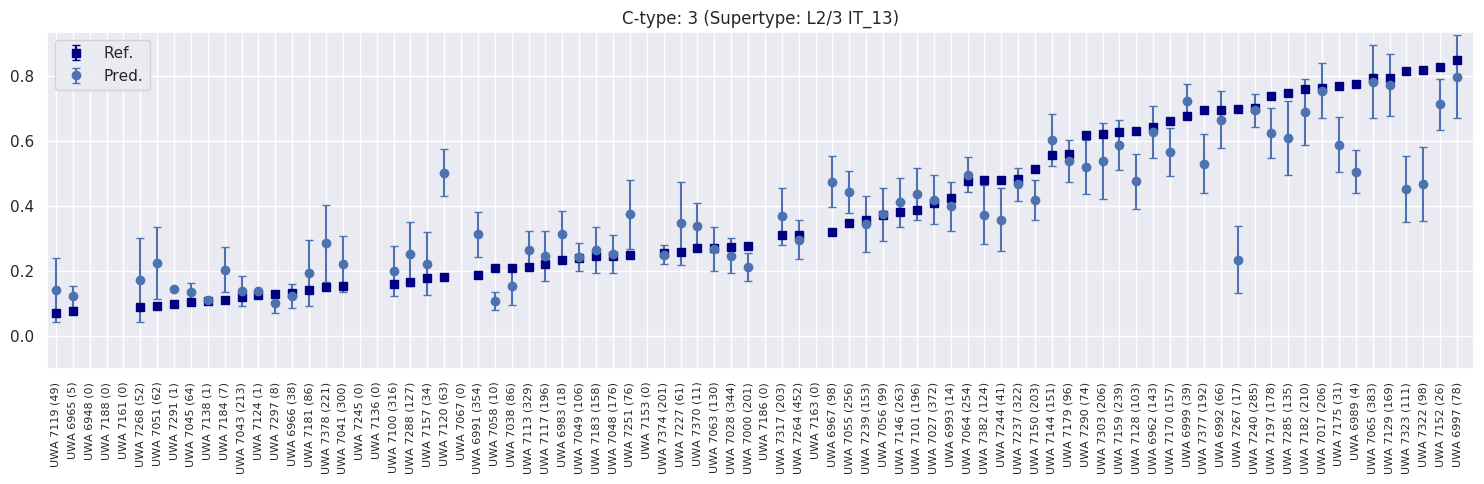

/home/yeganeh/miniconda3/envs/tf14-gpu/lib/python3.7/site-packages/ipykernel_launcher.py:112: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Pearsons correlation: 0.886
6.0
6.0 5
using CPU ...
Total loss: 0.014688466365138689
Total loss: 0.01673702949968477
Total loss: 0.020231241981188457
Total loss: 0.017302517080679536
Total loss: 0.016383240775515635
Total loss: 0.018631114158779383
Total loss: 0.016751376911997795
Total loss: 0.017692055165146787
Total loss: 0.019535292250414688
Total loss: 0.016569743553797405


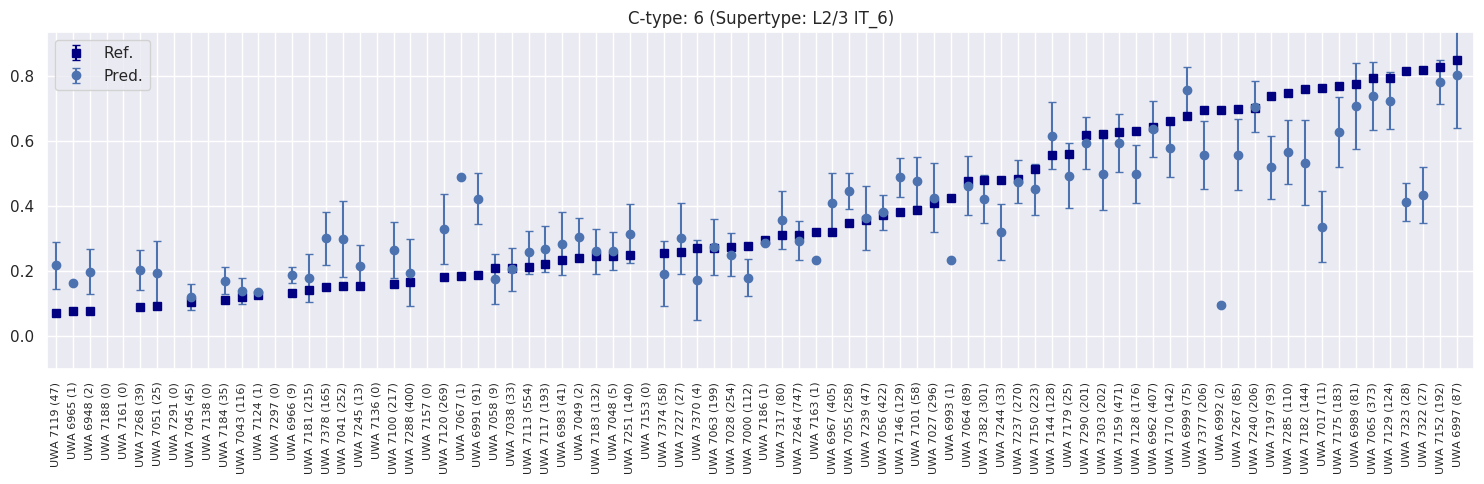

Pearsons correlation: 0.812
7.0
7.0 1
using CPU ...
Total loss: 0.016524689504876733
Total loss: 0.017114689107984304
Total loss: 0.017032721545547247
Total loss: 0.015359774231910706
Total loss: 0.018636907683685422
Total loss: 0.017309788847342134
Total loss: 0.015382639598101377
Total loss: 0.016451934352517128
Total loss: 0.015031830756925046
Total loss: 0.015714182518422604


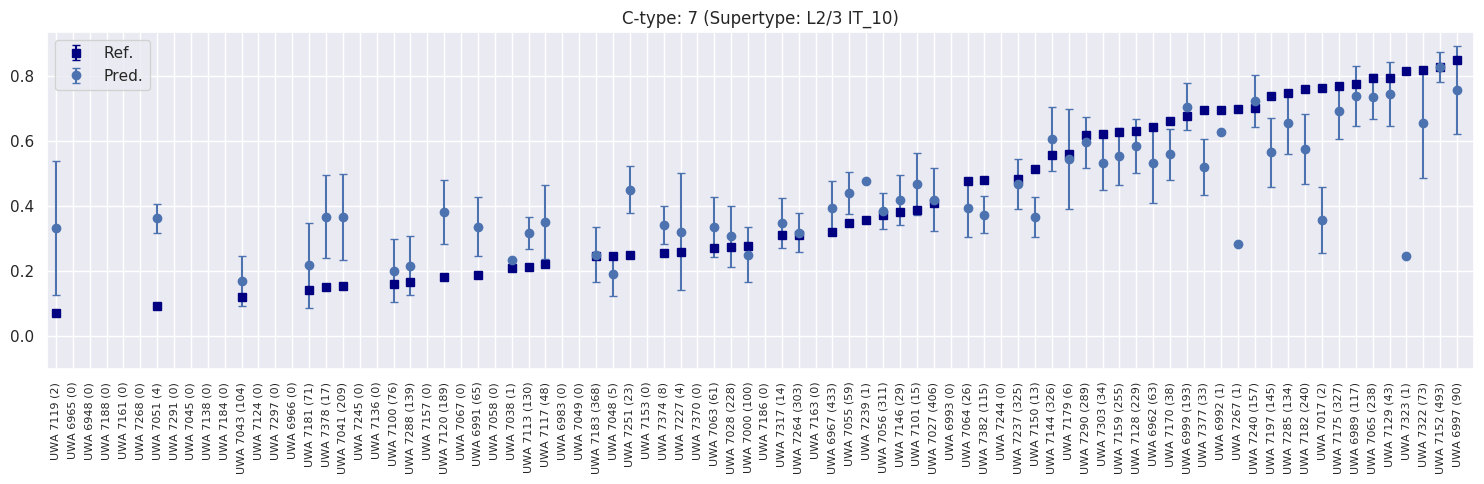

Pearsons correlation: 0.786
9.0
9.0 0
using CPU ...
Total loss: 0.011379909701645374
Total loss: 0.011010180822470121
Total loss: 0.011484404508438375
Total loss: 0.01079454591187338
Total loss: 0.011340916324924264
Total loss: 0.011356913898554113
Total loss: 0.0122560139797214
Total loss: 0.012819142003233234
Total loss: 0.011081877319763104
Total loss: 0.012800570861953828


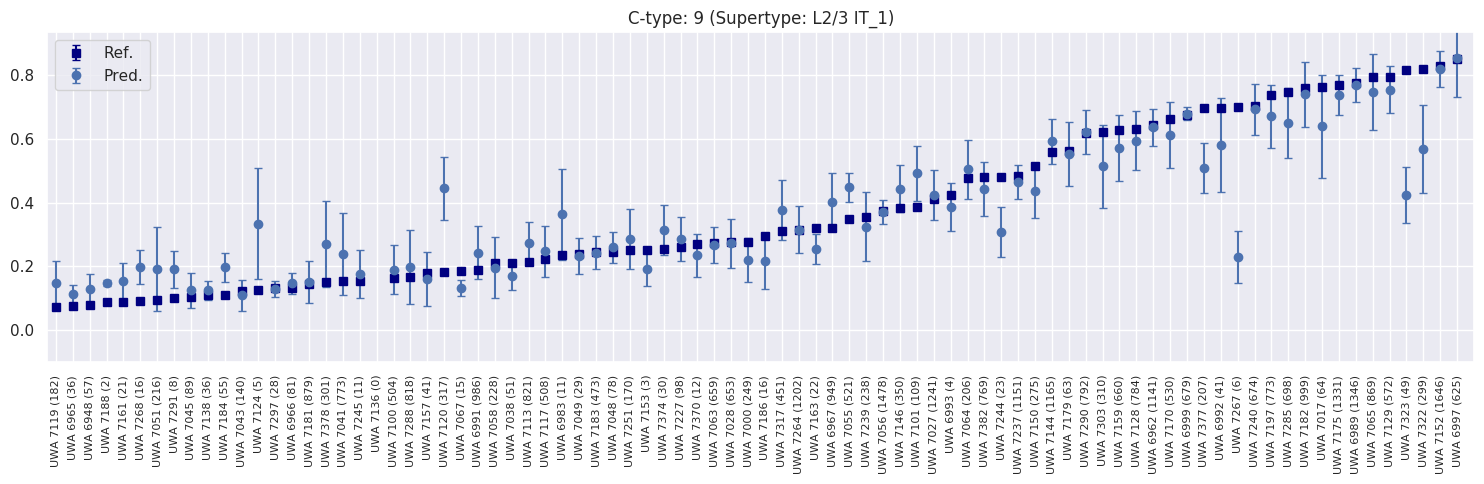

Pearsons correlation: 0.913
10.0
10.0 6
using CPU ...
Total loss: 0.009512611053651199
Total loss: 0.008579420362366363
Total loss: 0.009317216762740697
Total loss: 0.010306594943228577
Total loss: 0.008828859742996948
Total loss: 0.009945549403450318
Total loss: 0.011087766050228052
Total loss: 0.009200531324105603
Total loss: 0.009376717814510422
Total loss: 0.009667410565141057


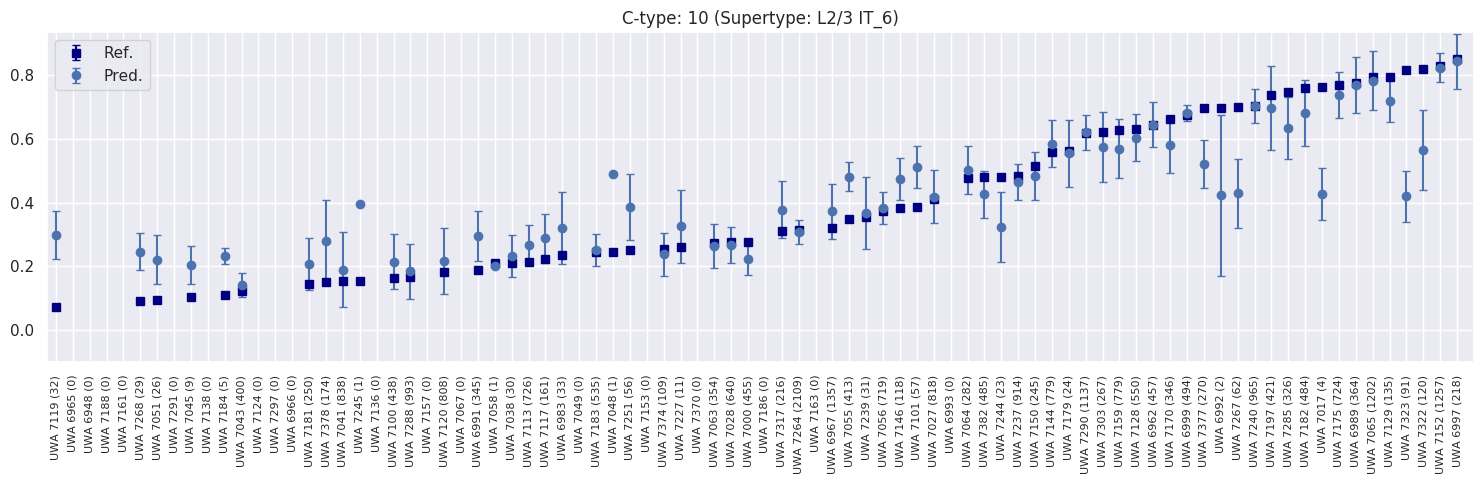

Pearsons correlation: 0.880
11.0
11.0 3
using CPU ...
Total loss: 0.01426767953671515
Total loss: 0.01154221803881228
Total loss: 0.013823602814227343
Total loss: 0.013747836695984006
Total loss: 0.016299921786412597
Total loss: 0.013158476445823908
Total loss: 0.014418226666748524
Total loss: 0.014367708470672369
Total loss: 0.01360265794210136
Total loss: 0.013772737700492144


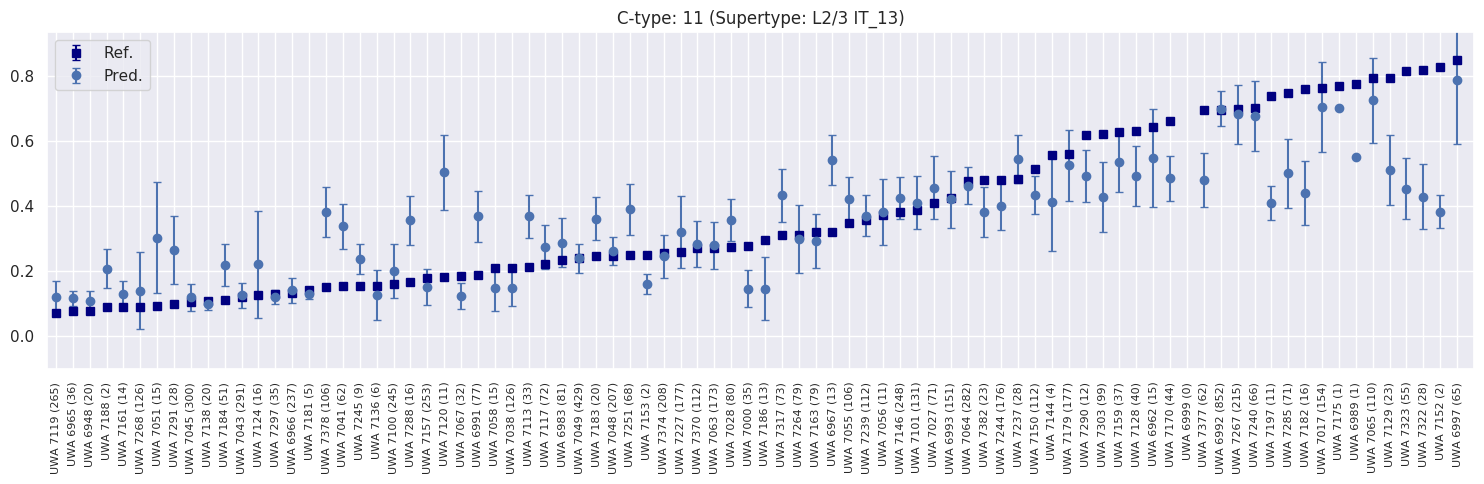

Pearsons correlation: 0.820
12.0
12.0 4
using CPU ...
Total loss: 0.04072671756148338
Total loss: 0.04313523198167483
Total loss: 0.035576166274646916
Total loss: 0.032586826011538506
Total loss: 0.03357961711784204
Total loss: 0.028909650941689808
Total loss: 0.040608140950401626
Total loss: 0.02750685593734185
Total loss: 0.03086294885724783
Total loss: 0.03148881966869036


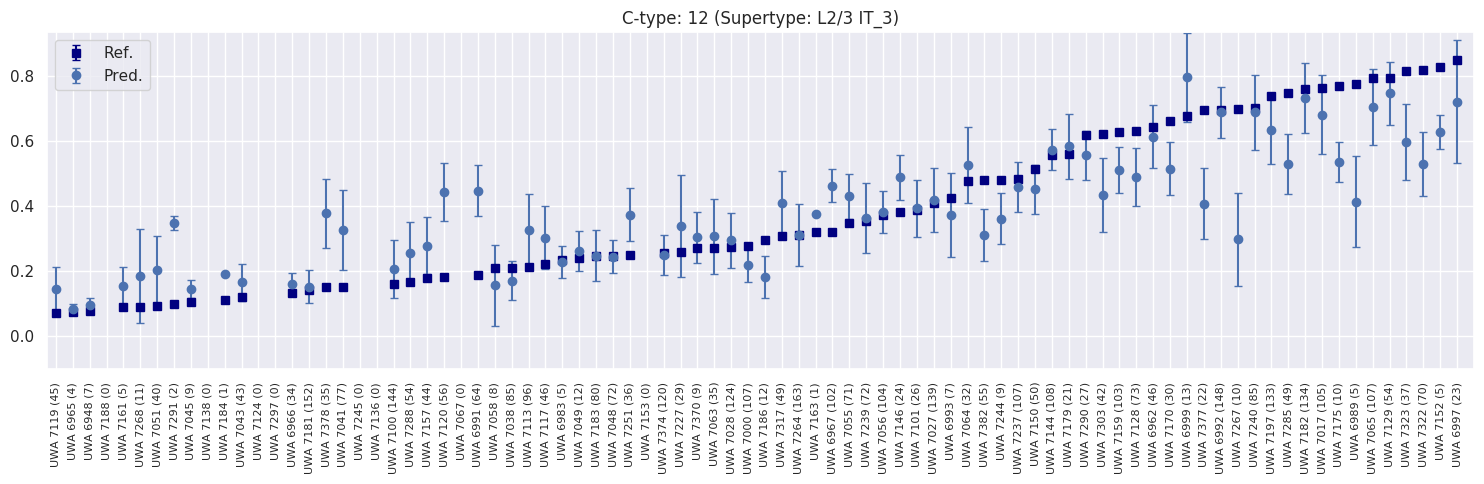

Pearsons correlation: 0.854
14.0
14.0 0
using CPU ...
Total loss: 0.012314823281485587
Total loss: 0.012028530676616356
Total loss: 0.013361957797314972
Total loss: 0.011995347019466054
Total loss: 0.012786463090580784
Total loss: 0.012021489502836226
Total loss: 0.013079553444792206
Total loss: 0.014373135947001478
Total loss: 0.01194494870206755
Total loss: 0.01142017709531097


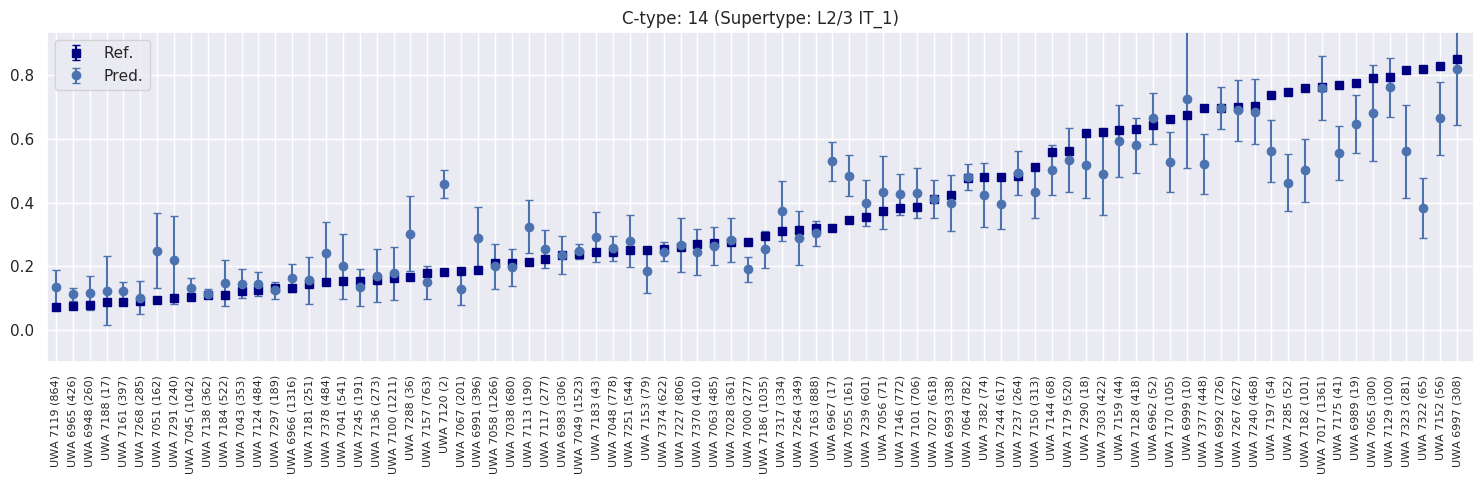

Pearsons correlation: 0.914


In [74]:
from utils.state_analysis import state_analyzer
from sklearn.model_selection import KFold
from scipy.stats import pearsonr
import pandas as pd

arm = 0
seed = 100
kfold = 10
state = outcome['state_mu'][arm, :, :]
pred_type = outcome['pred_label'][-1][arm, :]
s_idx = outcome['sample_id'][-1].astype(int)
cat = np.unique(pred_type)
supertypes = data['supertype_scANVI'][s_idx]
num_types = [sum(supertypes == tt) for tt in np.unique(supertypes)]
metadata = 'ps_time'
    
uniq_score = np.unique(data[metadata])
uniq_donor = np.array([data['external_donor_name'][data[metadata]==u_m][0] for u_m in uniq_score])

df_ps_time = pd.DataFrame()
df_ps_time['c'] = np.zeros(len(cat))
df_ps_time['superype'] = np.zeros(len(cat))
df_ps_time['pearson_corr'] = np.zeros(len(cat))
df_ps_time['mse'] = np.zeros(len(cat))
        
for i_c, c in enumerate(cat):
    print(c)
    eval_dict = []
    error = []
    meta_true = []
    meta_pred = []
    donors_list = []
    idx = np.where(pred_type == c)[0]
    ref_t = data['supertype_scANVI'][s_idx[idx]]
    uniq_ref_t = np.unique(ref_t)
    meta_y = data[metadata][s_idx[idx]]
    tmp_donors = data['external_donor_name'][s_idx[idx]]
    n_types = [sum(ref_t==tt) for tt in uniq_ref_t]
    norm_count = [i / j for i, j in zip(n_types, num_types)]
    idxx = np.where(ref_t == uniq_ref_t[np.argmax(norm_count)])[0]
    print(c, np.argmax(norm_count))
    x = state[idx[idxx], :]
    y = 1. * meta_y[idxx]
    donors = tmp_donors[idxx]
    classifier = state_analyzer(saving_folder=saving_folder, device=device)
    kf = KFold(n_splits=kfold, random_state=seed, shuffle=True)
    m = 0
    for train_index, test_index in kf.split(x):
        m += 1
        classifier.init_model(input_dim=state_dim, output_dim=1, lr=0., std=0.1, c=int(c), binary=False, 
                              meta_label=metadata)
        try:
            trained_model = glob.glob(saving_folder + '/model/deepClassifier_' + metadata + 
                                      '_fold_' + str(m) + '_cat_' + str(int(c)) + '*')[0]
            classifier.load_model(trained_model)
            donors_list.append(donors[test_index])
            eval_dict.append(classifier.eval_prediction(x[test_index, :], y[test_index], donors[test_index], 200))
            meta_true.append(eval_dict[-1]['metadata'])
            meta_pred.append(eval_dict[-1]['prediction'])
            error.append(np.mean(np.abs(eval_dict[-1]['metadata'] - eval_dict[-1]['prediction'])))
        except:
            print('quit')
            break

    if m > 1:
        meta_true = np.concatenate(meta_true)
        meta_pred = np.concatenate(meta_pred)
        donors_list = np.concatenate(donors_list)

        meta_true_mean, meta_true_std = [], []
        meta_pred_mean, meta_pred_std = [], []
        xtick = []

        for i_d, dd in enumerate(uniq_donor):
            d_idx = np.where(donors_list==dd)[0]
            xtick.append(f'{dd} ({len(d_idx)})')
            if len(d_idx) > 0:
                meta_true_mean.append(np.median(meta_true[d_idx]))
                meta_true_std.append(np.std(meta_true[d_idx]))
                meta_pred_mean.append(np.median(meta_pred[d_idx]))
                meta_pred_std.append(np.std(meta_pred[d_idx]))
            else:
                meta_true_mean.append(-10)
                meta_true_std.append(0)
                meta_pred_mean.append(-10)
                meta_pred_std.append(0)

        meta_true_mean = np.array(meta_true_mean)
        meta_true_std = np.array(meta_true_std)
        meta_pred_mean = np.array(meta_pred_mean)
        meta_pred_std = np.array(meta_pred_std)

        x = np.arange(len(uniq_donor))
        plt.figure(figsize=[15, 5],dpi=100)
        plt.errorbar(x, meta_true_mean,  yerr = meta_true_std, linestyle='None',  marker='s', mfc='Navy',
        mec='Navy',  capsize=3,  ecolor='Navy', label='Ref.')
        # plt.plot(x, y0, '--', color='black')
        plt.errorbar(x, meta_pred_mean,  yerr = meta_pred_std, linestyle='None',  fmt='ob',  capsize=3,  ecolor='b', label='Pred.')
        # plt.plot(x, y1, '-', color='blue')
        plt.xticks(x, xtick, rotation=90, fontsize=8)
        plt.xlim([-.5, np.max(x)+1])
        plt.ylim([-0.1, np.max(y)+0.1*np.max(y)])
        plt.legend()
        plt.title(f'C-type: {int(c)} (Supertype: {uniq_ref_t[np.argmax(norm_count)]})')
        plt.tight_layout()
        stype = uniq_ref_t[np.argmax(norm_count)]
        plt.savefig(saving_folder + '/ps_time_' + str(int(c)) + '_' + stype[stype.find('_')+1:] + '_arm_' + str(arm) + '.png', dpi=600)
        plt.show()
        
        y_pred = meta_pred_mean[meta_pred_mean > 0]
        y_true = meta_true_mean[meta_pred_mean > 0]
        df_ps_time['c'][i_c] = int(c)
        df_ps_time['superype'][i_c] = uniq_ref_t[np.argmax(norm_count)]
        corr, _ = pearsonr(y_true, y_pred)
        print('Pearsons correlation: %.3f' % corr)
        df_ps_time['pearson_corr'][i_c] = corr
        df_ps_time['mse'][i_c] = np.mean((y_pred - y_true)**2)

2.0
2.0 L2/3 IT_7
using CPU ...
Total loss: 0.022034946596249938
Total loss: 0.018753777316305786
Total loss: 0.017917400801606063
Total loss: 0.01953710034205061
Total loss: 0.018053865965662733
Total loss: 0.019356305898529373
Total loss: 0.01818997208869809
Total loss: 0.01895615340779639
Total loss: 0.01821108560802208
Total loss: 0.01803761255642813


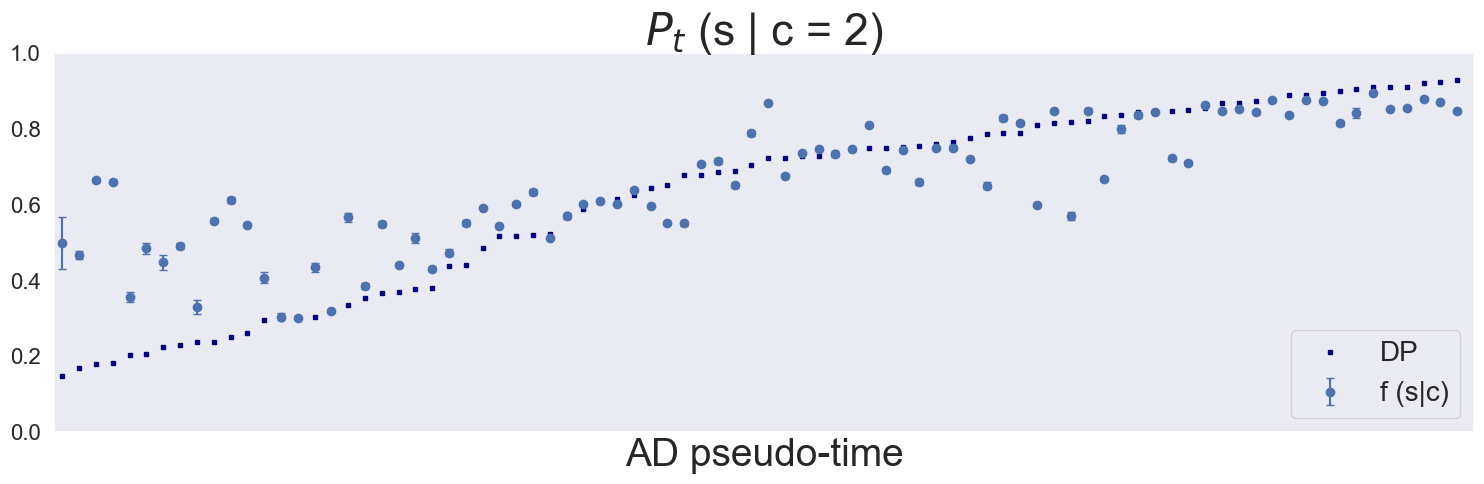

Pearsons correlation: 0.846
3.0


/Users/yeganeh.marghi/miniconda3/envs/tf14-cpu/lib/python3.7/site-packages/ipykernel_launcher.py:134: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/yeganeh.marghi/miniconda3/envs/tf14-cpu/lib/python3.7/site-packages/ipykernel_launcher.py:135: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


3.0 L2/3 IT_13
using CPU ...
Total loss: 0.021533876727335154
Total loss: 0.021185887907631696
Total loss: 0.02035671949852258
Total loss: 0.02161657342221588
Total loss: 0.025349779054522514
Total loss: 0.022052155644632875
Total loss: 0.02138581653125584
Total loss: 0.023185075190849603
Total loss: 0.019935984327457846
Total loss: 0.021085847751237452


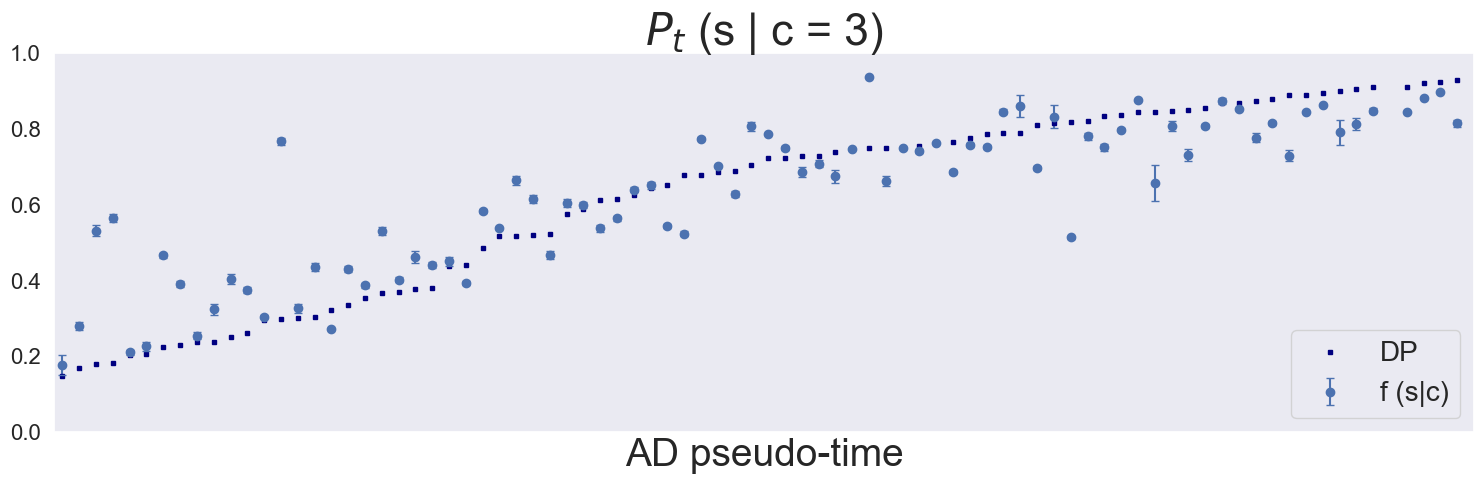

/Users/yeganeh.marghi/miniconda3/envs/tf14-cpu/lib/python3.7/site-packages/ipykernel_launcher.py:130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/yeganeh.marghi/miniconda3/envs/tf14-cpu/lib/python3.7/site-packages/ipykernel_launcher.py:134: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/yeganeh.marghi/miniconda3/envs/tf14-cpu/lib/python3.7/site-packages/ipykernel_launcher.py:135: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Pearsons correlation: 0.995
6.0
6.0 L2/3 IT_1
using CPU ...
Total loss: 0.0208594465096082
Total loss: 0.022621912105629843
Total loss: 0.023186362259799524
Total loss: 0.021542448716770326
Total loss: 0.02272172225639224
Total loss: 0.024561298168486075
Total loss: 0.024095833567636355
Total loss: 0.02258067542598361
Total loss: 0.025032258370802515
Total loss: 0.022420739621988366


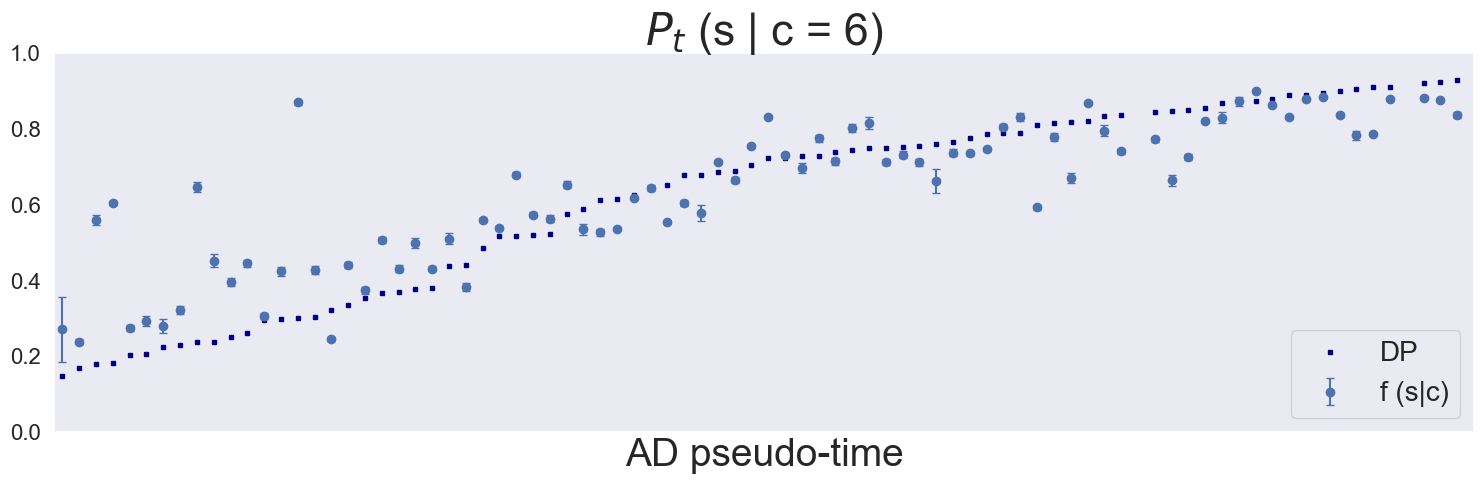

/Users/yeganeh.marghi/miniconda3/envs/tf14-cpu/lib/python3.7/site-packages/ipykernel_launcher.py:130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/yeganeh.marghi/miniconda3/envs/tf14-cpu/lib/python3.7/site-packages/ipykernel_launcher.py:134: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/yeganeh.marghi/miniconda3/envs/tf14-cpu/lib/python3.7/site-packages/ipykernel_launcher.py:135: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Pearsons correlation: 0.997
7.0
7.0 L2/3 IT_10
using CPU ...
Total loss: 0.02153593663345365
Total loss: 0.02446962717701407
Total loss: 0.022520632702199853
Total loss: 0.023083260282874107
Total loss: 0.022847925668911022
Total loss: 0.02249421880525701
Total loss: 0.022761805969126084
Total loss: 0.023268421947517815
Total loss: 0.022627415245070177
Total loss: 0.024608292699079302


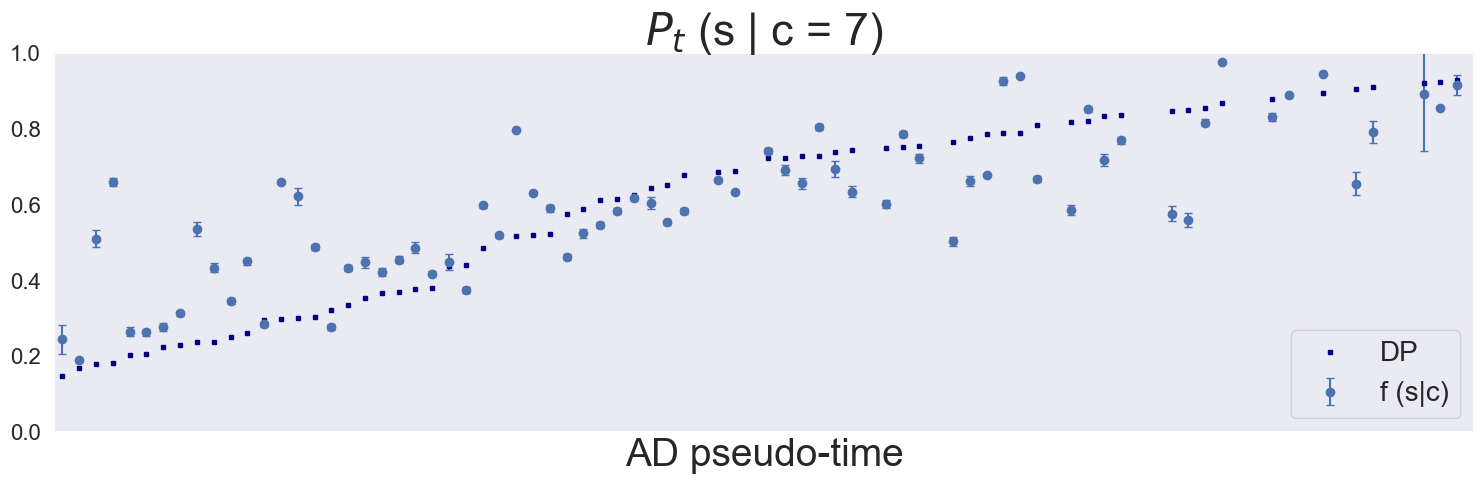

/Users/yeganeh.marghi/miniconda3/envs/tf14-cpu/lib/python3.7/site-packages/ipykernel_launcher.py:130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/yeganeh.marghi/miniconda3/envs/tf14-cpu/lib/python3.7/site-packages/ipykernel_launcher.py:134: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/yeganeh.marghi/miniconda3/envs/tf14-cpu/lib/python3.7/site-packages/ipykernel_launcher.py:135: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Pearsons correlation: 0.999
9.0
9.0 L2/3 IT_1
using CPU ...
Total loss: 0.011765249306336045
Total loss: 0.010625897253501333
Total loss: 0.011688791499990556
Total loss: 0.010467052718417512
Total loss: 0.012101108104818396
Total loss: 0.010798027531968223
Total loss: 0.012235026625502441
Total loss: 0.011428541193405787
Total loss: 0.010847435022393862
Total loss: 0.011654562265094783


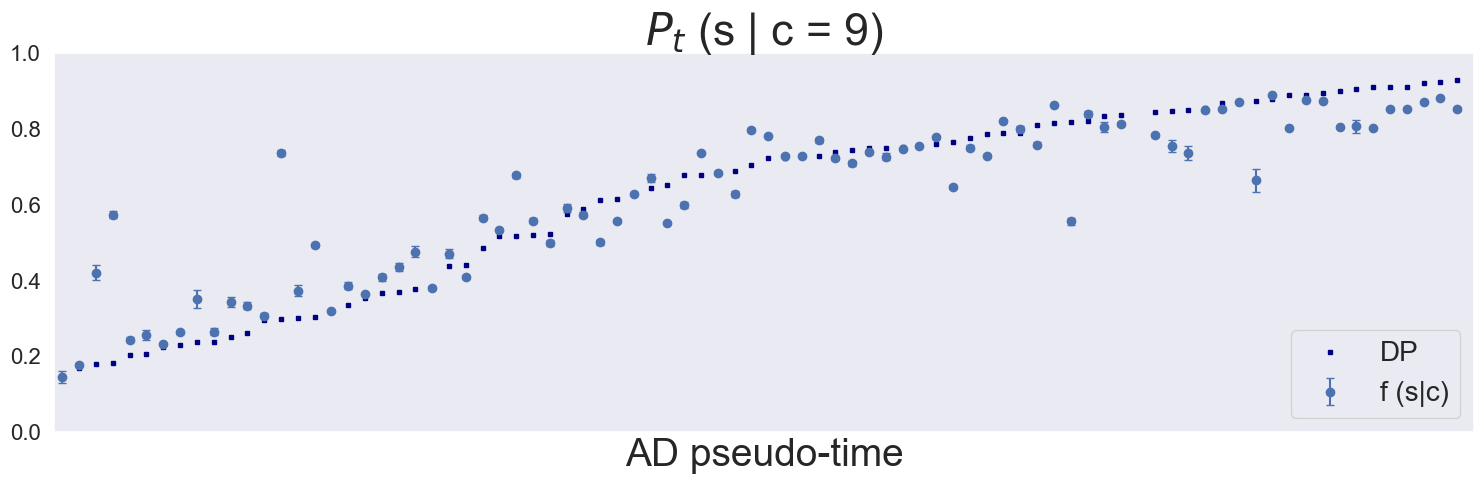

/Users/yeganeh.marghi/miniconda3/envs/tf14-cpu/lib/python3.7/site-packages/ipykernel_launcher.py:130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/yeganeh.marghi/miniconda3/envs/tf14-cpu/lib/python3.7/site-packages/ipykernel_launcher.py:134: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/yeganeh.marghi/miniconda3/envs/tf14-cpu/lib/python3.7/site-packages/ipykernel_launcher.py:135: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Pearsons correlation: 0.996
10.0
10.0 L2/3 IT_6
using CPU ...
Total loss: 0.011744399394263468
Total loss: 0.014498362661383692
Total loss: 0.013237613098074993
Total loss: 0.013822185596273769
Total loss: 0.012167595548643953
Total loss: 0.016607355448373017
Total loss: 0.015369090273798932
Total loss: 0.012961277172767691
Total loss: 0.012077993109068345
Total loss: 0.012770375769053186


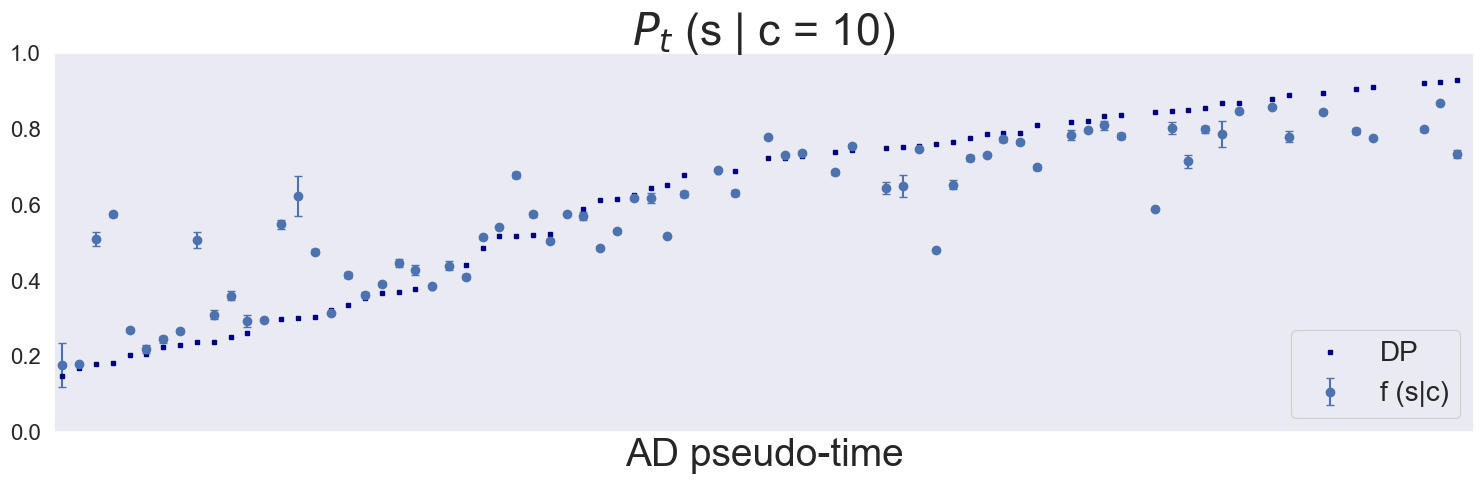

/Users/yeganeh.marghi/miniconda3/envs/tf14-cpu/lib/python3.7/site-packages/ipykernel_launcher.py:130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/yeganeh.marghi/miniconda3/envs/tf14-cpu/lib/python3.7/site-packages/ipykernel_launcher.py:134: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/yeganeh.marghi/miniconda3/envs/tf14-cpu/lib/python3.7/site-packages/ipykernel_launcher.py:135: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Pearsons correlation: 1.000
11.0
11.0 L2/3 IT_13
using CPU ...
Total loss: 0.01654100266750902
Total loss: 0.017001750592109083
Total loss: 0.019973457724388157
Total loss: 0.02000171202234924
Total loss: 0.01905009034089744
Total loss: 0.017128143343143165
Total loss: 0.018543032563424537
Total loss: 0.018382062769627998
Total loss: 0.01732317527889141
Total loss: 0.01687646610662341


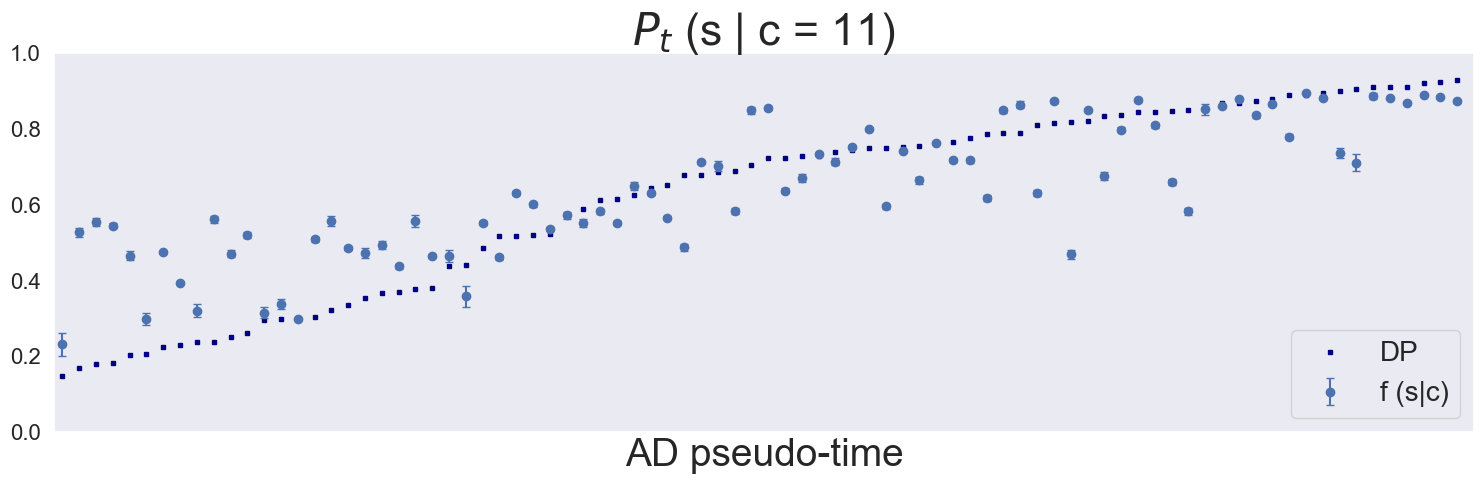

/Users/yeganeh.marghi/miniconda3/envs/tf14-cpu/lib/python3.7/site-packages/ipykernel_launcher.py:130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/yeganeh.marghi/miniconda3/envs/tf14-cpu/lib/python3.7/site-packages/ipykernel_launcher.py:134: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/yeganeh.marghi/miniconda3/envs/tf14-cpu/lib/python3.7/site-packages/ipykernel_launcher.py:135: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Pearsons correlation: 0.839
12.0
12.0 L2/3 IT_3
using CPU ...
Total loss: 0.027258335845544934
Total loss: 0.040275770938023925
Total loss: 0.0268243458122015
Total loss: 0.03512308234348893
Total loss: 0.03217469539958984
Total loss: 0.03373643534723669
Total loss: 0.030380744487047195
Total loss: 0.03329778229817748
Total loss: 0.02710453700274229
Total loss: 0.02996567660011351


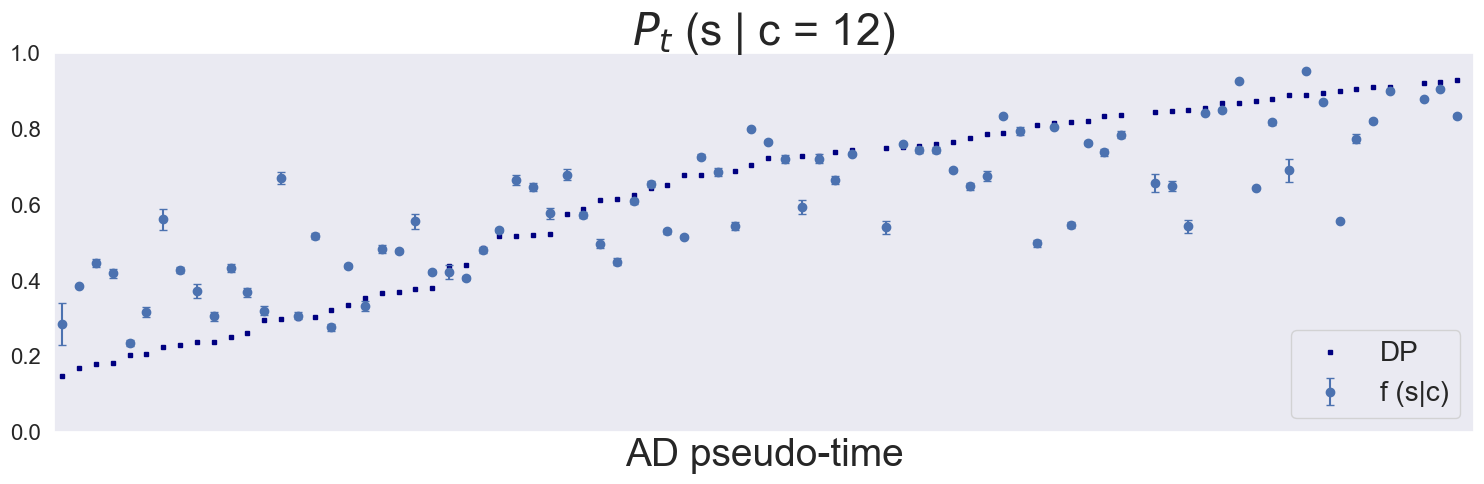

/Users/yeganeh.marghi/miniconda3/envs/tf14-cpu/lib/python3.7/site-packages/ipykernel_launcher.py:130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/yeganeh.marghi/miniconda3/envs/tf14-cpu/lib/python3.7/site-packages/ipykernel_launcher.py:134: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/yeganeh.marghi/miniconda3/envs/tf14-cpu/lib/python3.7/site-packages/ipykernel_launcher.py:135: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Pearsons correlation: 0.998
14.0
14.0 L2/3 IT_1
using CPU ...
Total loss: 0.012043801443521969
Total loss: 0.010660252313957445
Total loss: 0.013097969766628617
Total loss: 0.010950507246889174
Total loss: 0.010370927448901866
Total loss: 0.011680002738204267
Total loss: 0.011565832780130828
Total loss: 0.012791795526734658
Total loss: 0.009909267582568444
Total loss: 0.00998165429983702


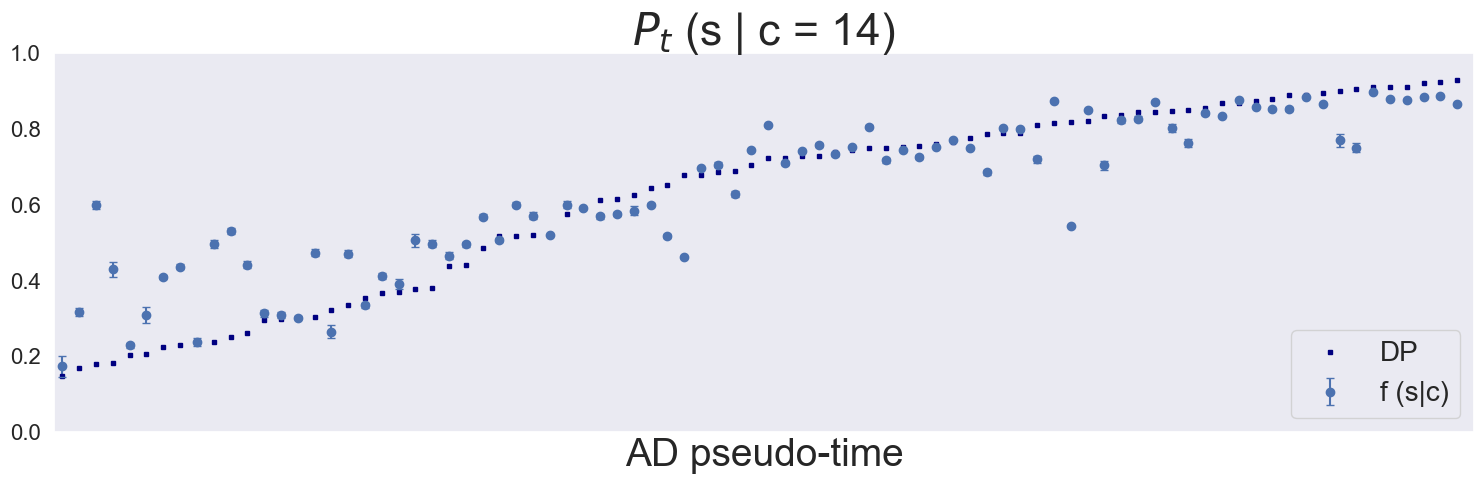

Pearsons correlation: 0.916


/Users/yeganeh.marghi/miniconda3/envs/tf14-cpu/lib/python3.7/site-packages/ipykernel_launcher.py:130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/yeganeh.marghi/miniconda3/envs/tf14-cpu/lib/python3.7/site-packages/ipykernel_launcher.py:134: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/yeganeh.marghi/miniconda3/envs/tf14-cpu/lib/python3.7/site-packages/ipykernel_launcher.py:135: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [18]:
from utils.state_analysis import state_analyzer
from sklearn.model_selection import KFold
from scipy.stats import pearsonr
import pandas as pd


fontsize = 28
arm = 0
seed = 100
kfold = 10
state = outcome['state_mu'][arm, :, :]
pred_type = outcome['pred_label'][-1][arm, :]
s_idx = outcome['sample_id'][-1].astype(int)
cat = np.unique(pred_type)
supertypes = data['supertype_scANVI'][s_idx]
num_types = [sum(supertypes == tt) for tt in np.unique(supertypes)]
metadata = 'ps_time'
    
uniq_score = np.unique(data[metadata])
uniq_donor = np.array([data['external_donor_name'][data[metadata]==u_m][0] for u_m in uniq_score])

df_ps_time = pd.DataFrame()
df_ps_time['c'] = np.zeros(len(cat))
df_ps_time['supertype'] = np.zeros(len(cat))
df_ps_time['pearson_corr'] = np.zeros(len(cat))
df_ps_time['mse'] = np.zeros(len(cat))

overall_cell_ps = []
        
for i_c, c in enumerate(cat):
    print(c)
    eval_dict = []
    error = []
    meta_true = []
    meta_pred = []
    donors_list = []
    idx = np.where(pred_type == c)[0]
    ref_t = data['supertype_scANVI'][s_idx[idx]]
    uniq_ref_t = np.unique(ref_t)
    meta_y = data[metadata][s_idx[idx]]
    tmp_donors = data['external_donor_name'][s_idx[idx]]
    n_types = [sum(ref_t == tt) for tt in uniq_ref_t]
    num_types = [sum(supertypes == tt) for tt in uniq_ref_t]
    norm_count = [i / j for i, j in zip(n_types, num_types)]
    idxx = np.where(ref_t == uniq_ref_t[np.argmax(norm_count)])[0]
    print(c, uniq_ref_t[np.argmax(norm_count)])
    x = state[idx, :]
    y = meta_y
    donors = tmp_donors
    classifier = state_analyzer(saving_folder=saving_folder, device=device)
    kf = KFold(n_splits=kfold, random_state=seed, shuffle=True)
    m = 0
    for train_index, test_index in kf.split(x):
        m += 1
        classifier.init_model(input_dim=state_dim, output_dim=1, lr=0., std=0.1, c=int(c), binary=False, 
                              meta_label=metadata)
        try:
            trained_model = glob.glob(saving_folder + '/model/deepClassifier_' + metadata + 
                                      '_fold_' + str(m) + '_cat_' + str(int(c)) + '*')[0]
            trained_model
            classifier.load_model(trained_model)
#             f = open(saving_folder + '/summary_' + metadata + '_fold_' + str(m) + '_cat_' + str(int(c))+ '.p', "rb")
#             data_dict = pickle.load(f)
#             f.close()
#             indx = data_dict['sample_indx'].astype(int)
            donors_list.append(donors[test_index])
            eval_dict.append(classifier.eval_prediction(x[test_index, :], y[test_index], donors[test_index], 200))
            meta_true.append(eval_dict[-1]['metadata'])
            meta_pred.append(eval_dict[-1]['prediction'])
            error.append(np.mean(np.abs(eval_dict[-1]['metadata'] - eval_dict[-1]['prediction'])))
        except:
            print('quit')
            break

    if m > 1:
        meta_true = np.concatenate(meta_true)
        meta_pred = np.concatenate(meta_pred)
        donors_list = np.concatenate(donors_list)

        meta_true_mean, meta_true_std = [], []
        meta_pred_mean, meta_pred_std = [], []
        xtick = []
        num_cells = []

        for i_d, dd in enumerate(uniq_donor):
            d_idx = np.where(donors_list==dd)[0]
            num_cells.append(len(d_idx))
            xtick.append(f'{dd} ({len(d_idx)})')
            if len(d_idx) > 0:
                meta_true_mean.append(np.median(meta_true[d_idx]))
                meta_true_std.append(np.std(meta_true[d_idx]))
                meta_pred_mean.append(np.median(meta_pred[d_idx]))
                meta_pred_std.append(np.std(meta_pred[d_idx]))
            else:
                meta_true_mean.append(-10)
                meta_true_std.append(0)
                meta_pred_mean.append(-10)
                meta_pred_std.append(0)

        meta_true_mean = np.array(meta_true_mean)
        meta_true_std = np.array(meta_true_std)
        meta_pred_mean = np.array(meta_pred_mean)
        meta_pred_std = np.array(meta_pred_std)
        
        meta_true_mean = 1 - meta_true_mean
        meta_pred_mean = 1 - meta_pred_mean
        x = np.arange(len(uniq_donor))
        plt.figure(figsize=[15, 5],dpi=100)
#         plt.errorbar(x, meta_true_mean[::-1],  yerr = 0. * meta_true_std[::-1], linestyle='None',  marker='s', markersize=3,
#                      mfc='Navy', mec='Navy',  capsize=1,  ecolor='Navy', label='DP')
        plt.plot(x, meta_true_mean[::-1], linestyle='None',  marker='s', markersize=3, color='Navy', label='DP')
        plt.errorbar(x, meta_pred_mean[::-1],  yerr = meta_pred_std[::-1]**2, linestyle='None',  fmt='ob',  
                     markersize=6, capsize=3,  ecolor='b', label='f (s|c)')
        plt.grid(b=None)
        plt.xticks([])
        plt.yticks(fontsize=16)
        plt.xlabel('AD pseudo-time', fontsize=fontsize)
#         plt.ylabel(r'$P_t$ (s | c = ' + str(int(c)) + ')', fontsize=18)
        plt.xlim([-.5, np.max(x)+1])
        plt.ylim([0, 1])
        plt.legend(fontsize=20, loc='lower right')#, frameon=False)
        plt.title(r'$P_t$ (s | c = ' + str(int(c)) + ')', fontsize=fontsize+4)
        plt.tight_layout()
        stype = uniq_ref_t[np.argmax(n_types)]
        plt.savefig(saving_folder + '/qs_time_' + str(int(c)) + '_arm_' + str(arm) + '.png', dpi=600)
        plt.show()
        
        y_pred = meta_pred_mean[meta_pred_mean > 0]
        y_true = meta_true_mean[meta_pred_mean > 0]
        df_ps_time['c'][i_c] = int(c)
        df_ps_time['supertype'][i_c] = uniq_ref_t[np.argmax(norm_count)]
        corr, _ = pearsonr(y_true, y_pred)
        print('Pearsons correlation: %.3f' % corr)
        df_ps_time['pearson_corr'][i_c] = corr
        df_ps_time['mse'][i_c] = np.mean((y_pred - y_true)**2)
        overall_cell_ps.append(np.array(num_cells))


In [12]:
df_ps_time

c   supertype  pearson_corr       mse
0   2.0   L2/3 IT_7      0.846168  0.020413
1   3.0  L2/3 IT_13      0.882883  0.013742
2   6.0   L2/3 IT_1      0.859175  0.016816
3   7.0  L2/3 IT_10      0.804230  0.021724
4   9.0   L2/3 IT_1      0.919890  0.009723
5  10.0   L2/3 IT_6      0.891975  0.013565
6  11.0  L2/3 IT_13      0.839296  0.019045
7  12.0   L2/3 IT_3      0.830001  0.019357
8  14.0   L2/3 IT_1      0.915558  0.010755

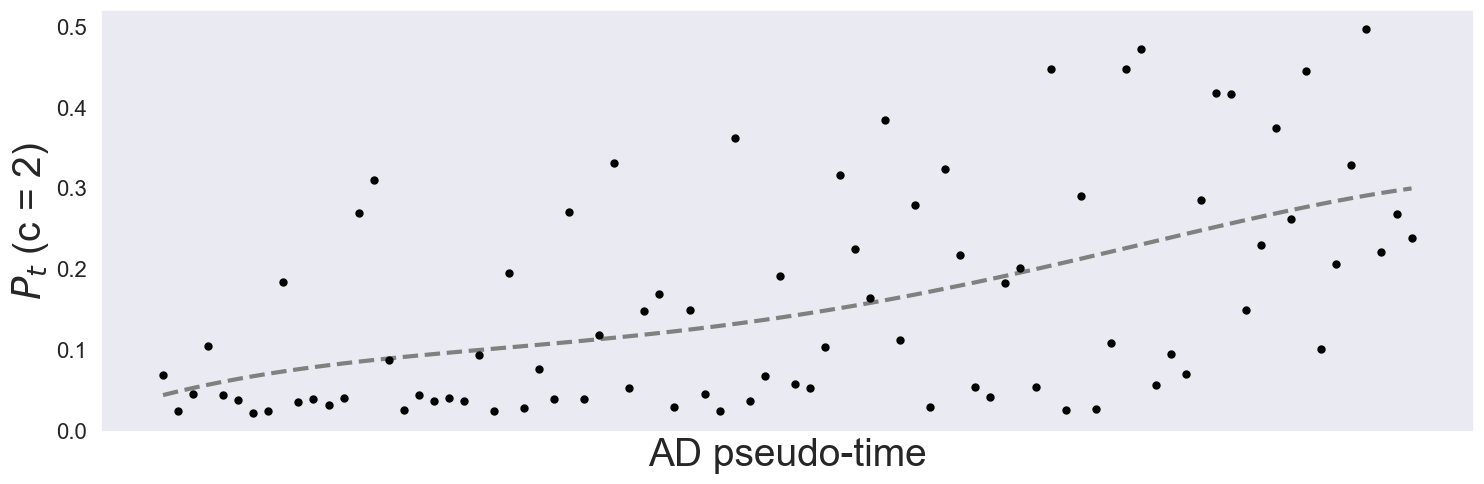

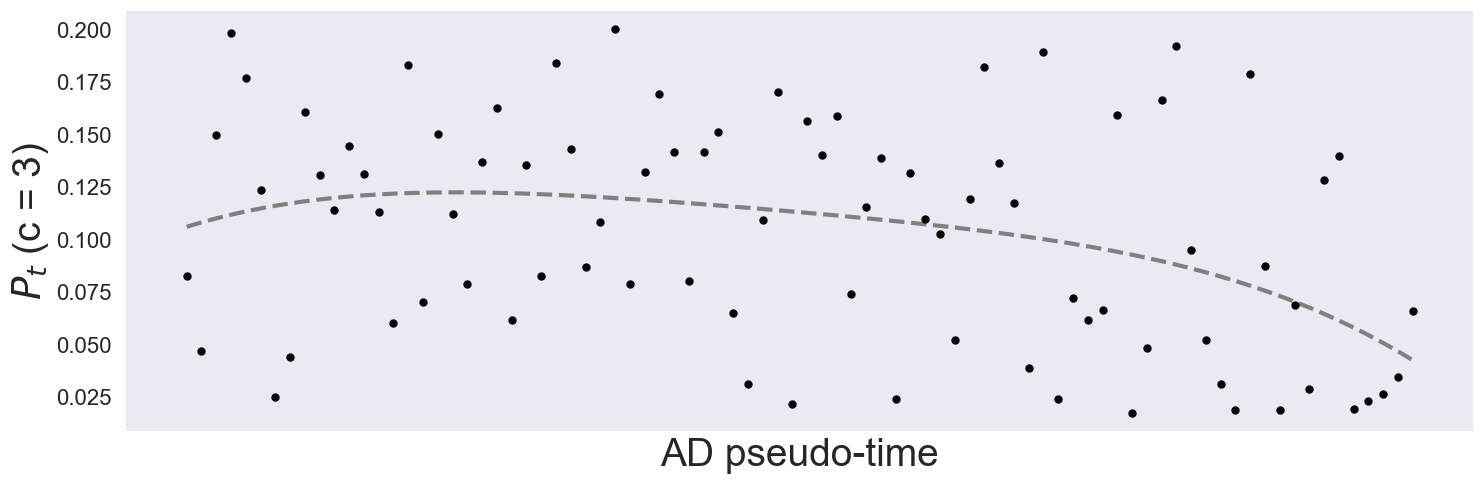

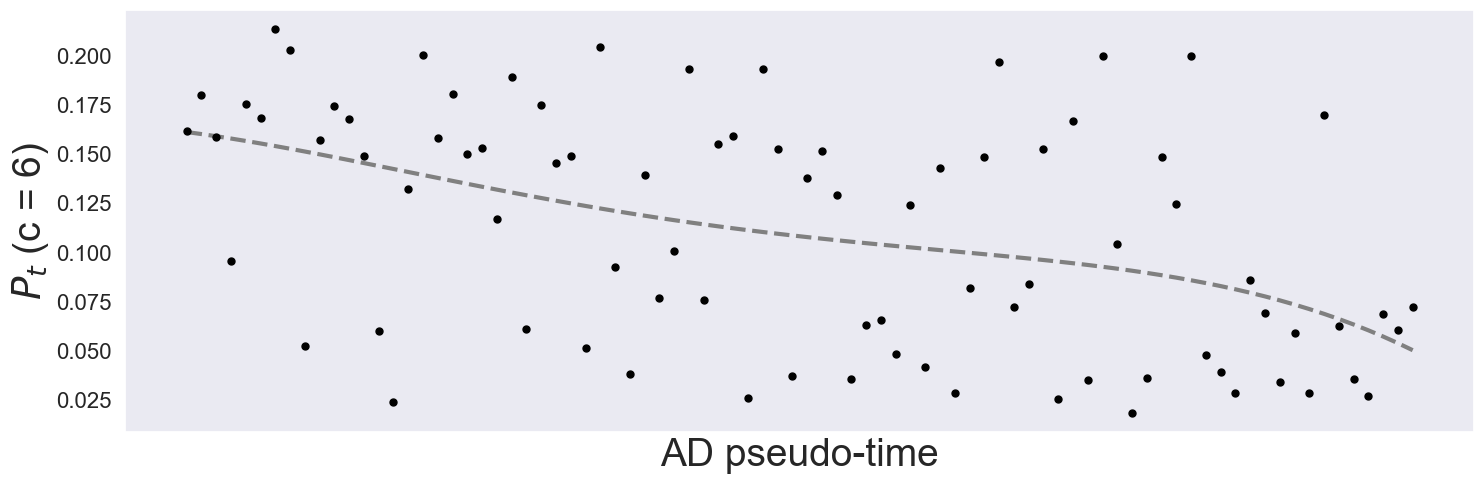

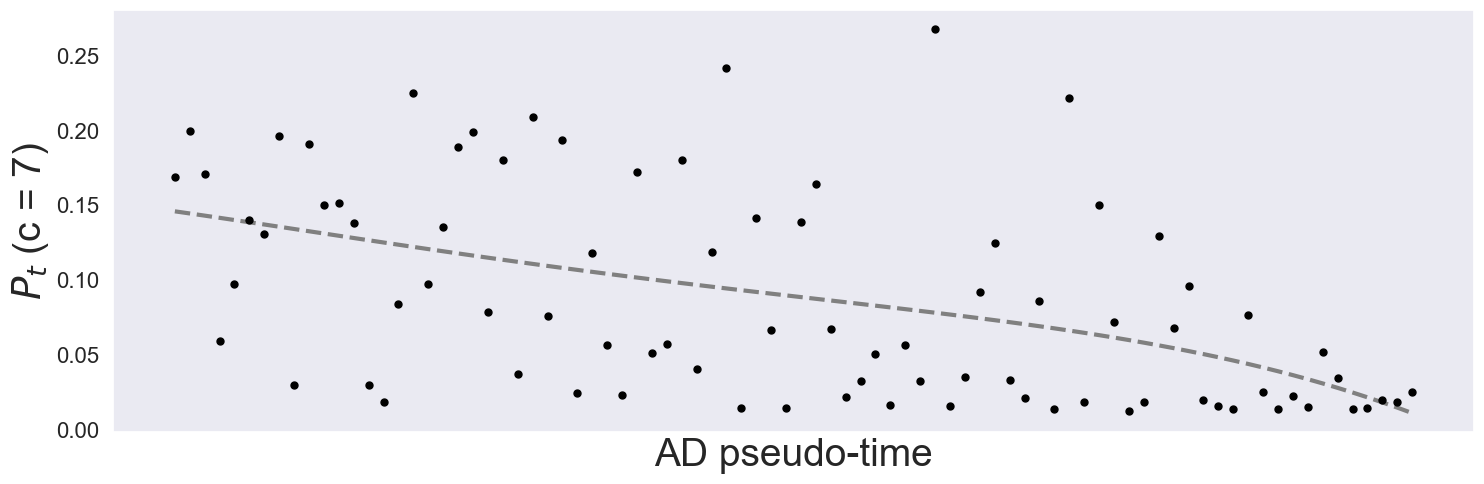

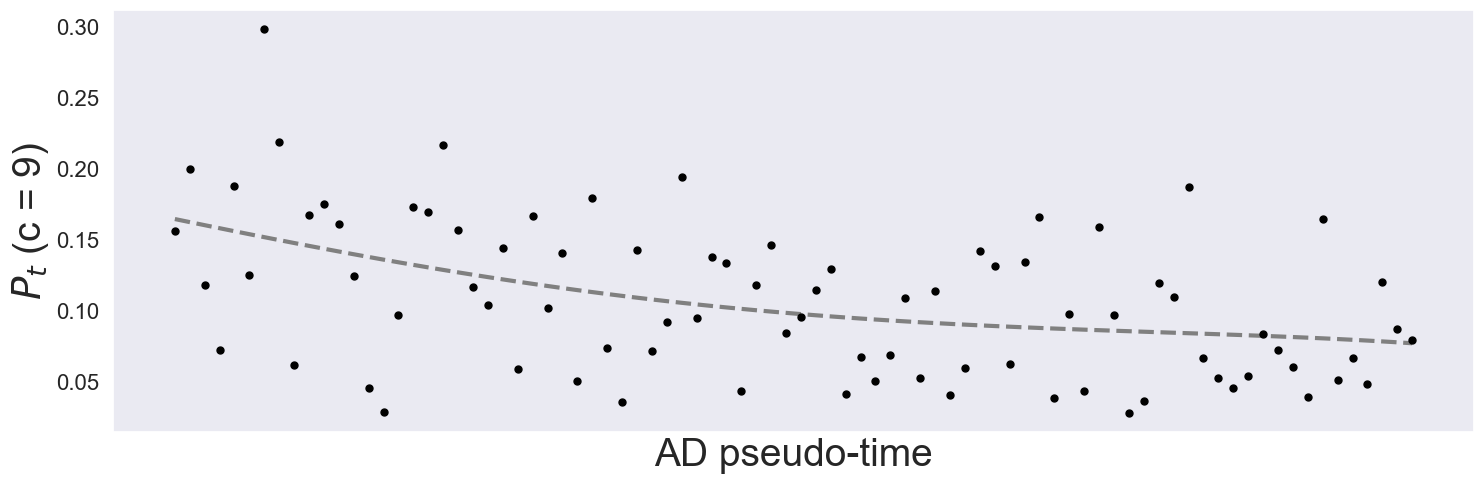

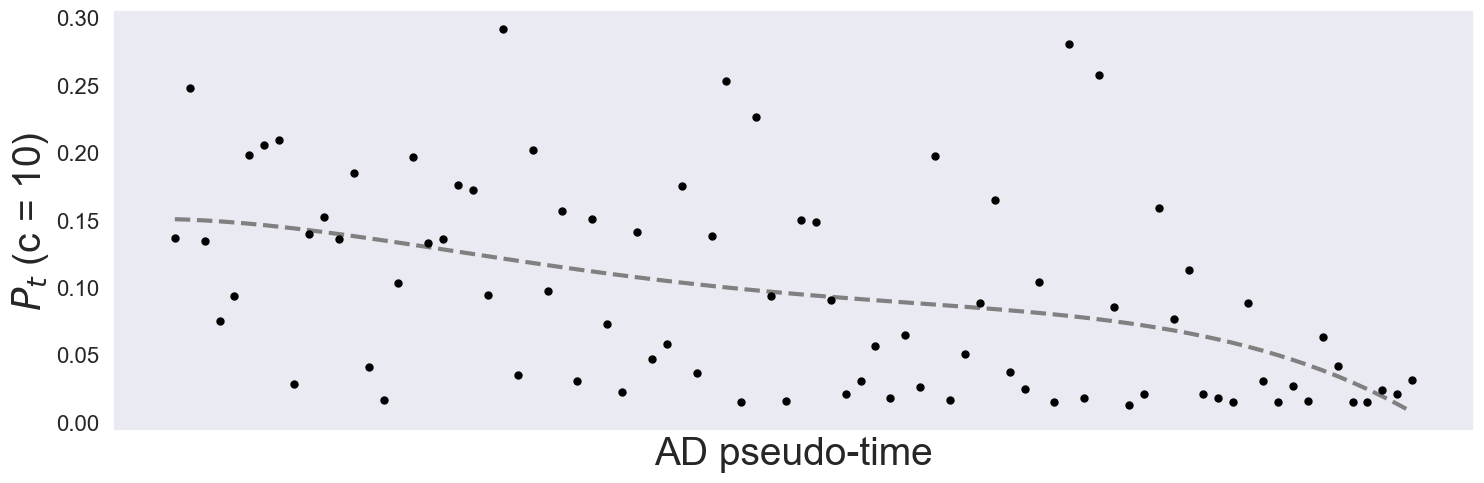

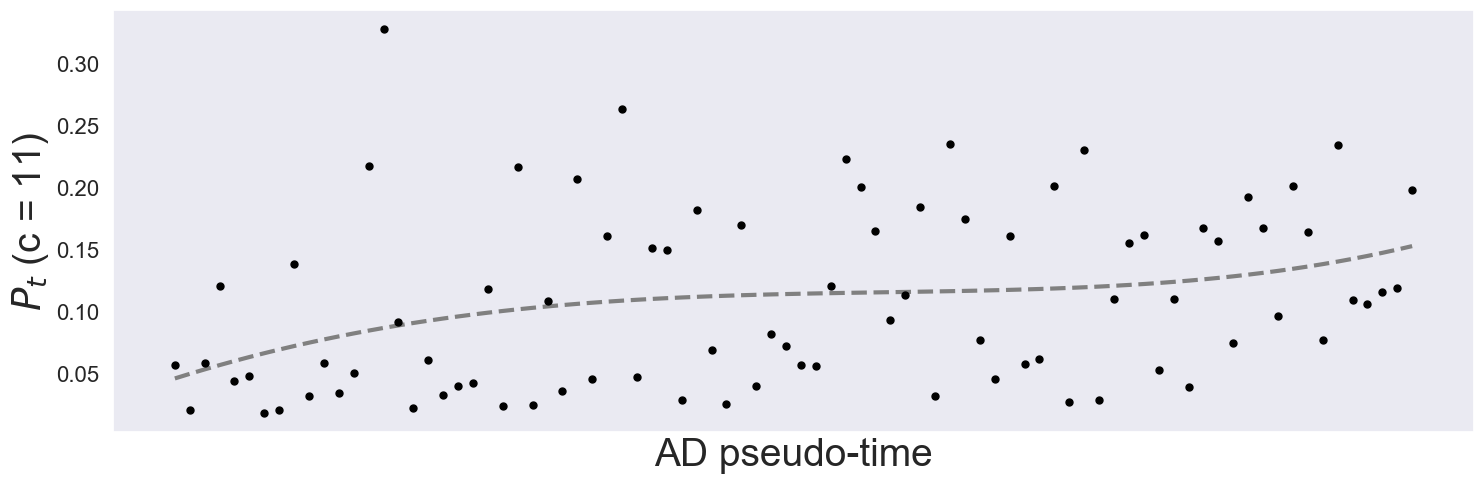

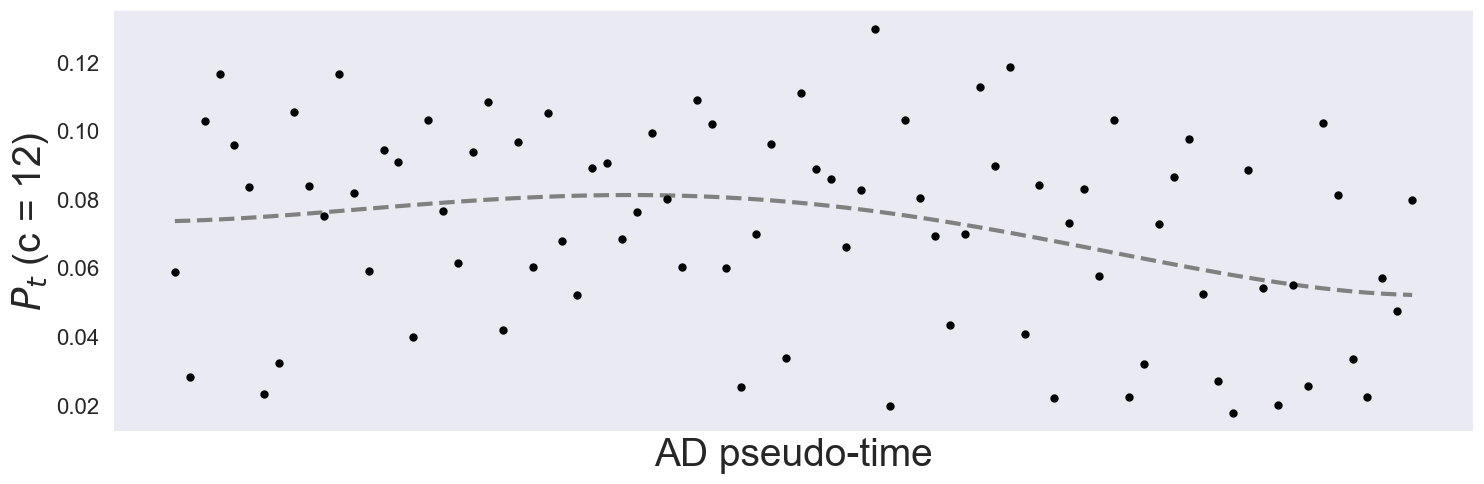

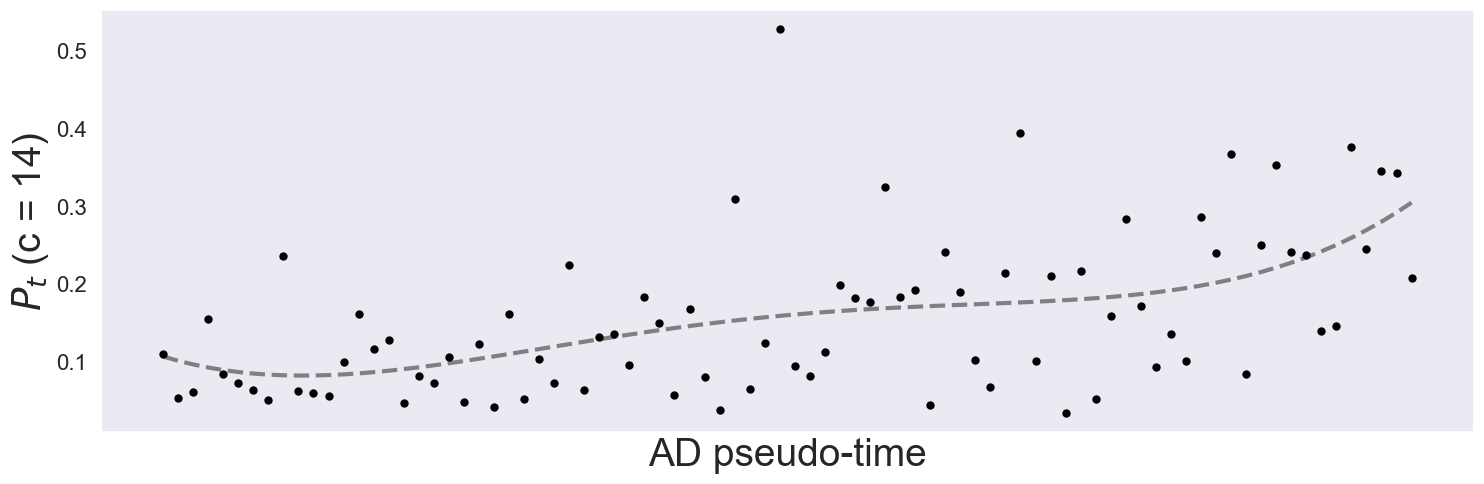

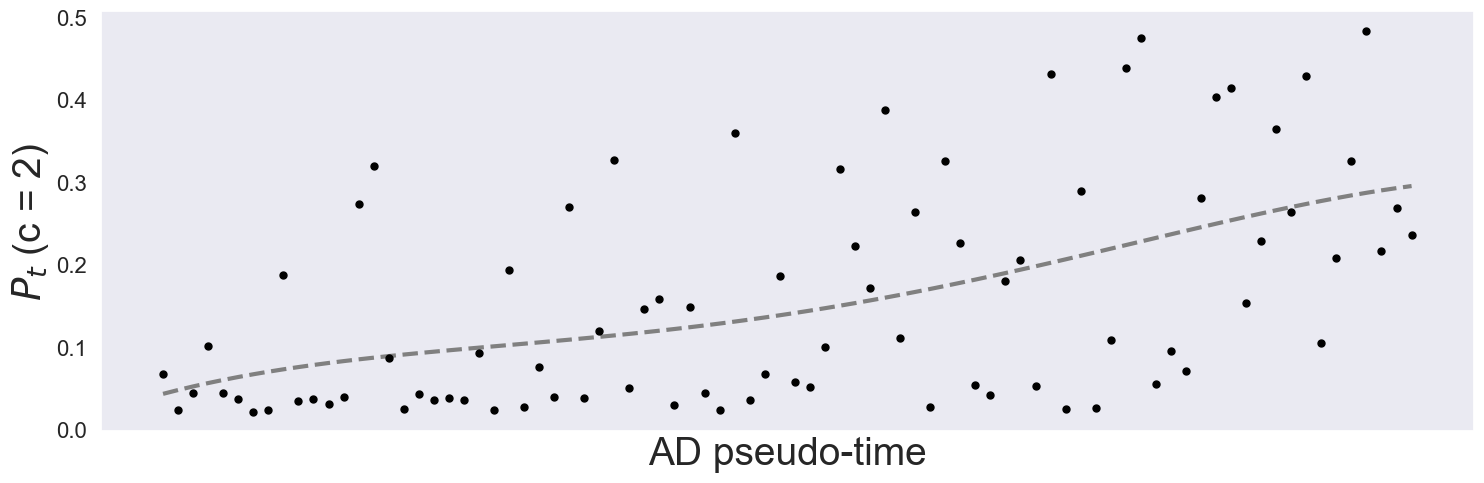

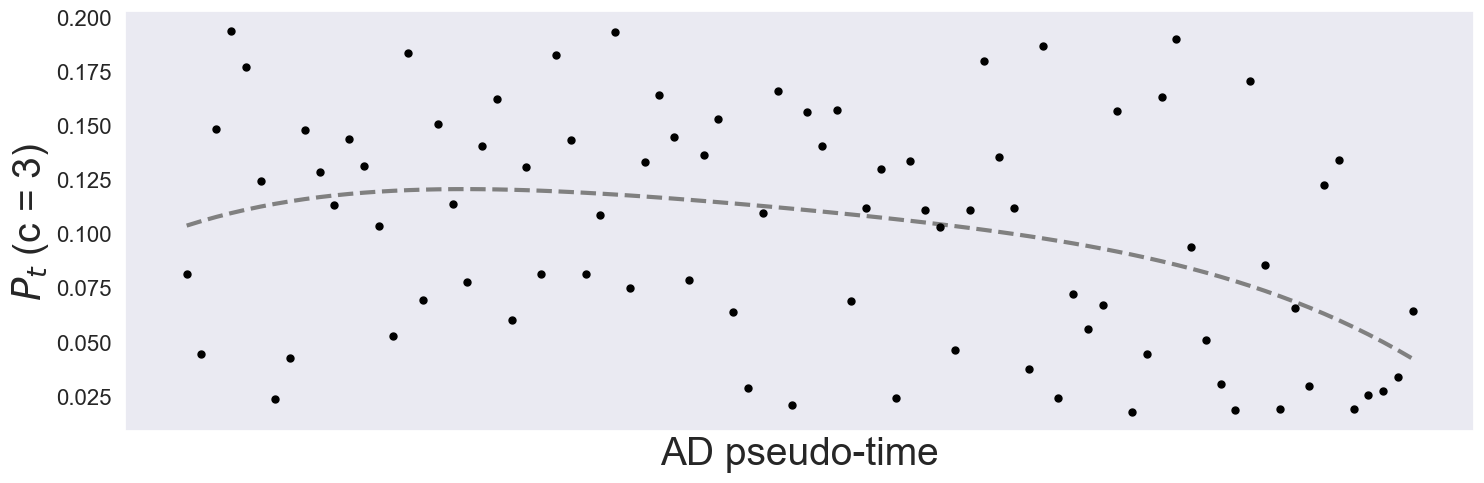

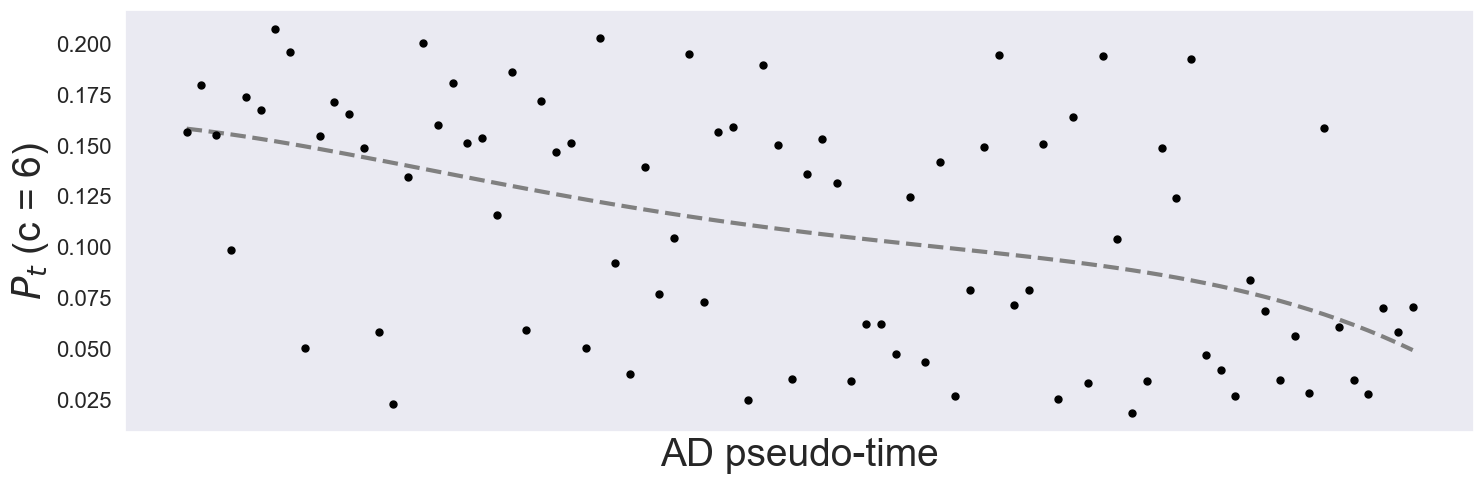

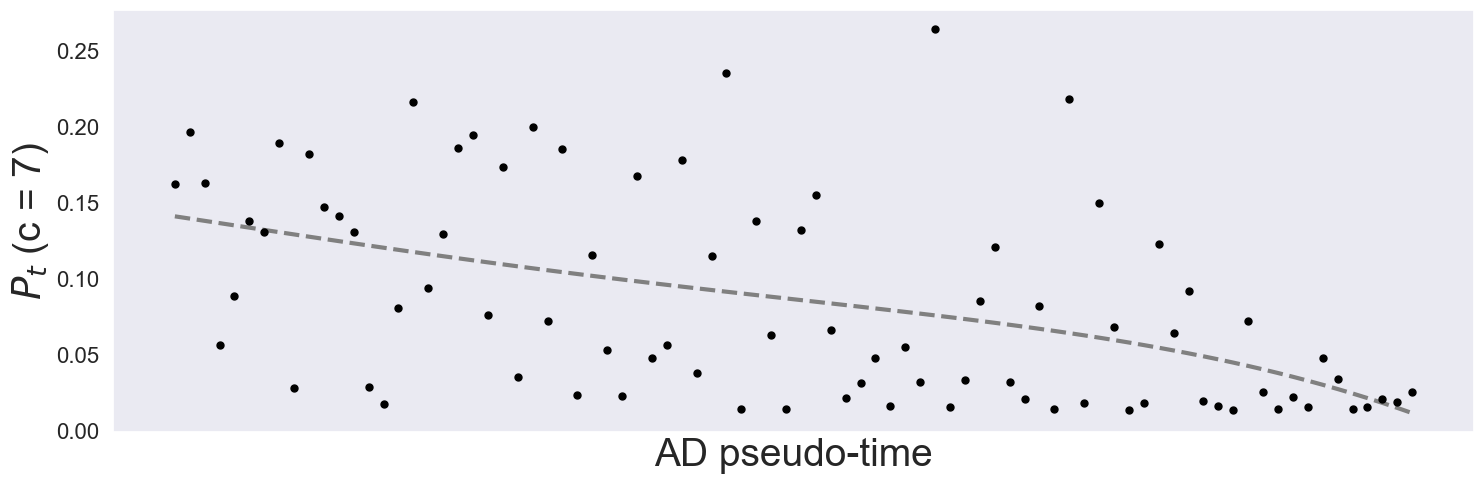

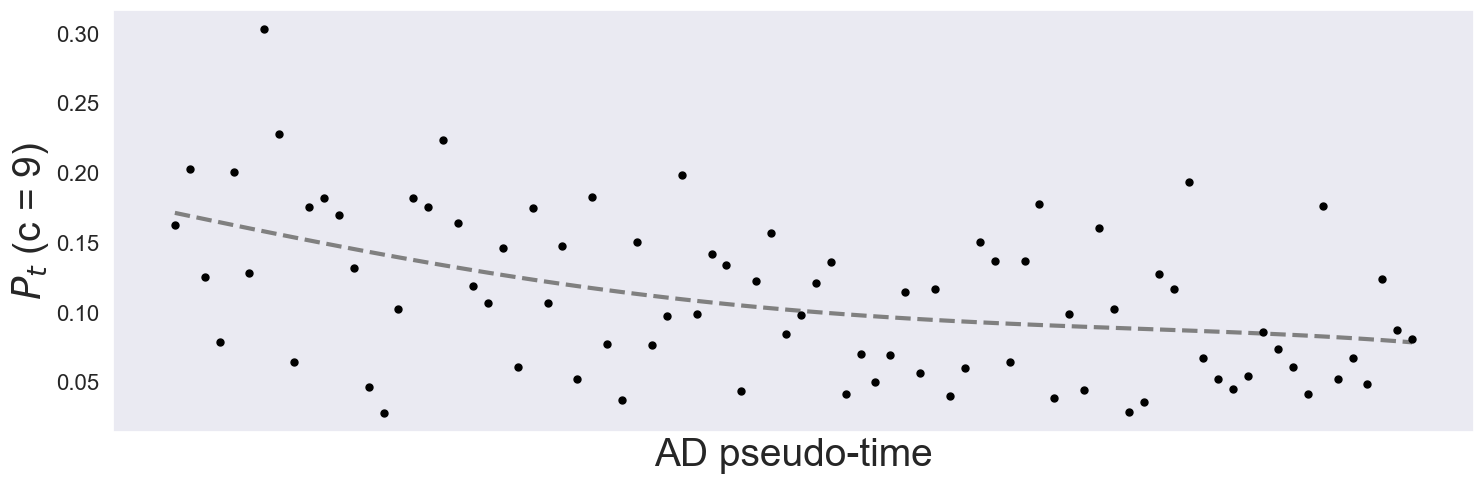

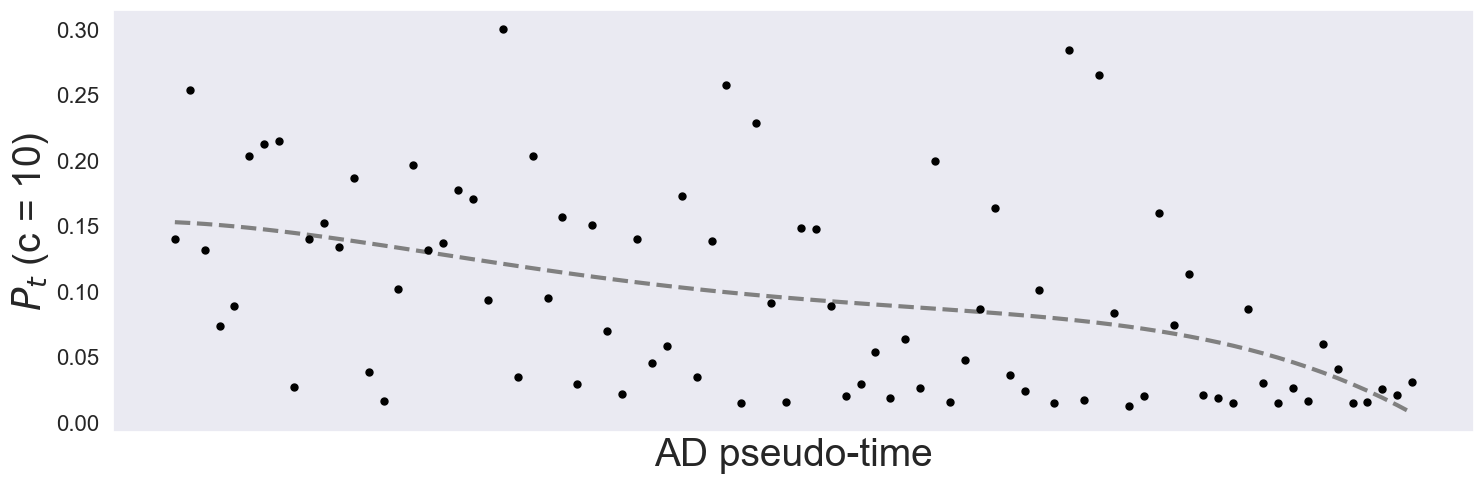

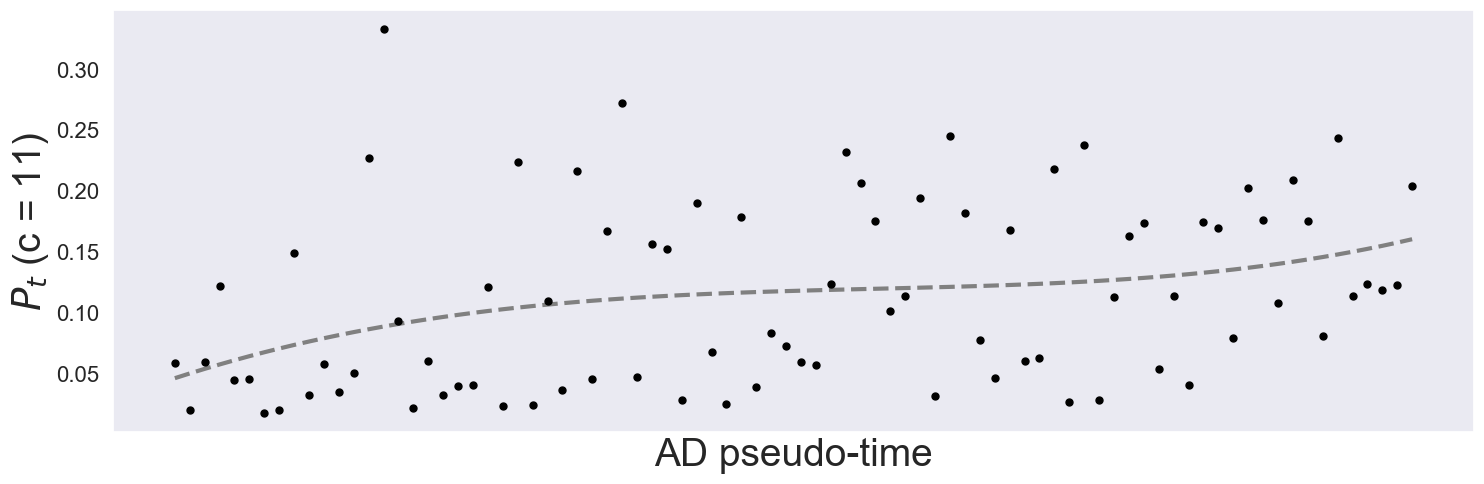

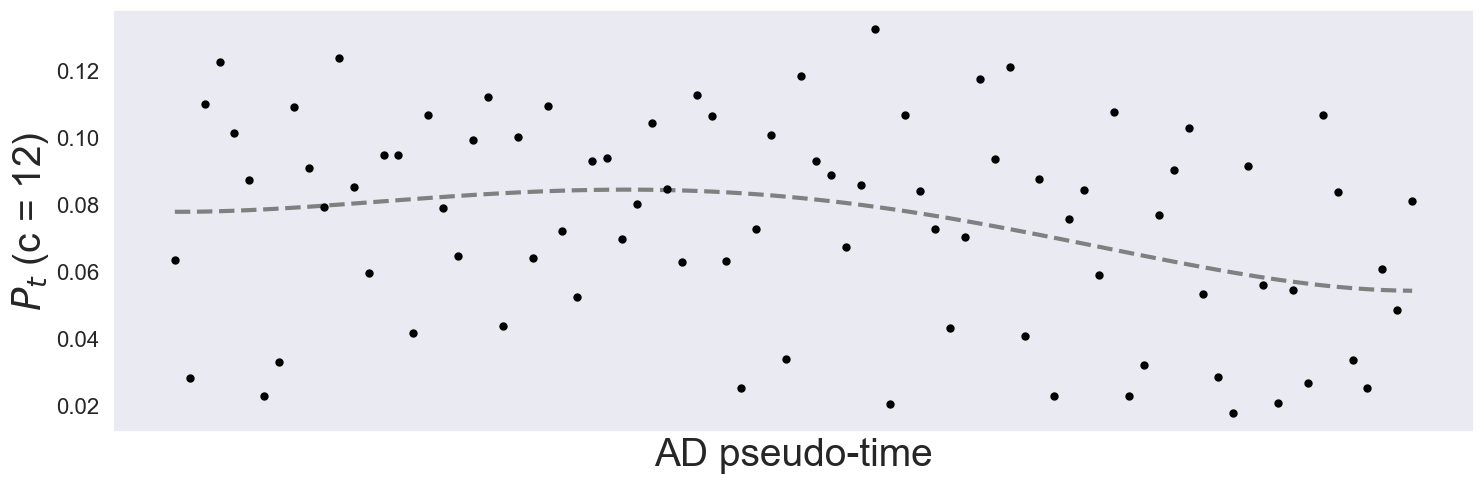

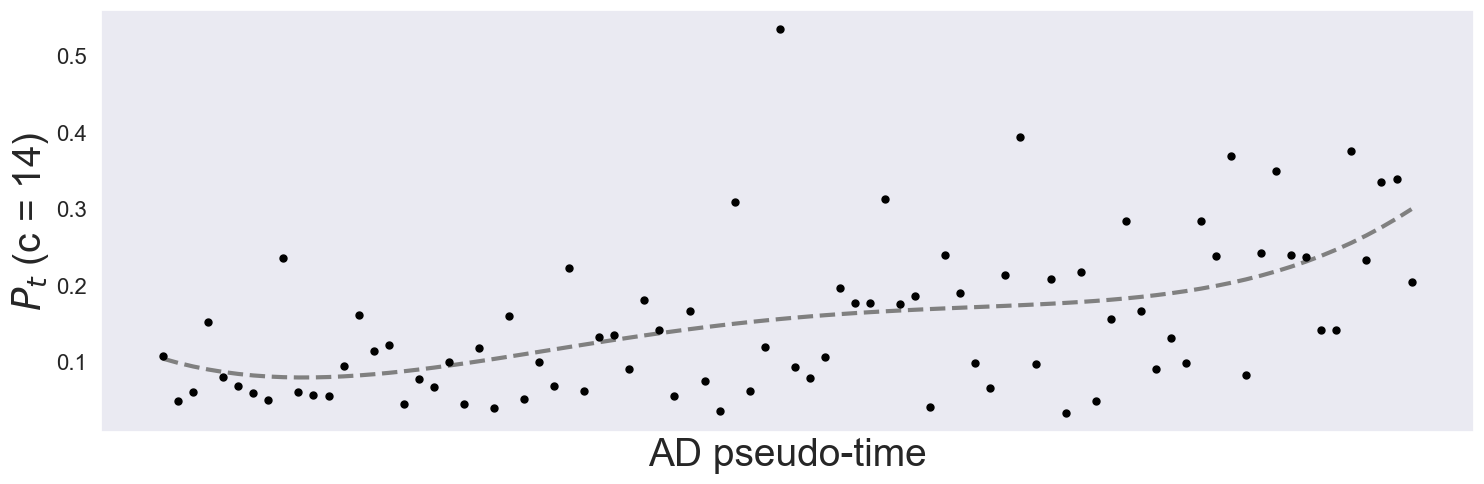

In [24]:
from sklearn.metrics import r2_score

df_c_time = pd.DataFrame()
df_c_time['c'] = np.zeros(n_categories * n_arm)
df_c_time['arm'] = np.zeros(n_categories * n_arm)
df_c_time['r2'] = np.zeros(n_categories * n_arm)
df_c_time['pearson_corr'] = np.zeros(n_categories * n_arm)
df_c_time['pearson_corr_fit'] = np.zeros(n_categories * n_arm)
count = 0
for arm in range(n_arm):
    qc = outcome['q_c'][-1][arm, :, :]
    df_c = pd.DataFrame()
    df_c['c'] = outcome['pred_label'][-1][arm].astype('<U10')
    for ic in range(qc.shape[-1]):
        df_c[f'qc_{ic}'] = qc[:, ic]
    df_c['donor'] = data['external_donor_name'][np.array(outcome['sample_id'][-1]).astype(int)]
    df_c['ps'] = data['ps_time'][np.array(outcome['sample_id'][-1]).astype(int)]
    df_c_group= df_c.groupby(by='donor').agg([np.mean, np.sum, np.std]).reset_index()
    for ic in range(qc.shape[-1]):
        x = np.arange(len(df_c_group))
        idx = np.argsort(df_c_group.ps['mean'].values)
        idx = idx[::-1]
#         plt.errorbar(x, df_c_group.ps['mean'].iloc[idx],  yerr = df_c_group.ps['std'].iloc[idx], 
#                      linestyle='None',  marker='s', mfc='Navy', mec='Navy',  capsize=3,  ecolor='Navy', label='Ref.')
        if np.mean(df_c_group[f'qc_{ic}']['mean'].iloc[idx]) > 0:
            plt.figure(figsize=[15, 5],dpi=100)
            plt.errorbar(x, df_c_group[f'qc_{ic}']['mean'].iloc[idx],  yerr = 0.*df_c_group[f'qc_{ic}']['mean'].iloc[idx]**2, 
                         linestyle='None', marker='.', markersize=10, mfc='black', mec='black',  capsize=1, label='Pred.')
            poly10 = np.polyfit(x, df_c_group[f'qc_{ic}']['mean'].iloc[idx], 4)
            fun = np.poly1d(poly10)
            plt.plot(x, fun(x), '--', color='gray', linewidth=3)
            plt.xticks([])
            plt.yticks(fontsize=16)
            plt.ylabel(r'$P_t$ (c = ' + str(int(ic+1)) + ')', fontsize=fontsize)
            plt.xlabel('AD pseudo-time', fontsize=fontsize)
            plt.grid(b=None)
    #         plt.ylim([0.0, np.max(y)+0.1*np.max(y)])
#             plt.legend()
#             plt.title(f'C-type: {int(ic+1)}')
            plt.tight_layout()
            plt.savefig(saving_folder + '/qc_time_' + str(int(ic+1)) +'_arm_' + str(arm) + '.png', dpi=600)
            corr, _ = pearsonr(df_c_group.ps['mean'].iloc[idx], df_c_group[f'qc_{ic}']['mean'].iloc[idx])
            corr_fit, _ = pearsonr(df_c_group.ps['mean'].iloc[idx], fun(x))
            df_c_time['c'][count] = int(ic+1)
            df_c_time['pearson_corr'][count] = corr
            df_c_time['pearson_corr_fit'][count] = corr_fit
            df_c_time['arm'][count] = arm
            df_c_time['r2'][count] = r2_score(df_c_group[f'qc_{ic}']['mean'].iloc[idx], fun(x))
            count += 1
df_c_time = df_c_time.loc[:count-1]

In [20]:
df_c_time

c  arm        r2  pearson_corr  pearson_corr_fit
0    2.0  0.0  0.289569     -0.500422         -0.927780
1    3.0  0.0  0.142713      0.271237          0.712493
2    6.0  0.0  0.216925      0.458019          0.973759
3    7.0  0.0  0.251823      0.482076          0.952713
4    9.0  0.0  0.210464      0.455716          0.991399
5   10.0  0.0  0.210720      0.441353          0.948212
6   11.0  0.0  0.096155     -0.308633         -0.994730
7   12.0  0.0  0.102986      0.214060          0.659944
8   14.0  0.0  0.273047     -0.494976         -0.927072
9    2.0  1.0  0.288229     -0.499389         -0.928597
10   3.0  1.0  0.144240      0.272711          0.712492
11   6.0  1.0  0.223055      0.462618          0.969918
12   7.0  1.0  0.246223      0.476373          0.952196
13   9.0  1.0  0.214517      0.460102          0.991856
14  10.0  1.0  0.206678      0.438849          0.952150
15  11.0  1.0  0.104808     -0.322197         -0.994471
16  12.0  1.0  0.104264      0.223198          0.685975
17  14.0  1.0  0.270320     -0.492935         -0.927788

1.0 4
using CPU ...
Total loss: 0.029379638843238354
Total loss: 0.028374151326715946
Total loss: 0.09271753579378128
Total loss: 0.028578453697264194
Total loss: 0.030998078174889088
Total loss: 0.06297966092824936
Total loss: 0.07334204949438572
Total loss: 0.05592259019613266
Total loss: 0.037452892400324345
Total loss: 0.08156816475093365


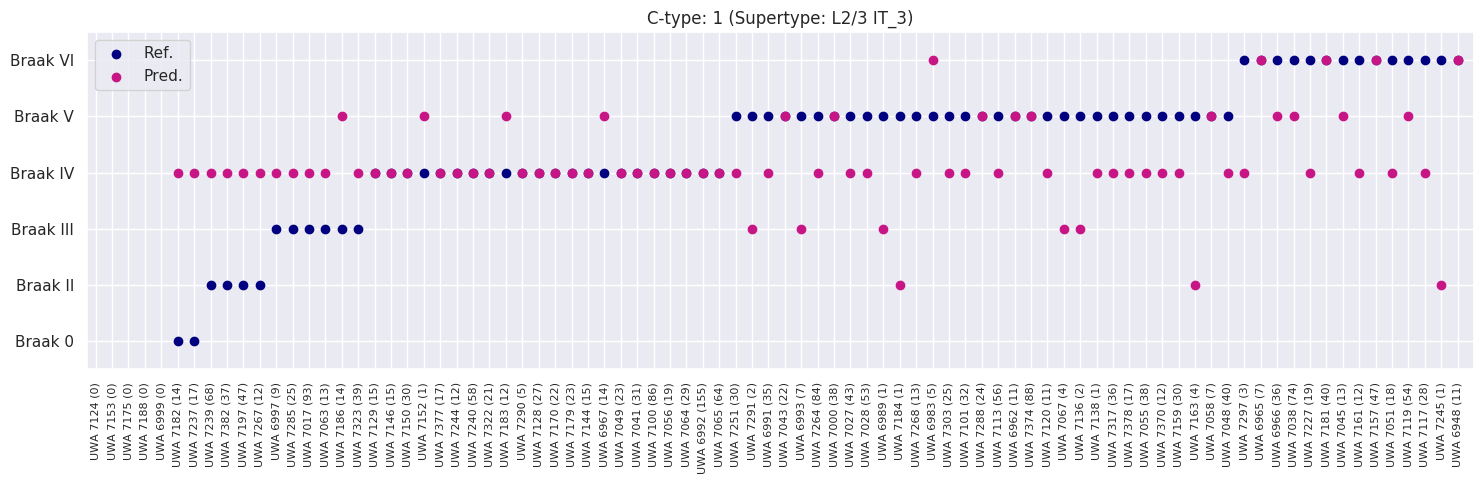

Pearsons correlation: 0.160


/home/yeganeh/miniconda3/envs/tf14-gpu/lib/python3.7/site-packages/ipykernel_launcher.py:167: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/yeganeh/miniconda3/envs/tf14-gpu/lib/python3.7/site-packages/ipykernel_launcher.py:168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


2.0 0
using CPU ...
Total loss: 0.010950929803871795
Total loss: 0.011536027647947011
Total loss: 0.011516725007248553
Total loss: 0.010223634663577142
Total loss: 0.009816050799073358
Total loss: 0.010442568307840511
Total loss: 0.009767792567512706
Total loss: 0.010989495798161155
Total loss: 0.010275416112946053
Total loss: 0.010117471818567106


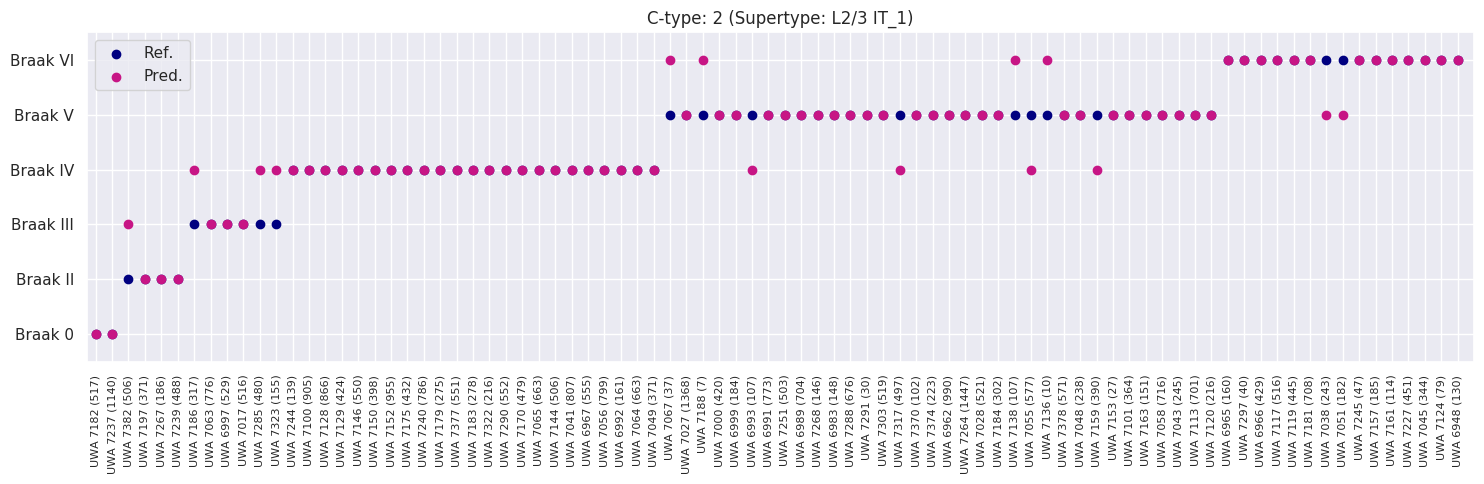

/home/yeganeh/miniconda3/envs/tf14-gpu/lib/python3.7/site-packages/ipykernel_launcher.py:163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Pearsons correlation: 0.936
3.0 6
using CPU ...
Total loss: 0.00761700130533427
Total loss: 0.0071872998128778166
Total loss: 0.008462918140659375
Total loss: 0.007429793227597007
Total loss: 0.007028157423649516
Total loss: 0.007685877698739725
Total loss: 0.00779042938458068
Total loss: 0.007287917575532836
Total loss: 0.006353948265314102
Total loss: 0.007690462159059409


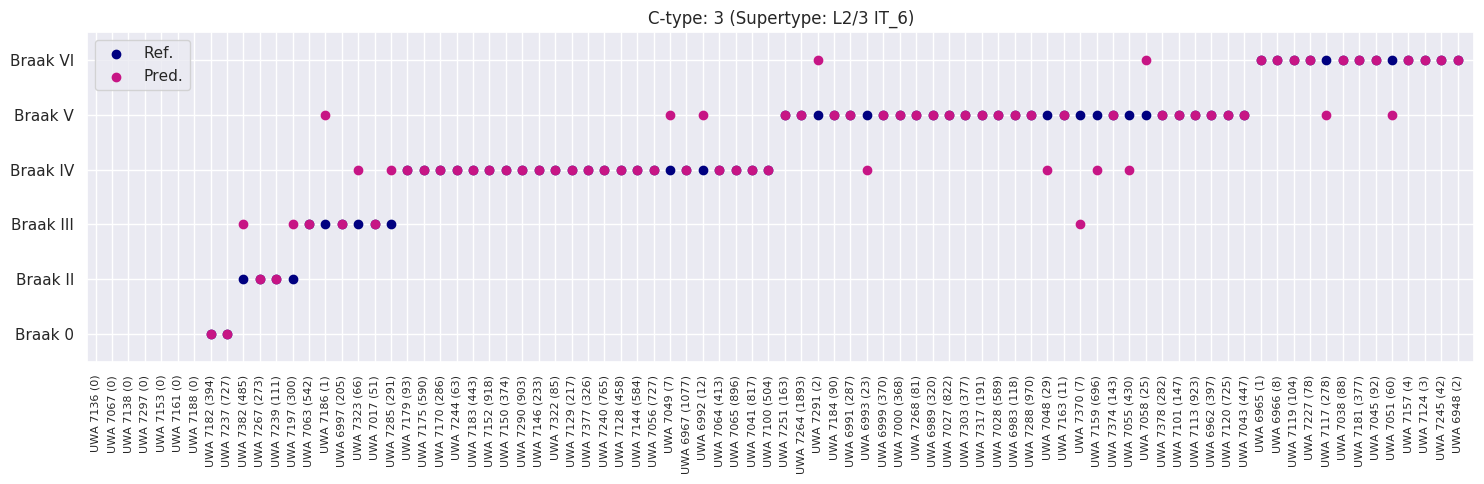

Pearsons correlation: 0.891
4.0 5
using CPU ...
Total loss: 0.006991289132404038
Total loss: 0.009359238462315666
Total loss: 0.009261598189671835
Total loss: 0.00811453965596027
Total loss: 0.007293957233842876
Total loss: 0.006591419689357281
Total loss: 0.007817272122742401
Total loss: 0.007189584119866292
Total loss: 0.007301247678697109
Total loss: 0.006899088659944634


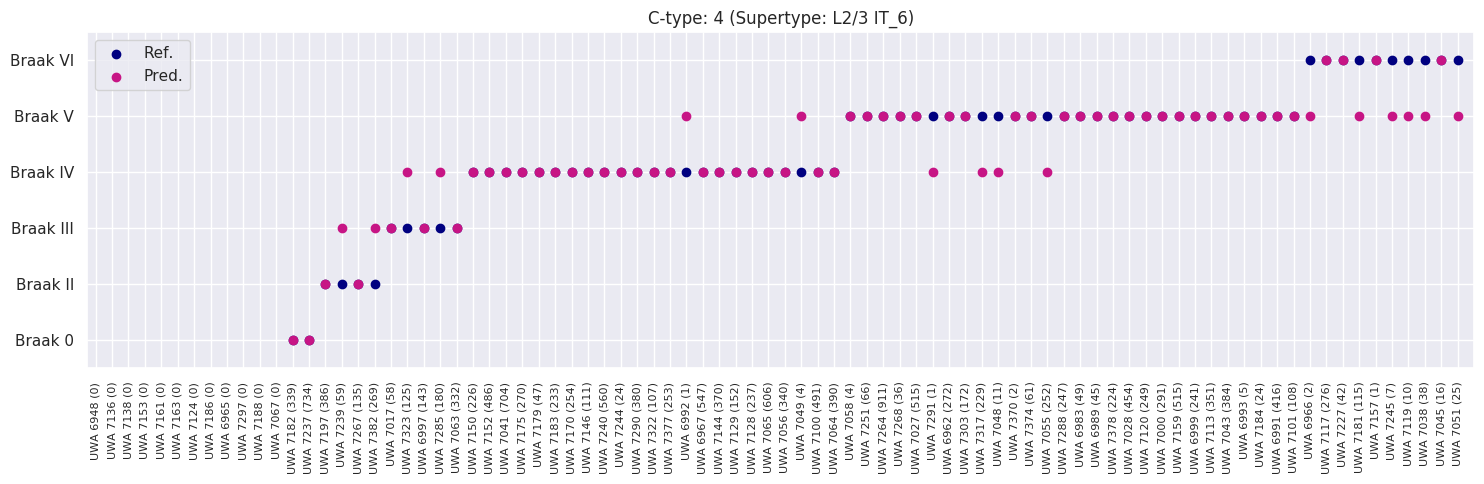

Pearsons correlation: 0.915
5.0 4
using CPU ...
Total loss: 0.016906834207475185
Total loss: 0.016682947985827923
Total loss: 0.01251425500959158
Total loss: 0.015973458532243967
Total loss: 0.01581613114103675
Total loss: 0.012416698038578033
Total loss: 0.01483618002384901
Total loss: 0.013972209300845861
Total loss: 0.014805530197918415
Total loss: 0.017888854257762432


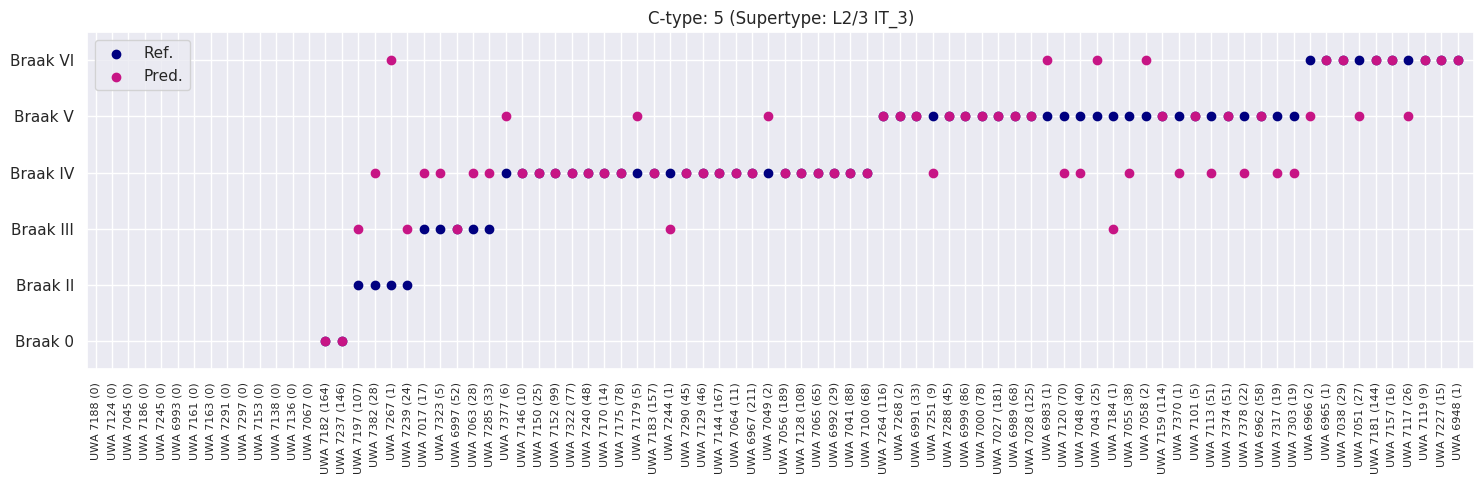

Pearsons correlation: 0.714
6.0 7
using CPU ...
Total loss: 0.01917809061706066
Total loss: 0.014416676945984364
Total loss: 0.026736944913864136
Total loss: 0.017955436371266842
Total loss: 0.02426791377365589
Total loss: 0.024193357210606337
Total loss: 0.023525559343397617
Total loss: 0.016224367544054985
Total loss: 0.01627907296642661
Total loss: 0.02440643310546875


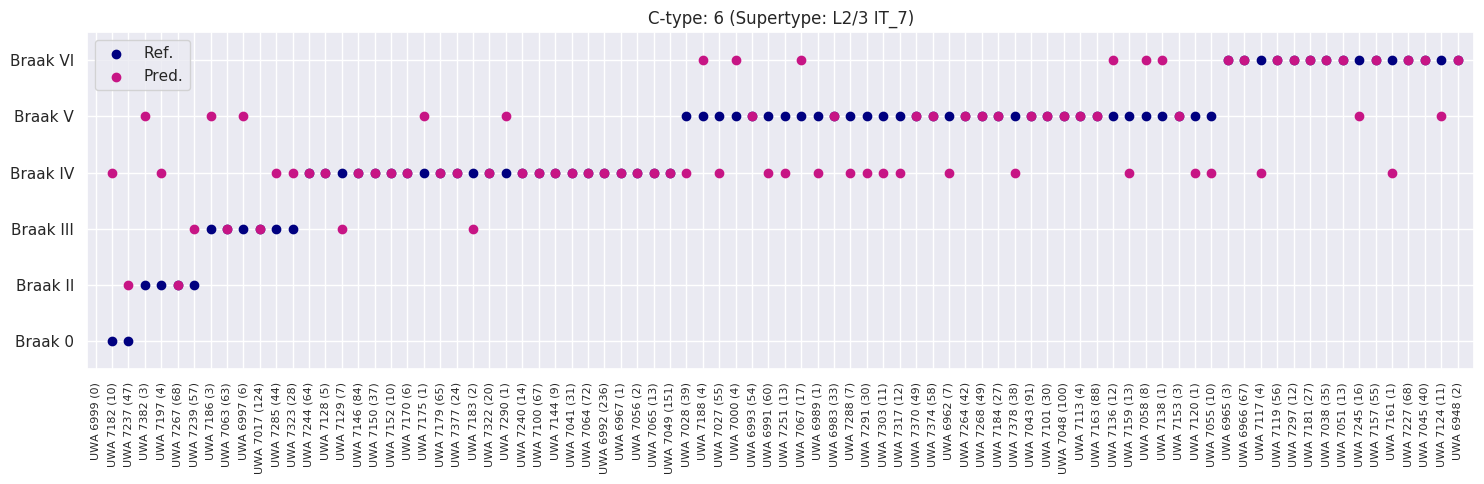

Pearsons correlation: 0.648
7.0 0
using CPU ...
Total loss: 0.011631440686281113
Total loss: 0.011115169960676748
Total loss: 0.010659040568177314
Total loss: 0.011744944104815231
Total loss: 0.011684967177536558
Total loss: 0.011152376085245871
Total loss: 0.011476883466136368
Total loss: 0.012253351865665
Total loss: 0.011329248862560181
Total loss: 0.009933434820542222


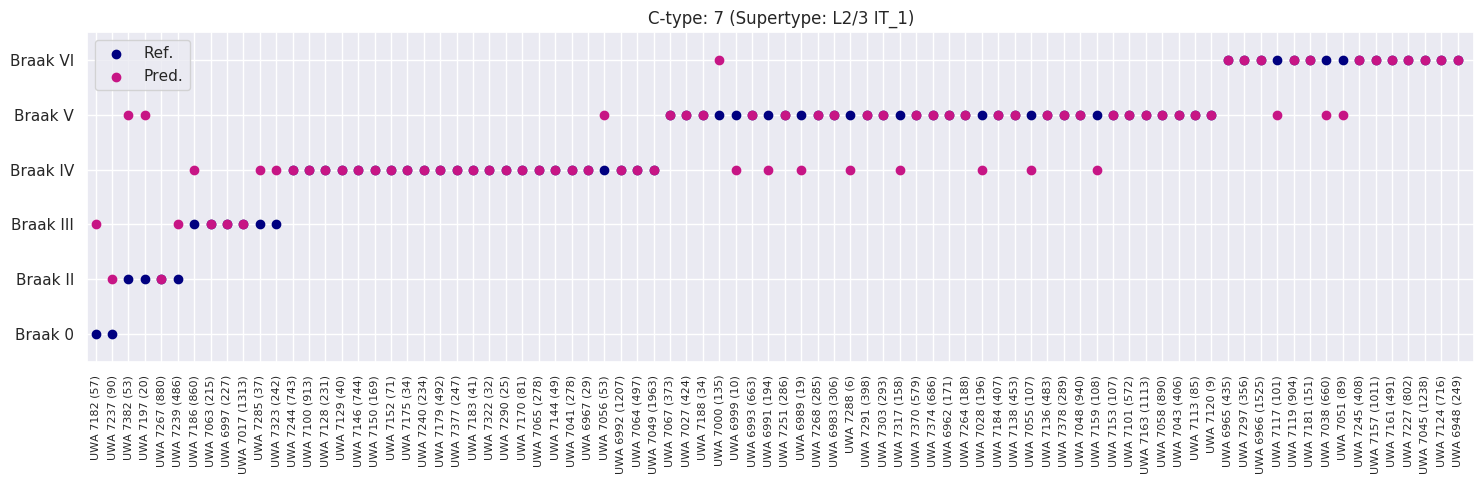

Pearsons correlation: 0.801
8.0 3
using CPU ...
Total loss: 0.008508042182906397
Total loss: 0.008043414647025722
Total loss: 0.009152164616222893
Total loss: 0.008674819537970637
Total loss: 0.010436433866353971
Total loss: 0.009278592387480395
Total loss: 0.008587206481024623
Total loss: 0.008927746077201195
Total loss: 0.008626457370285476
Total loss: 0.008022397856361099


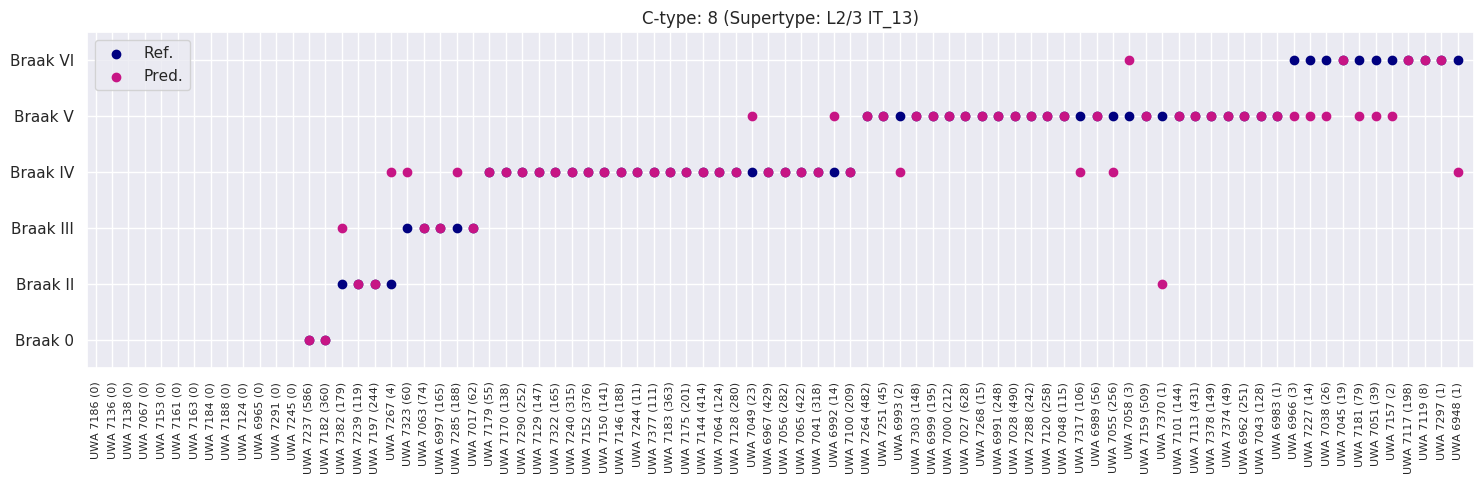

Pearsons correlation: 0.824
10.0 4
using CPU ...
Total loss: 0.00990806007757783
Total loss: 0.009034155402332544
Total loss: 0.013010753551498055
Total loss: 0.016053481958806515
Total loss: 0.013859430328011513
Total loss: 0.01876490470021963
Total loss: 0.013746322598308325
Total loss: 0.011511370306834579
Total loss: 0.017517345026135445
Total loss: 0.009572452865540981


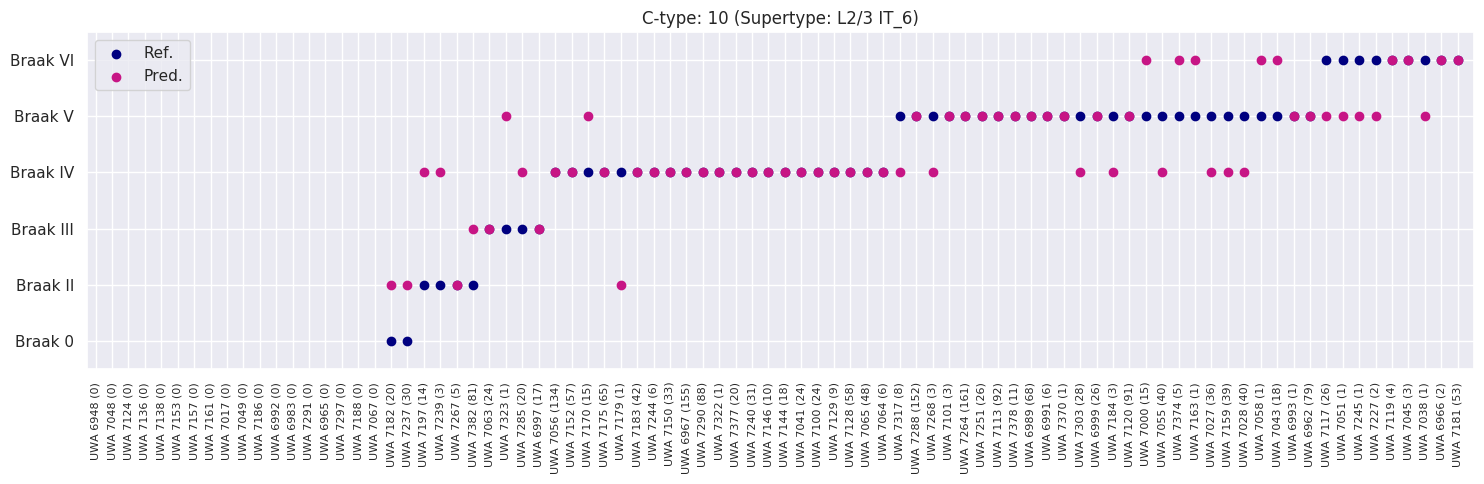

Pearsons correlation: 0.757


In [22]:
arm = 0
seed = 100
kfold = 10
state = outcome['state_mu'][arm, :, :]
pred_type = outcome['pred_label'][-1][arm, :]
s_idx = outcome['sample_id'][-1].astype(int)
cat = np.unique(pred_type)
supertypes = data['supertype_scANVI'][s_idx]
num_types = [sum(supertypes == tt) for tt in np.unique(supertypes)]
metadata = 'braak'
m_ind = []
df_braak = pd.DataFrame()
df_braak['c'] = np.zeros(len(cat))
df_braak['superype'] = np.zeros(len(cat))
df_braak['pearson_corr'] = np.zeros(len(cat))
df_braak['mse'] = np.zeros(len(cat))

if metadata == 'cognitive_status_binary':
    data['cs_binary'] = np.zeros(len(data[metadata]))
    indx_dem = np.where(data[metadata] == 'Dementia')[0]
    indx_nodem = np.where(data[metadata] == 'No dementia')[0]
    data['cs_binary'][indx_dem] = 1
    data['cs_binary'][indx_nodem] = 0
    metadata = 'cs_binary'
    binary = True
else:
    binary = False

if metadata == 'caascore':
    data['caa'] = np.zeros(len(data[metadata]))
    indx_mild = np.where(data[metadata] == 'Mild')[0]
    indx_moderate = np.where(data[metadata] == 'Moderate')[0]
    indx_severe = np.where(data[metadata] == 'Severe')[0]
    data['caa'][indx_mild] = 0.1
    data['caa'][indx_moderate] = 0.5
    data['caa'][indx_moderate] = 1
    metadata = 'caa'

if metadata == 'braak':
    data['braak_num'] = np.zeros(len(data[metadata]))
    data['braak_int'] = np.zeros(len(data[metadata]))
    indx_0 = np.where(data[metadata] == 'Braak 0')[0]
    indx_ii = np.where(data[metadata] == 'Braak II')[0]
    indx_iii = np.where(data[metadata] == 'Braak III')[0]
    indx_iv = np.where(data[metadata] == 'Braak IV')[0]
    indx_v = np.where(data[metadata] == 'Braak V')[0]
    indx_vi = np.where(data[metadata] == 'Braak VI')[0]
    data['braak_num'][indx_0] = 0.
    data['braak_num'][indx_ii] = 0.2
    data['braak_num'][indx_iii] = 0.4
    data['braak_num'][indx_iv] = 0.6
    data['braak_num'][indx_v] = 0.8
    data['braak_num'][indx_vi] = 1.
    data['braak_int'][indx_0] = 0
    data['braak_int'][indx_ii] = 2
    data['braak_int'][indx_iii] = 3
    data['braak_int'][indx_iv] = 4
    data['braak_int'][indx_v] = 5
    data['braak_int'][indx_vi] = 6
    metadata = 'braak_num'
    
uniq_donor = np.unique(data['external_donor_name'])

for i_c, c in enumerate(cat):
    eval_dict = []
    error = []
    meta_true = []
    meta_pred = []
    donors_list = []
    idx = np.where(pred_type == c)[0]
    ref_t = data['supertype_scANVI'][s_idx[idx]]
    uniq_ref_t = np.unique(ref_t)
    meta_y = data[metadata][s_idx[idx]]
    tmp_donors = data['external_donor_name'][s_idx[idx]]
    n_types = [sum(ref_t==tt) for tt in uniq_ref_t]
    norm_count = [i / j for i, j in zip(n_types, num_types)]
    idxx = np.where(ref_t == uniq_ref_t[np.argmax(norm_count)])[0]
    print(c, np.argmax(norm_count))
    x = state[idx[idxx], :]
    y = 1. * meta_y[idxx]
    donors = tmp_donors[idxx]
    classifier = state_analyzer(saving_folder=saving_folder, device=device)
    kf = KFold(n_splits=kfold, random_state=seed, shuffle=True)
    m = 0
    for train_index, test_index in kf.split(x):
        m += 1
        classifier.init_model(input_dim=state_dim, output_dim=1, lr=0., std=0.1, c=int(c), binary=False, 
                              meta_label=metadata)
        try:
            trained_model = glob.glob(saving_folder + '/model/deepClassifier_' + metadata + 
                                      '_fold_' + str(m) + '_cat_' + str(int(c)) + '*')[0]
            classifier.load_model(trained_model)
#             f = open(saving_folder + '/summary_' + metadata + '_fold_' + str(m) + '_cat_' + str(int(c))+ '.p', "rb")
#             data_dict = pickle.load(f)
#             f.close()
#             indx = data_dict['sample_indx'].astype(int)
            donors_list.append(donors[test_index])
            eval_dict.append(classifier.eval_prediction(x[test_index, :], y[test_index], donors[test_index], 200))
            meta_true.append(eval_dict[-1]['metadata'])
            meta_pred.append(eval_dict[-1]['prediction'])
            error.append(np.mean(np.abs(eval_dict[-1]['metadata'] - eval_dict[-1]['prediction'])))
        except:
            print('quit')
            break

    if m > 1:
        meta_true = np.concatenate(meta_true)
        meta_pred = np.concatenate(meta_pred)
        donors_list = np.concatenate(donors_list)

        meta_true_mean, meta_true_std = [], []
        meta_pred_mean, meta_pred_std = [], []
        xtick = []

        for i_d, dd in enumerate(uniq_donor):
            d_idx = np.where(donors_list==dd)[0]
            xtick.append(f'{dd} ({len(d_idx)})')
            if len(d_idx) > 0:
                meta_true_mean.append(np.median(meta_true[d_idx]))
                meta_true_std.append(np.std(meta_true[d_idx]))
                meta_pred_mean.append(np.median(meta_pred[d_idx]))
                meta_pred_std.append(np.std(meta_pred[d_idx]))
            else:
                meta_true_mean.append(-10)
                meta_true_std.append(0)
                meta_pred_mean.append(-10)
                meta_pred_std.append(0)

        meta_true_mean = np.array(meta_true_mean)
        meta_true_std = np.array(meta_true_std)
        meta_pred_mean = np.array(meta_pred_mean)
        meta_pred_std = np.array(meta_pred_std)

        values = np.unique(meta_true_mean)
        meta_pred_score = []
        for p_m in meta_pred_mean:
            if p_m > 0:
                dist = (p_m - values)**2
                meta_pred_score.append(values[np.argmin(dist)])
            else:
                meta_pred_score.append(p_m)

        meta_pred_score = np.array(meta_pred_score)
        m_indx = np.argsort(meta_true_mean)
        x = np.arange(len(uniq_donor))
        plt.figure(figsize=[15, 5],dpi=100)
        plt.scatter(x, meta_true_mean[m_indx], color='Navy', label='Ref.')
        plt.scatter(x, meta_pred_score[m_indx], color='MediumVioletRed', label='Pred.')
        plt.yticks(np.unique(data[metadata]), np.unique(data['braak']))
#         plt.xticks(x, uniq_donor[m_indx], rotation=90, fontsize=8)
        plt.xticks(x, np.array(xtick)[m_indx], rotation=90, fontsize=8)
        plt.xlim([-.5, np.max(x)+1])
        plt.ylim([-0.1, np.max(y)+0.1*np.max(y)])
        plt.legend()
        plt.title(f'C-type: {int(c)} (Supertype: {uniq_ref_t[np.argmax(norm_count)]})')
        plt.tight_layout()
        stype = uniq_ref_t[np.argmax(norm_count)]
        plt.savefig(saving_folder + '/braak_' + str(int(c)) + '_' + stype[stype.find('_')+1:] + '_arm_' + str(arm) + '.png', dpi=600)
        plt.show()
        
        y_pred = meta_pred_score[meta_pred_score >= 0]
        y_true = meta_true_mean[meta_pred_score >= 0]
        df_braak['c'][i_c] = int(c)
        df_braak['superype'][i_c] = uniq_ref_t[np.argmax(norm_count)]
        corr, _ = pearsonr(y_true, y_pred)
        print('Pearsons correlation: %.3f' % corr)
        df_braak['pearson_corr'][i_c] = corr
        df_braak['mse'][i_c] = np.mean((y_pred - y_true)**2)

In [23]:
df_braak

c    superype  pearson_corr       mse
0   1.0   L2/3 IT_3      0.159629  0.071899
1   2.0   L2/3 IT_1      0.935714  0.006667
2   3.0   L2/3 IT_6      0.890923  0.011429
3   4.0   L2/3 IT_6      0.915231  0.008889
4   5.0   L2/3 IT_3      0.714491  0.028000
5   6.0   L2/3 IT_7      0.648094  0.032771
6   7.0   L2/3 IT_1      0.800886  0.019048
7   8.0  L2/3 IT_13      0.824122  0.018028
8  10.0   L2/3 IT_6      0.757121  0.023636

1.0 4
using CPU ...
Total loss: 0.040266912430524826
Total loss: 0.05181783810257912
Total loss: 0.042911596596241
Total loss: 0.028776472434401512
Total loss: 0.05242172256112099
Total loss: 0.055742666125297546
Total loss: 0.025488130748271942
Total loss: 0.027579670771956444
Total loss: 0.04141565412282944
Total loss: 0.025833604857325554


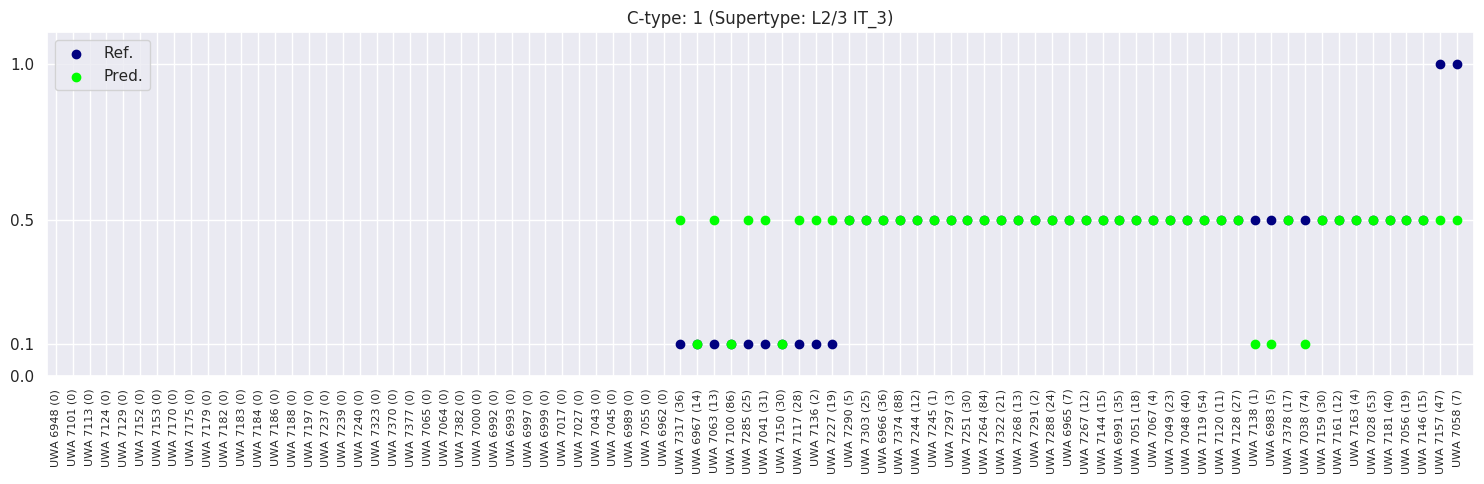

Pearsons correlation: 0.259


/home/yeganeh/miniconda3/envs/tf14-gpu/lib/python3.7/site-packages/ipykernel_launcher.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/yeganeh/miniconda3/envs/tf14-gpu/lib/python3.7/site-packages/ipykernel_launcher.py:191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


2.0 0
using CPU ...
Total loss: 0.02365455220834437
Total loss: 0.025052557164930146
Total loss: 0.02212404197251255
Total loss: 0.024222259663722732
Total loss: 0.024433561907657844
Total loss: 0.023635495454072952
Total loss: 0.024063762138460086
Total loss: 0.024507872336967426
Total loss: 0.02304062124511058
Total loss: 0.022445865906774998


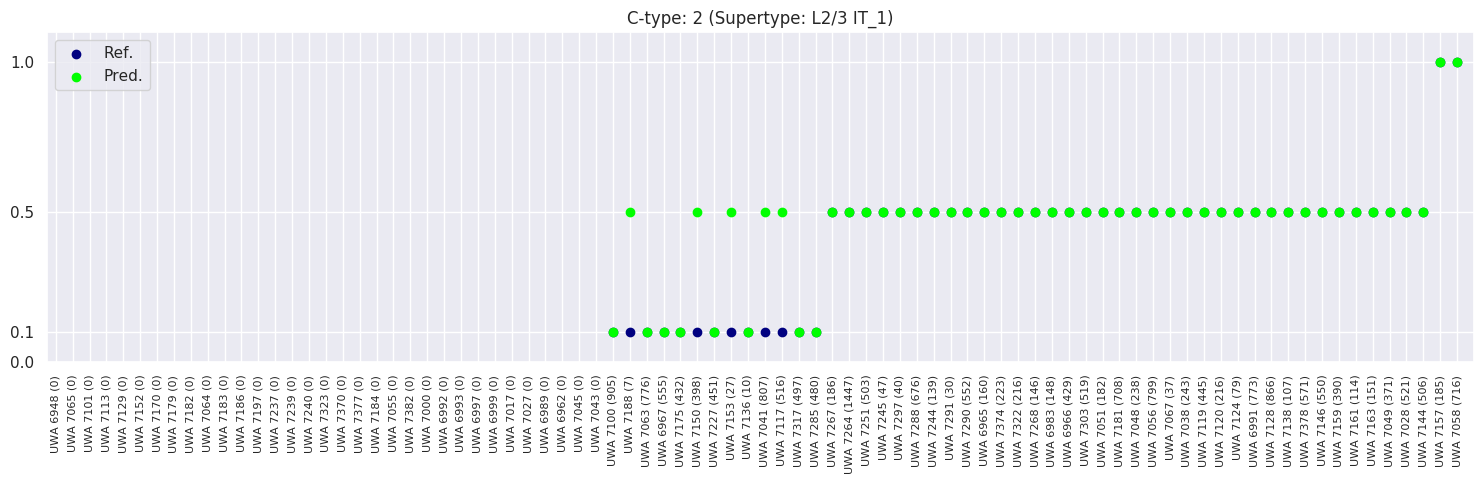

/home/yeganeh/miniconda3/envs/tf14-gpu/lib/python3.7/site-packages/ipykernel_launcher.py:186: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Pearsons correlation: 0.824
3.0 5
using CPU ...
Total loss: 0.017696591559797525
Total loss: 0.016439910396002233
Total loss: 0.01680403435602784
Total loss: 0.018690018565393984
Total loss: 0.017977771756704897
Total loss: 0.01911555213155225
Total loss: 0.016500835306942463
Total loss: 0.01567482273094356
Total loss: 0.01700518117286265
Total loss: 0.0167737026931718


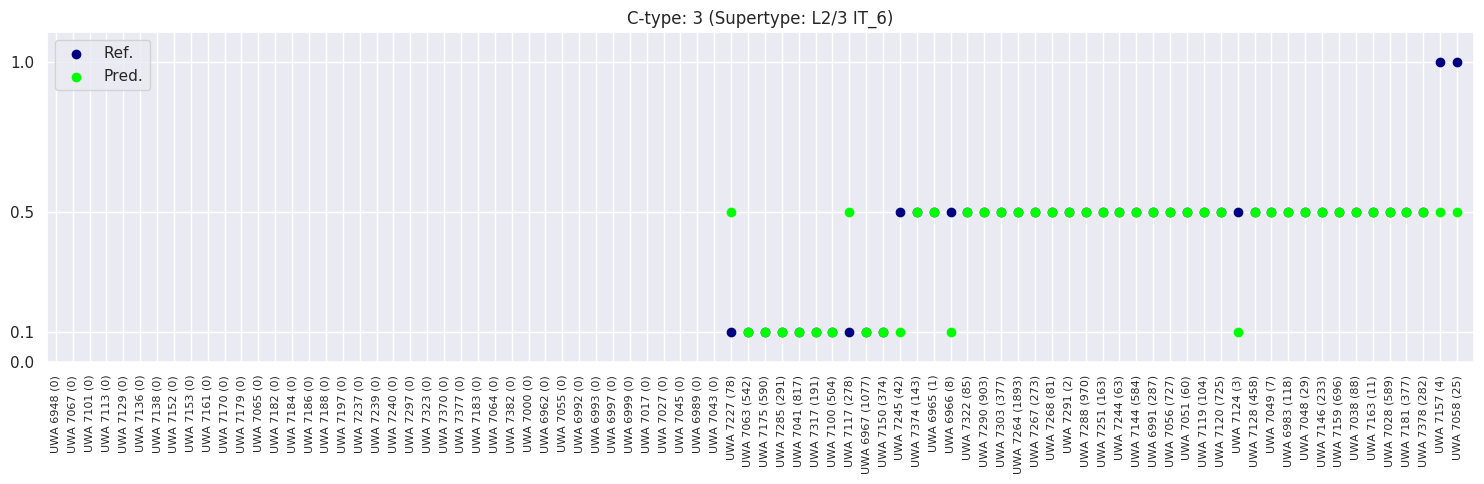

Pearsons correlation: 0.620
4.0 5
using CPU ...
Total loss: 0.018297070264816286
Total loss: 0.01858493499457836
Total loss: 0.020664596185088157
Total loss: 0.02022113520652056
Total loss: 0.02335085179656744
Total loss: 0.02280142419040203
Total loss: 0.02056058868765831
Total loss: 0.02025109324604273
Total loss: 0.017486670799553395
Total loss: 0.022298020869493486


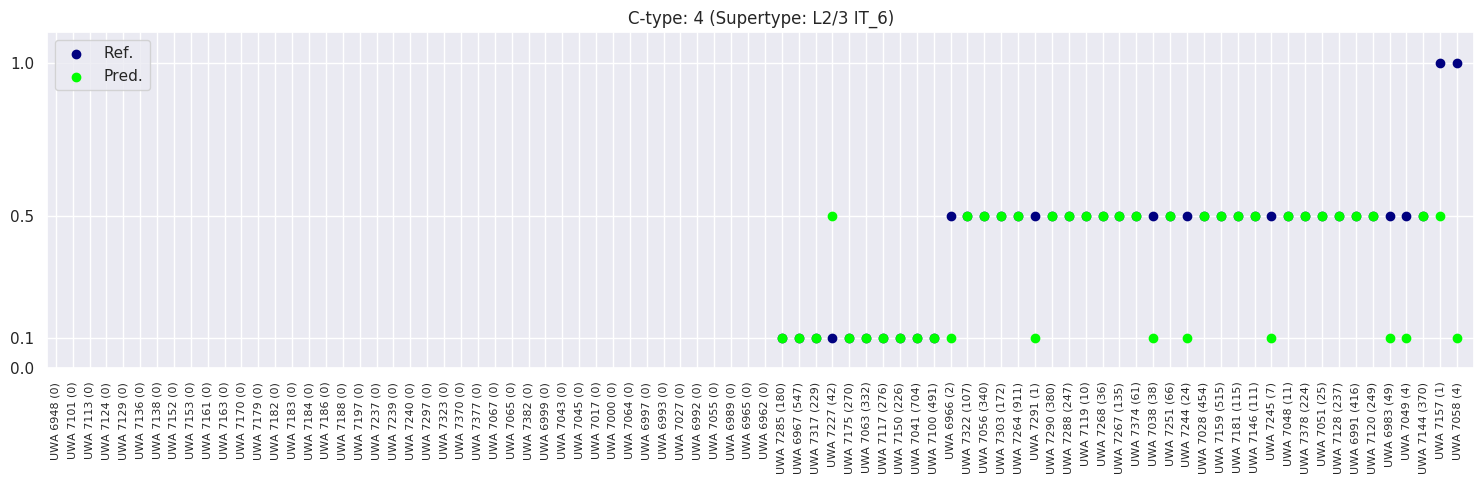

Pearsons correlation: 0.429
5.0 4
using CPU ...
Total loss: 0.02008695900440216
Total loss: 0.023491215892136097
Total loss: 0.026024057529866695
Total loss: 0.03840711247175932
Total loss: 0.016682435991242528
Total loss: 0.020285389851778746
Total loss: 0.023573112674057484
Total loss: 0.03183254972100258
Total loss: 0.025498604401946068
Total loss: 0.03119673579931259


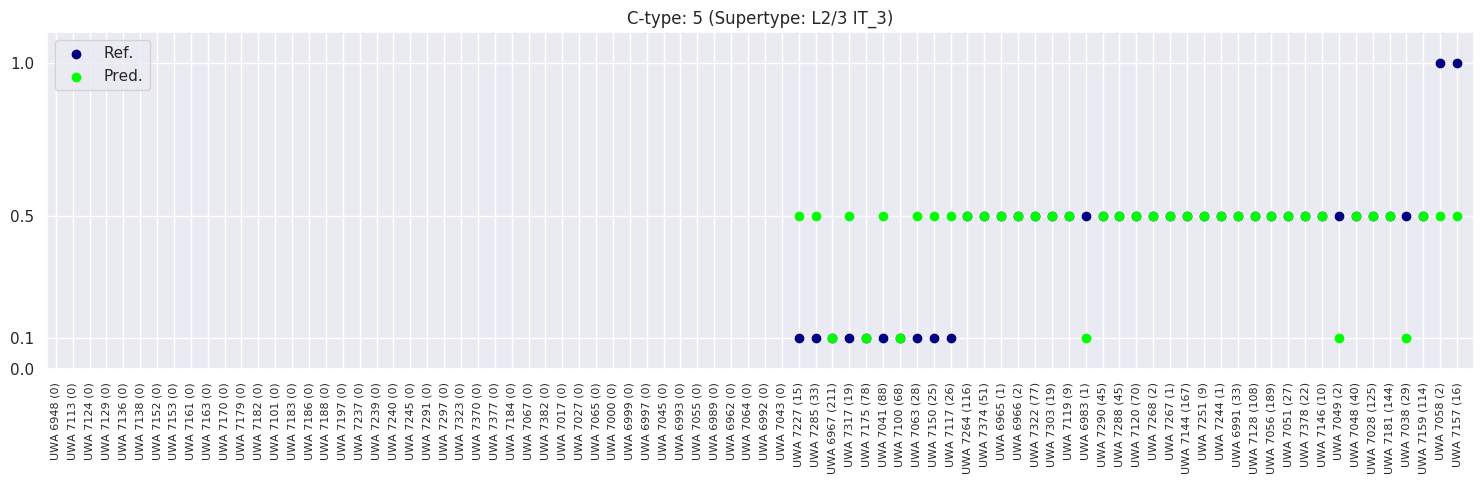

Pearsons correlation: 0.243
6.0 7
using CPU ...
Total loss: 0.02430904656648636
Total loss: 0.022448228672146797
Total loss: 0.021389281377196312
Total loss: 0.0208596084266901
Total loss: 0.022028883919119835
Total loss: 0.021008599549531937
Total loss: 0.02768147736787796
Total loss: 0.02456197701394558
Total loss: 0.021699704229831696
Total loss: 0.02124740742146969


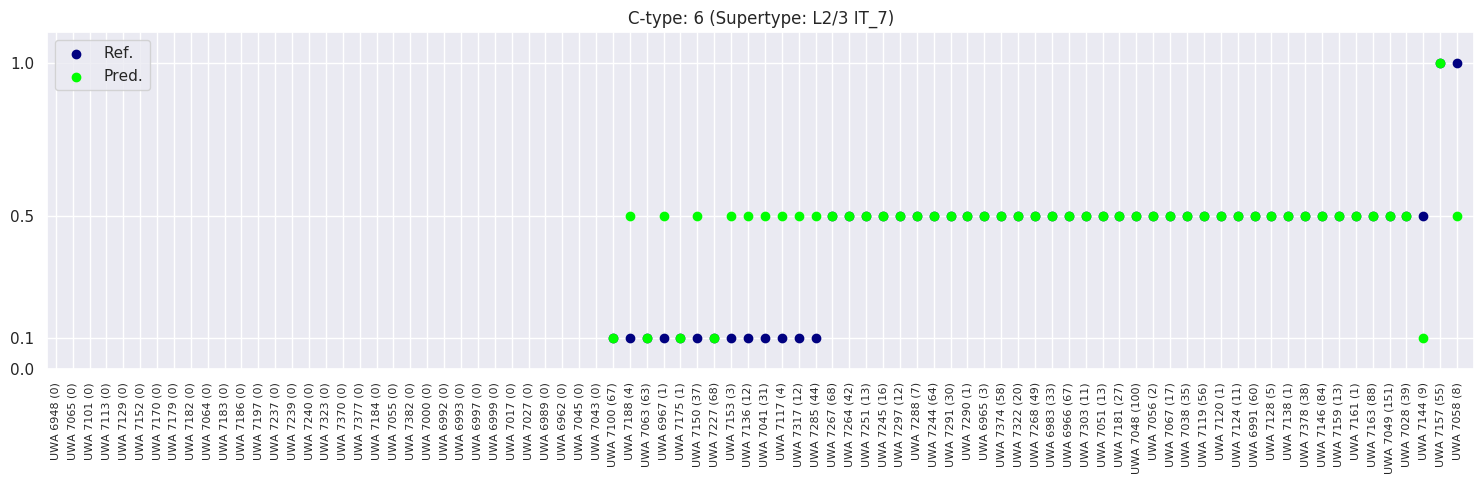

Pearsons correlation: 0.511
7.0 0
using CPU ...
Total loss: 0.017722484994341026
Total loss: 0.017610346782021224
Total loss: 0.017550593305548482
Total loss: 0.017277803436048667
Total loss: 0.01844061236955564
Total loss: 0.01766699005383998
Total loss: 0.01806314469484443
Total loss: 0.01702543137468059
Total loss: 0.0174254953480241
Total loss: 0.015845232135192913


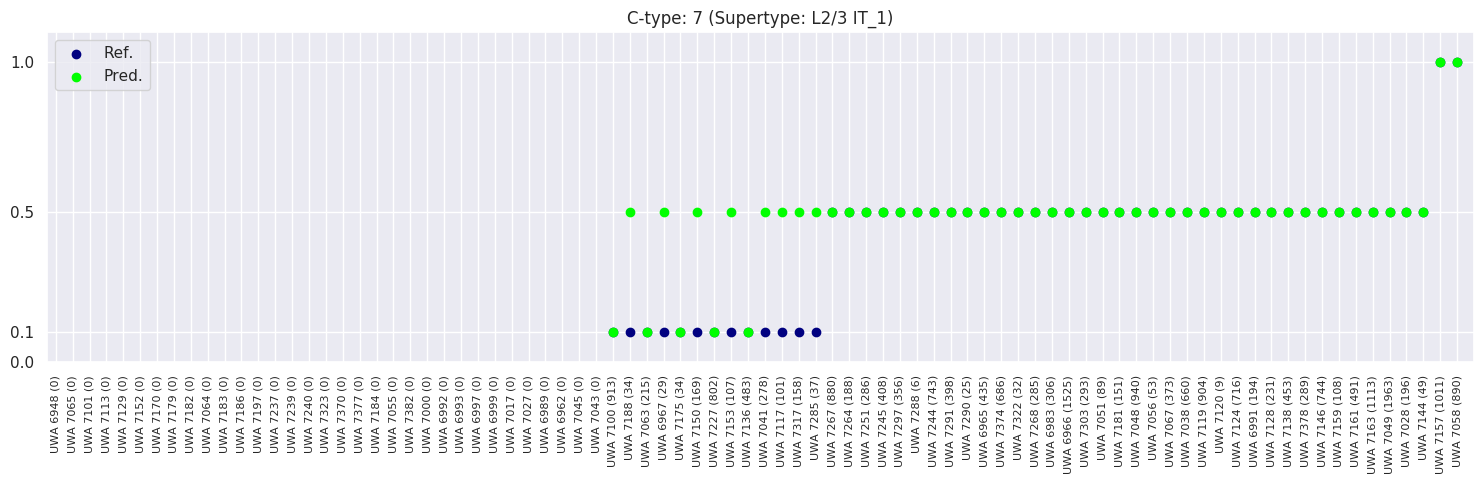

Pearsons correlation: 0.720
8.0 3
using CPU ...
Total loss: 0.02152377087622881
Total loss: 0.025833903579041362
Total loss: 0.01863770536147058
Total loss: 0.018736678874120116
Total loss: 0.02256305981427431
Total loss: 0.022162116831168532
Total loss: 0.022090157261118293
Total loss: 0.022458449471741915
Total loss: 0.021935564931482077
Total loss: 0.021000720793381333


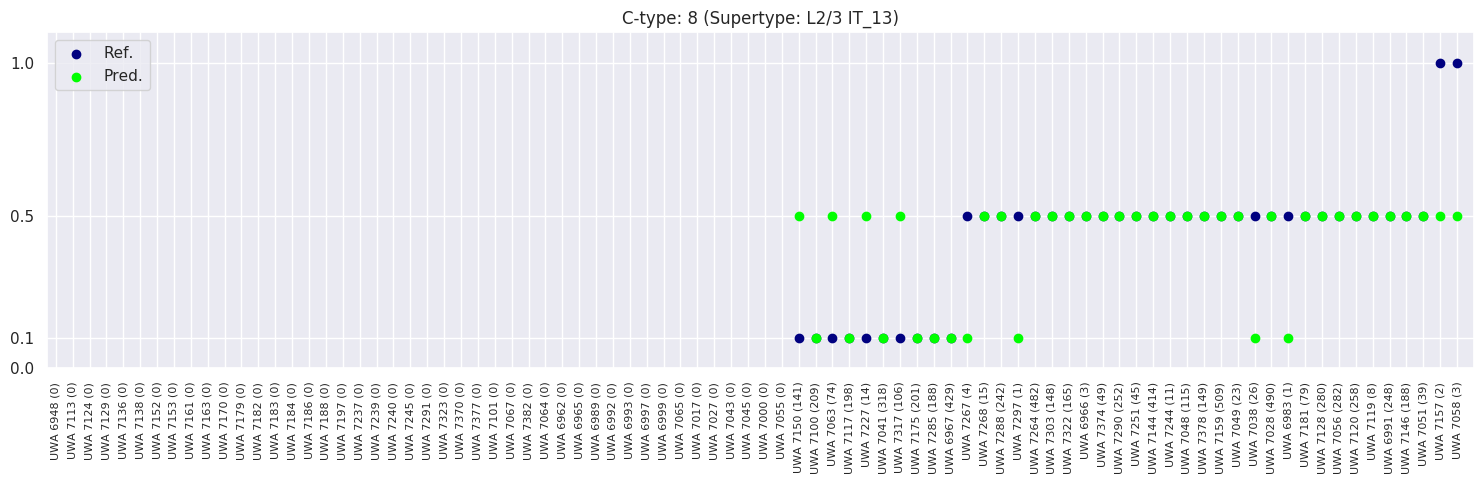

Pearsons correlation: 0.440
10.0 4
using CPU ...
Total loss: 0.016992244869470596
Total loss: 0.021877288818359375
Total loss: 0.017480960115790367
Total loss: 0.017202870920300484
Total loss: 0.01812136173248291
Total loss: 0.01980879157781601
Total loss: 0.021199272945523262
Total loss: 0.02367129921913147
Total loss: 0.02195895090699196
Total loss: 0.015434382483363152


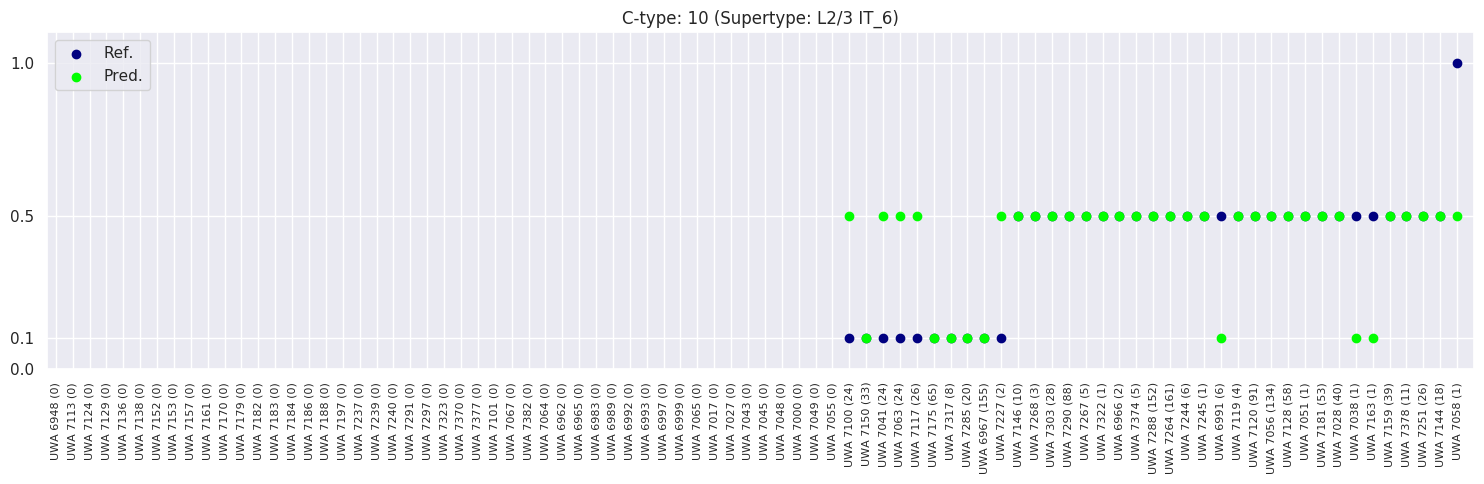

Pearsons correlation: 0.403


In [24]:
seed = 100
kfold = 10
metadata = 'caascore'

m_ind = []
df_caa = pd.DataFrame()
df_caa['c'] = np.zeros(len(cat))
df_caa['superype'] = np.zeros(len(cat))
df_caa['pearson_corr'] = np.zeros(len(cat))
df_caa['mse'] = np.zeros(len(cat))

if metadata == 'cognitive_status_binary':
    data['cs_binary'] = np.zeros(len(data[metadata]))
    indx_dem = np.where(data[metadata] == 'Dementia')[0]
    indx_nodem = np.where(data[metadata] == 'No dementia')[0]
    data['cs_binary'][indx_dem] = 1
    data['cs_binary'][indx_nodem] = 0
    metadata = 'cs_binary'
    binary = True
else:
    binary = False

if metadata == 'caascore':
    data['caa'] = np.zeros(len(data[metadata]))
    indx_mild = np.where(data[metadata] == 'Mild')[0]
    indx_moderate = np.where(data[metadata] == 'Moderate')[0]
    indx_severe = np.where(data[metadata] == 'Severe')[0]
    data['caa'][indx_mild] = 0.1
    data['caa'][indx_moderate] = 0.5
    data['caa'][indx_severe] = 1
    metadata = 'caa'

if metadata == 'cscore':
    data['cs'] = np.zeros(len(data[metadata]))
    indx_absent = np.where(data[metadata] == 'Absent')[0]
    indx_mild = np.where(data[metadata] == 'Sparse')[0]
    indx_moderate = np.where(data[metadata] == 'Moderate')[0]
    indx_severe = np.where(data[metadata] == 'Frequent')[0]
    data['cs'][indx_absent] = .1
    data['cs'][indx_mild] = .4
    data['cs'][indx_moderate] = .7
    data['cs'][indx_severe] = 1
    metadata = 'cs'

if metadata == 'braak':
    data['braak_num'] = np.zeros(len(data[metadata]))
    data['braak_int'] = np.zeros(len(data[metadata]))
    indx_0 = np.where(data[metadata] == 'Braak 0')[0]
    indx_ii = np.where(data[metadata] == 'Braak II')[0]
    indx_iii = np.where(data[metadata] == 'Braak III')[0]
    indx_iv = np.where(data[metadata] == 'Braak IV')[0]
    indx_v = np.where(data[metadata] == 'Braak V')[0]
    indx_vi = np.where(data[metadata] == 'Braak VI')[0]
    data['braak_num'][indx_0] = 0.
    data['braak_num'][indx_ii] = 0.2
    data['braak_num'][indx_iii] = 0.4
    data['braak_num'][indx_iv] = 0.6
    data['braak_num'][indx_v] = 0.8
    data['braak_num'][indx_vi] = 1.
    data['braak_int'][indx_0] = 0
    data['braak_int'][indx_ii] = 2
    data['braak_int'][indx_iii] = 3
    data['braak_int'][indx_iv] = 4
    data['braak_int'][indx_v] = 5
    data['braak_int'][indx_vi] = 6
    metadata = 'braak_num'
    

arm = 0
if metadata == 'caa':
    indx = np.where(data[metadata] > 0)[0]
else:
    indx = np.arange(len(data[metadata]))

state = outcome['state_mu'][arm, :, :]
pred_type = outcome['pred_label'][-1][arm, indx]
s_idx = outcome['sample_id'][-1].astype(int)[indx]
categories = np.unique(pred_type)
eval_dict = [[None] for i in categories]

supertypes = data['supertype_scANVI'][s_idx]
num_types = [sum(supertypes == tt) for tt in np.unique(supertypes)]
super_type = data['supertype_scANVI'][s_idx]
    
uniq_donor = np.unique(data['external_donor_name'])

for i_c, c in enumerate(cat):
    eval_dict = []
    error = []
    meta_true = []
    meta_pred = []
    donors_list = []
    idx = np.where(pred_type == c)[0]
    ref_t = data['supertype_scANVI'][s_idx[idx]]
    uniq_ref_t = np.unique(ref_t)
    meta_y = data[metadata][s_idx[idx]]
    tmp_donors = data['external_donor_name'][s_idx[idx]]
    n_types = [sum(ref_t==tt) for tt in uniq_ref_t]
    norm_count = [i / j for i, j in zip(n_types, num_types)]
    idxx = np.where(ref_t == uniq_ref_t[np.argmax(norm_count)])[0]
    print(c, np.argmax(norm_count))
    x = state[idx[idxx], :]
    y = 1. * meta_y[idxx]
    donors = tmp_donors[idxx]
    classifier = state_analyzer(saving_folder=saving_folder, device=device)
    kf = KFold(n_splits=kfold, random_state=seed, shuffle=True)
    m = 0
    for train_index, test_index in kf.split(x):
        m += 1
        classifier.init_model(input_dim=state_dim, output_dim=1, lr=0., std=0.1, c=int(c), binary=False, 
                              meta_label=metadata)
        try:
            trained_model = glob.glob(saving_folder + '/model/deepClassifier_' + metadata + 
                                      '_fold_' + str(m) + '_cat_' + str(int(c)) + '*')[0]
            classifier.load_model(trained_model)
#             f = open(saving_folder + '/summary_' + metadata + '_fold_' + str(m) + '_cat_' + str(int(c))+ '.p', "rb")
#             data_dict = pickle.load(f)
#             f.close()
#             indx = data_dict['sample_indx'].astype(int)
            donors_list.append(donors[test_index])
            eval_dict.append(classifier.eval_prediction(x[test_index, :], y[test_index], donors[test_index], 200))
            meta_true.append(eval_dict[-1]['metadata'])
            meta_pred.append(eval_dict[-1]['prediction'])
            error.append(np.mean(np.abs(eval_dict[-1]['metadata'] - eval_dict[-1]['prediction'])))
        except:
            print('quit')
            break

    if m > 1:
        meta_true = np.concatenate(meta_true)
        meta_pred = np.concatenate(meta_pred)
        donors_list = np.concatenate(donors_list)

        meta_true_mean, meta_true_std = [], []
        meta_pred_mean, meta_pred_std = [], []
        xtick = []

        for i_d, dd in enumerate(uniq_donor):
            d_idx = np.where(donors_list==dd)[0]
            xtick.append(f'{dd} ({len(d_idx)})')
            if len(d_idx) > 0:
                meta_true_mean.append(np.median(meta_true[d_idx]))
                meta_true_std.append(np.std(meta_true[d_idx]))
                meta_pred_mean.append(np.median(meta_pred[d_idx]))
                meta_pred_std.append(np.std(meta_pred[d_idx]))
            else:
                meta_true_mean.append(-10)
                meta_true_std.append(0)
                meta_pred_mean.append(-10)
                meta_pred_std.append(0)

        meta_true_mean = np.array(meta_true_mean)
        meta_true_std = np.array(meta_true_std)
        meta_pred_mean = np.array(meta_pred_mean)
        meta_pred_std = np.array(meta_pred_std)

        values = np.unique(meta_true_mean)
        meta_pred_score = []
        for p_m in meta_pred_mean:
            if p_m > 0:
                dist = (p_m - values)**2
                meta_pred_score.append(values[np.argmin(dist)])
            else:
                meta_pred_score.append(p_m)

        meta_pred_score = np.array(meta_pred_score)
        m_indx = np.argsort(meta_true_mean)
        x = np.arange(len(uniq_donor))
        plt.figure(figsize=[15, 5],dpi=100)
        plt.scatter(x, meta_true_mean[m_indx], color='Navy', label='Ref.')
        plt.scatter(x, meta_pred_score[m_indx], color='Lime', label='Pred.')
        plt.yticks(np.unique(data[metadata]), np.unique(data[metadata]))
#         plt.xticks(x, uniq_donor[m_indx], rotation=90, fontsize=8)
        plt.xticks(x, np.array(xtick)[m_indx], rotation=90, fontsize=8)
        plt.xlim([-.5, np.max(x)+1])
        plt.ylim([0.0, np.max(y)+0.1*np.max(y)])
        plt.legend()
        plt.title(f'C-type: {int(c)} (Supertype: {uniq_ref_t[np.argmax(norm_count)]})')
        plt.tight_layout()
        stype = uniq_ref_t[np.argmax(n_types)]
        plt.savefig(saving_folder + '/caascore_' + str(int(c)) + '_' + stype[stype.find('_')+1:] + '_arm_' + str(arm) + '.png', dpi=600)
        plt.show()
        
        y_pred = meta_pred_score[meta_pred_score > 0]
        y_true = meta_true_mean[meta_pred_score > 0]
        df_caa['c'][i_c] = int(c)
        df_caa['superype'][i_c] = uniq_ref_t[np.argmax(norm_count)]
        corr, _ = pearsonr(y_true, y_pred)
        print('Pearsons correlation: %.3f' % corr)
        df_caa['pearson_corr'][i_c] = corr
        df_caa['mse'][i_c] = np.mean((y_pred - y_true)**2)

In [25]:
df_caa

c    superype  pearson_corr       mse
0   1.0   L2/3 IT_3      0.258504  0.044681
1   2.0   L2/3 IT_1      0.824015  0.015686
2   3.0   L2/3 IT_6      0.619559  0.029545
3   4.0   L2/3 IT_6      0.429069  0.057073
4   5.0   L2/3 IT_3      0.242536  0.052500
5   6.0   L2/3 IT_7      0.511292  0.036275
6   7.0   L2/3 IT_1      0.719941  0.025098
7   8.0  L2/3 IT_13      0.440000  0.044500
8  10.0   L2/3 IT_6      0.402852  0.041351

1.0 4
using CPU ...
Total loss: 0.23270617425441742
Total loss: 0.19698087871074677
Total loss: 0.20017649233341217
Total loss: 0.07861053384840488
Total loss: 0.17670448869466782
Total loss: 0.07846083492040634
Total loss: 0.24333546310663223
Total loss: 0.20620393007993698
Total loss: 0.22665271162986755
Total loss: 0.22369004786014557


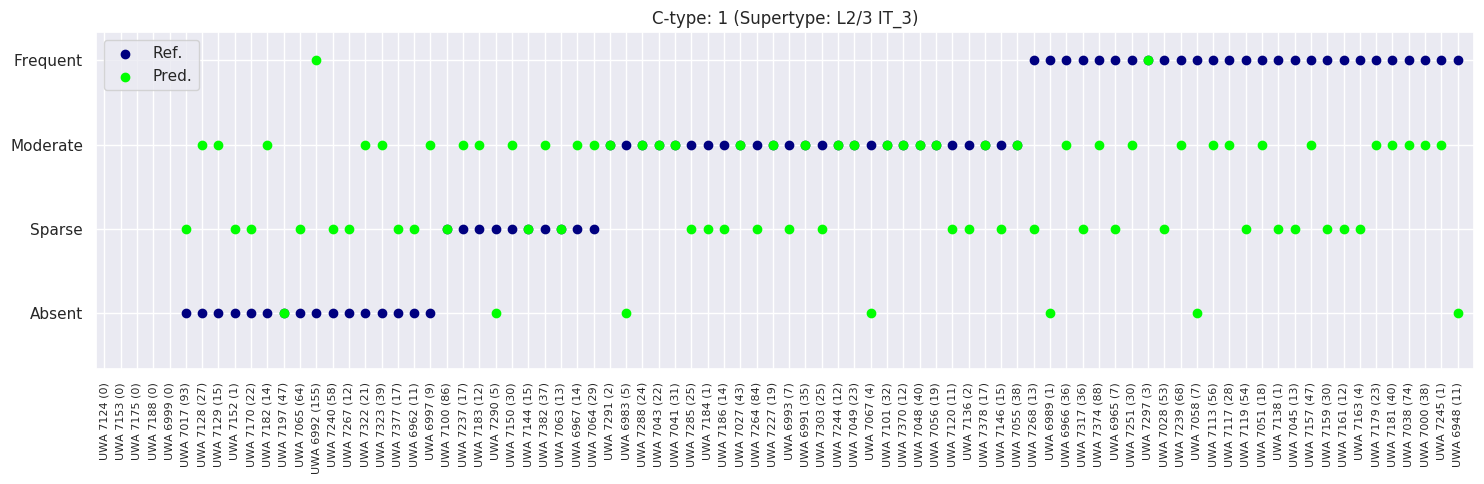

Pearsons correlation: 0.000


/home/yeganeh/miniconda3/envs/tf14-gpu/lib/python3.7/site-packages/ipykernel_launcher.py:180: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/yeganeh/miniconda3/envs/tf14-gpu/lib/python3.7/site-packages/ipykernel_launcher.py:181: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


2.0 0
using CPU ...
Total loss: 0.02445165827674301
Total loss: 0.024355630880515827
Total loss: 0.02438569779654867
Total loss: 0.024466931550322396
Total loss: 0.024059733547466367
Total loss: 0.025591118971964245
Total loss: 0.025433890619560293
Total loss: 0.021983287321697725
Total loss: 0.02380414164968227
Total loss: 0.025516315608432417


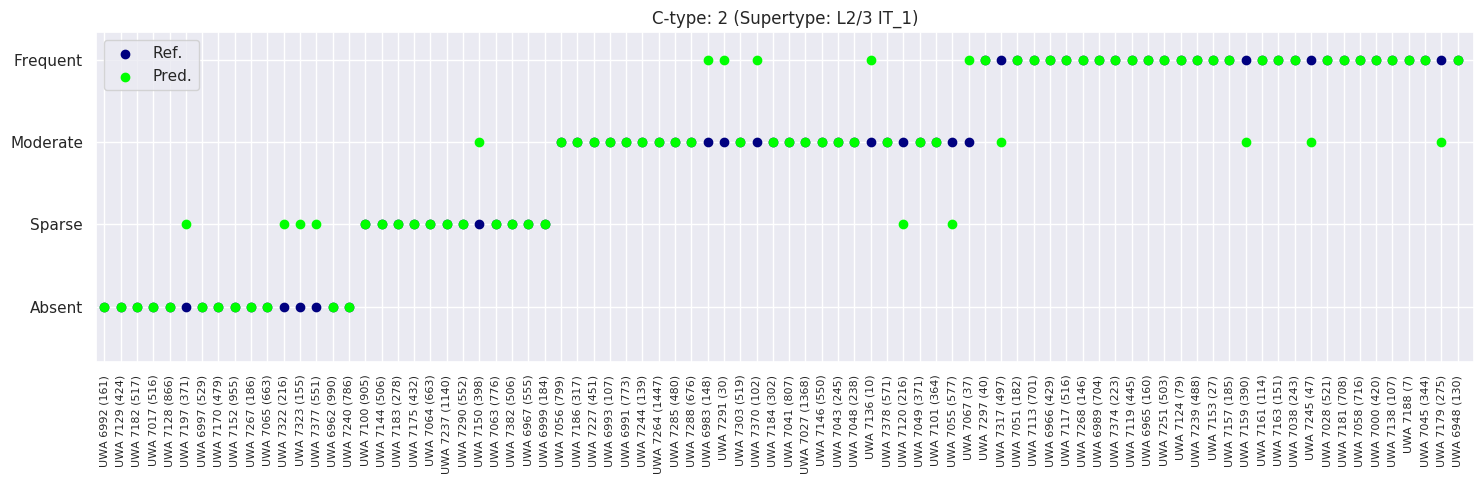

/home/yeganeh/miniconda3/envs/tf14-gpu/lib/python3.7/site-packages/ipykernel_launcher.py:176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Pearsons correlation: 0.921
3.0 6
using CPU ...
Total loss: 0.01893479486794344
Total loss: 0.02086570975370705
Total loss: 0.019703519297763705
Total loss: 0.021057122985699346
Total loss: 0.019364541662590846
Total loss: 0.017844867992347906
Total loss: 0.02273086568207613
Total loss: 0.018892507135335888
Total loss: 0.016305300440373167
Total loss: 0.02032883681489953


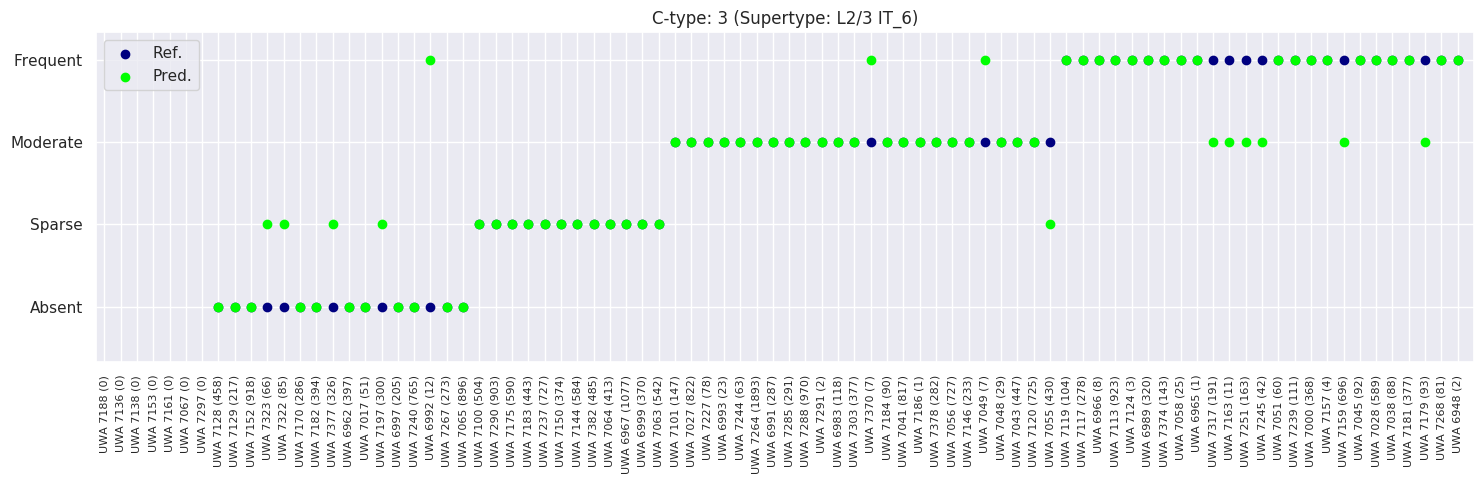

Pearsons correlation: 0.879
4.0 5
using CPU ...
Total loss: 0.022506637705696955
Total loss: 0.02117720903414819
Total loss: 0.024646681422988575
Total loss: 0.021119980245000787
Total loss: 0.02350108873926931
Total loss: 0.02134852892615729
Total loss: 0.02491898513916466
Total loss: 0.020873143829198346
Total loss: 0.02246826809520523
Total loss: 0.020910800693349704


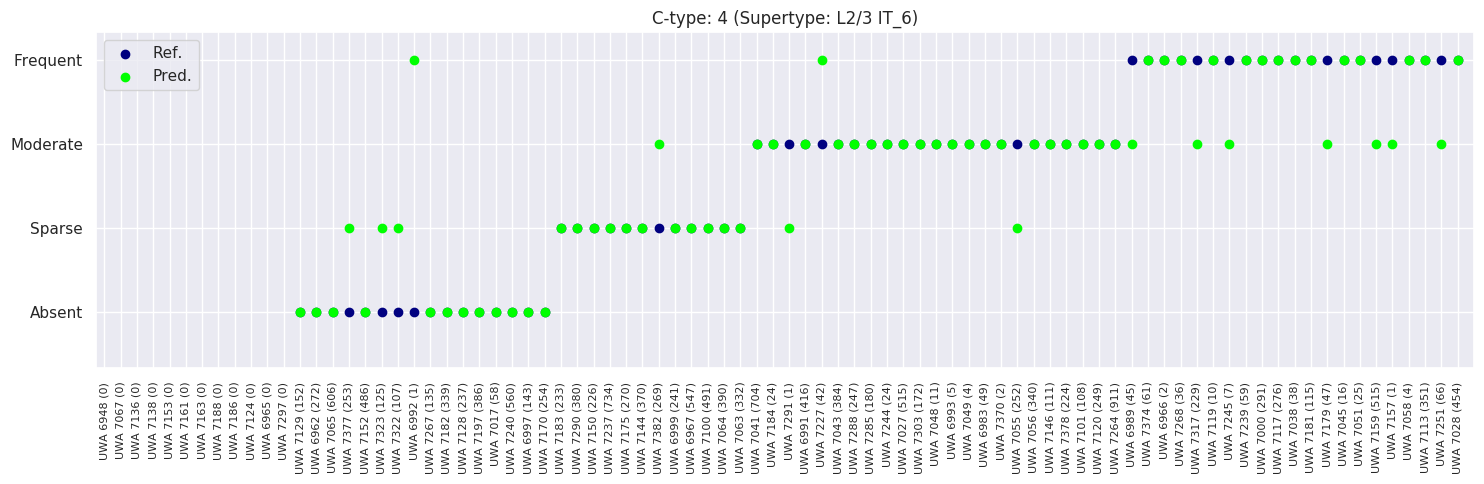

Pearsons correlation: 0.863
5.0 4
using CPU ...
Total loss: 0.035688597708940506
Total loss: 0.031725289300084114
Total loss: 0.03387294337153435
Total loss: 0.0338027523830533
Total loss: 0.03729173541069031
Total loss: 0.03266019746661186
Total loss: 0.03560670372098684
Total loss: 0.03398217260837555
Total loss: 0.03611259162425995
Total loss: 0.05457128398120403


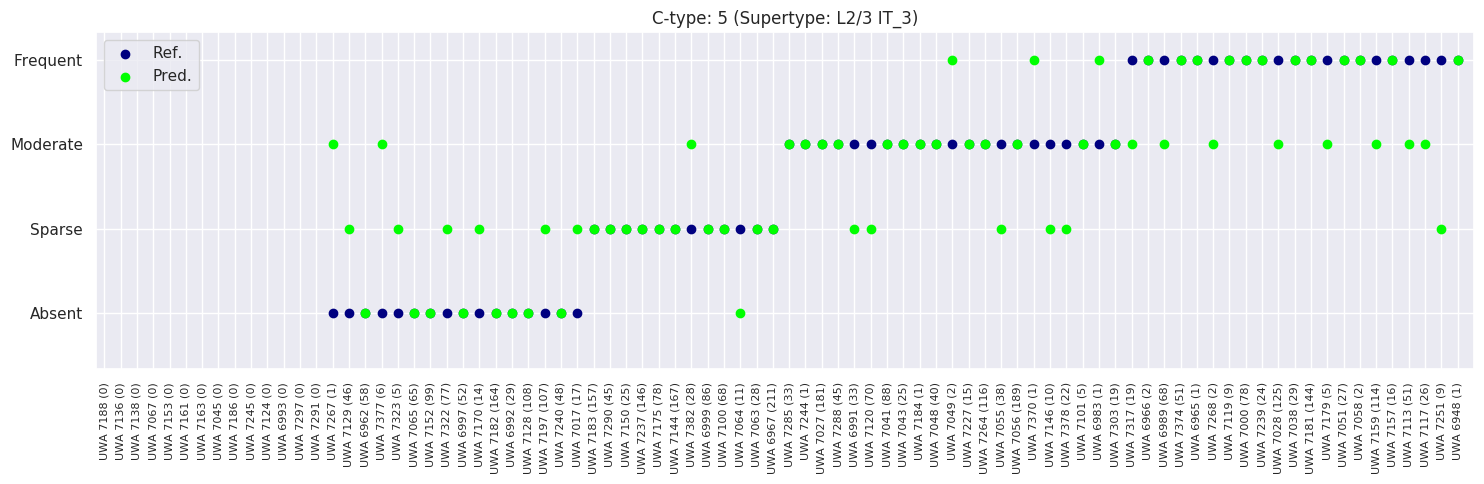

Pearsons correlation: 0.777
6.0 7
using CPU ...
Total loss: 0.05424203723669052
Total loss: 0.04464645031839609
Total loss: 0.056713338010013103
Total loss: 0.04857157543301582
Total loss: 0.04592240136116743
Total loss: 0.04395321849733591
Total loss: 0.04703243263065815
Total loss: 0.043701525777578354
Total loss: 0.04368031583726406
Total loss: 0.04266599006950855


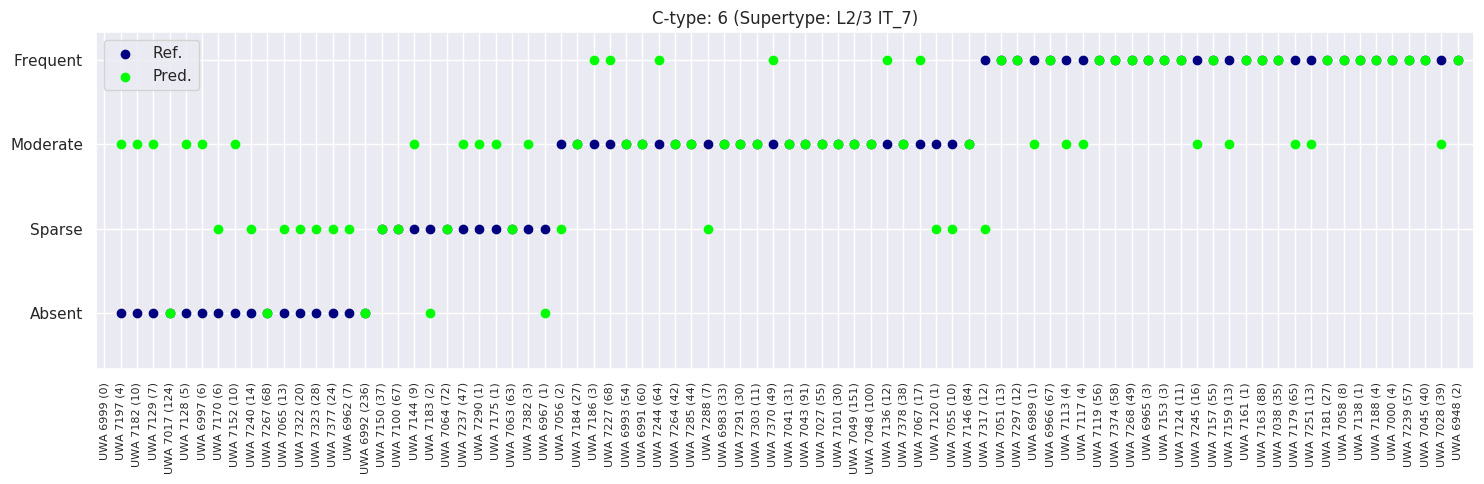

Pearsons correlation: 0.672
7.0 0
using CPU ...
Total loss: 0.018949970931691283
Total loss: 0.02044949942158864
Total loss: 0.019743688678478494
Total loss: 0.020425484365071443
Total loss: 0.020494207082425848
Total loss: 0.02162759767516571
Total loss: 0.020785032785223687
Total loss: 0.02100607637754258
Total loss: 0.02005313610767617
Total loss: 0.019079309929271832


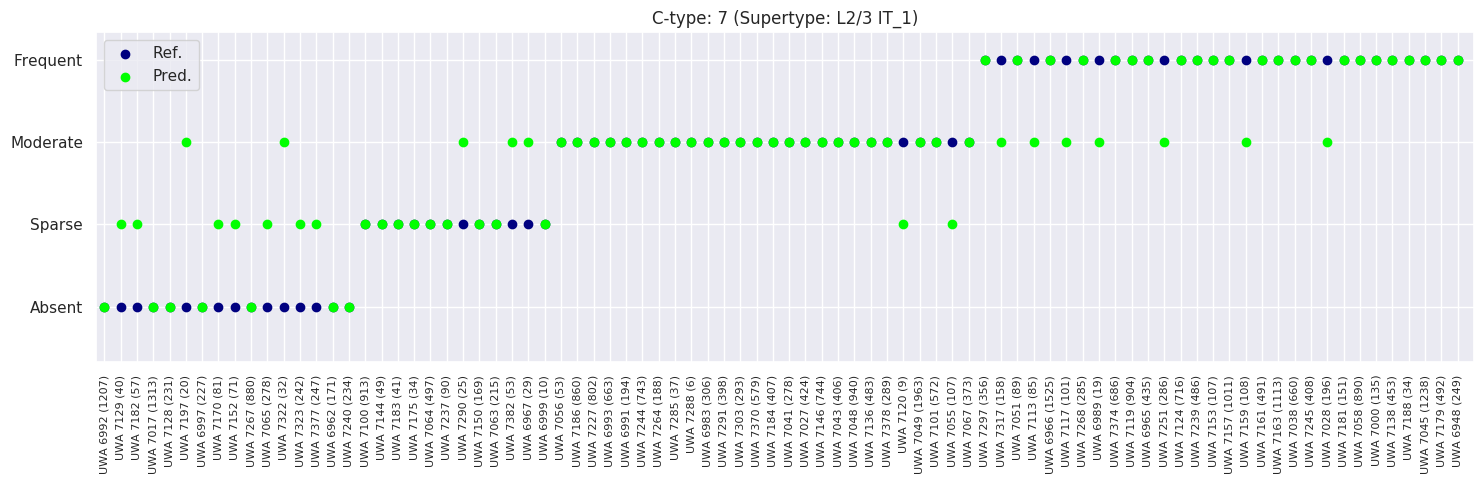

Pearsons correlation: 0.863
8.0 3
using CPU ...
Total loss: 0.021550803910940886
Total loss: 0.024725336182330335
Total loss: 0.023406974705202237
Total loss: 0.025586800184100866
Total loss: 0.026104812510311604
Total loss: 0.027317268241729056
Total loss: 0.026601941058678285
Total loss: 0.024553895661873475
Total loss: 0.026944646079625403
Total loss: 0.028462122327515056


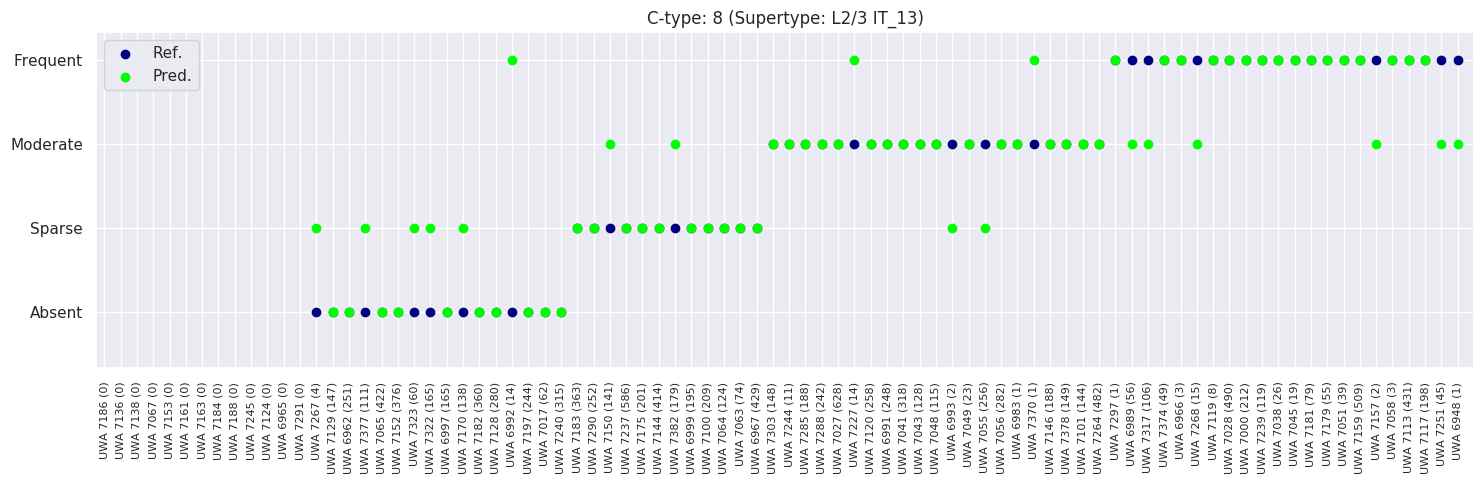

Pearsons correlation: 0.848
10.0 4
using CPU ...
Total loss: 0.019422439392656088
Total loss: 0.024431475903838873
Total loss: 0.026382319629192352
Total loss: 0.05509762838482857
Total loss: 0.06109296344220638
Total loss: 0.05135981924831867
Total loss: 0.021354861557483673
Total loss: 0.0351125244051218
Total loss: 0.02739555574953556
Total loss: 0.028870862908661366


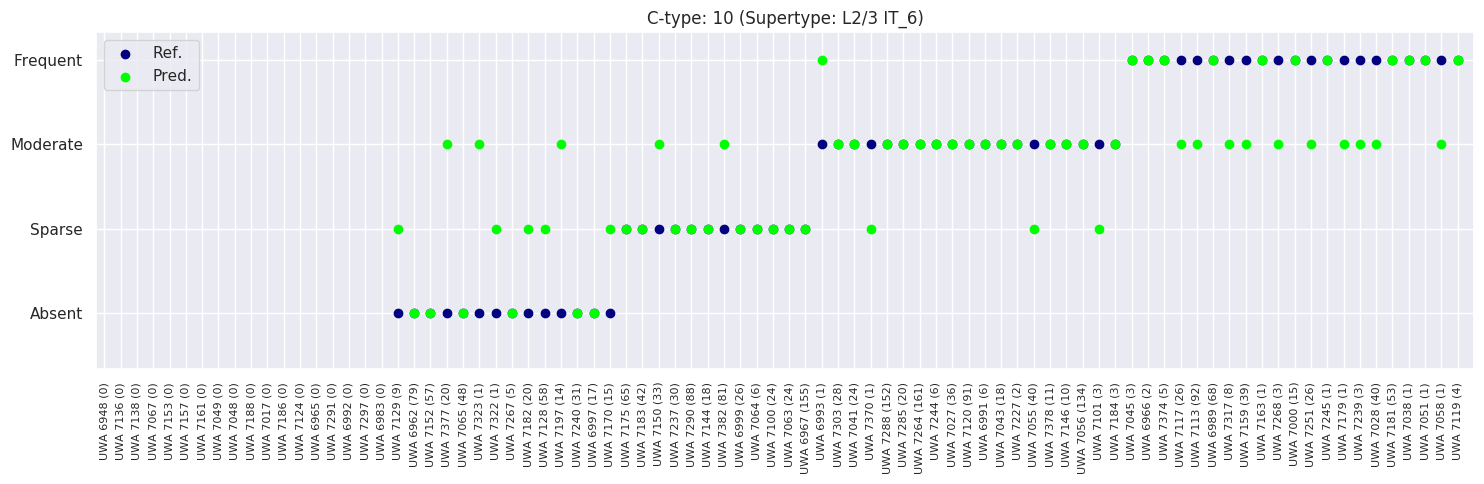

Pearsons correlation: 0.778


In [26]:
arm = 0
seed = 100
kfold = 10
state = outcome['state_mu'][arm, :, :]
pred_type = outcome['pred_label'][-1][arm, :]
s_idx = outcome['sample_id'][-1].astype(int)
cat = np.unique(pred_type)
supertypes = data['supertype_scANVI'][s_idx]
num_types = [sum(supertypes == tt) for tt in np.unique(supertypes)]
metadata = 'cscore'

m_ind = []
df_cs = pd.DataFrame()
df_cs['c'] = np.zeros(len(cat))
df_cs['superype'] = np.zeros(len(cat))
df_cs['pearson_corr'] = np.zeros(len(cat))
df_cs['mse'] = np.zeros(len(cat))

if metadata == 'cognitive_status_binary':
    data['cs_binary'] = np.zeros(len(data[metadata]))
    indx_dem = np.where(data[metadata] == 'Dementia')[0]
    indx_nodem = np.where(data[metadata] == 'No dementia')[0]
    data['cs_binary'][indx_dem] = 1
    data['cs_binary'][indx_nodem] = 0
    metadata = 'cs_binary'
    binary = True
else:
    binary = False

if metadata == 'caascore':
    data['caa'] = np.zeros(len(data[metadata]))
    indx_mild = np.where(data[metadata] == 'Mild')[0]
    indx_moderate = np.where(data[metadata] == 'Moderate')[0]
    indx_severe = np.where(data[metadata] == 'Severe')[0]
    data['caa'][indx_mild] = 0.1
    data['caa'][indx_moderate] = 0.5
    data['caa'][indx_severe] = 1
    metadata = 'caa'

if metadata == 'cscore':
    data['cs'] = np.zeros(len(data[metadata]))
    indx_absent = np.where(data[metadata] == 'Absent')[0]
    indx_mild = np.where(data[metadata] == 'Sparse')[0]
    indx_moderate = np.where(data[metadata] == 'Moderate')[0]
    indx_severe = np.where(data[metadata] == 'Frequent')[0]
    data['cs'][indx_absent] = .1
    data['cs'][indx_mild] = .4
    data['cs'][indx_moderate] = .7
    data['cs'][indx_severe] = 1
    metadata = 'cs'

if metadata == 'braak':
    data['braak_num'] = np.zeros(len(data[metadata]))
    data['braak_int'] = np.zeros(len(data[metadata]))
    indx_0 = np.where(data[metadata] == 'Braak 0')[0]
    indx_ii = np.where(data[metadata] == 'Braak II')[0]
    indx_iii = np.where(data[metadata] == 'Braak III')[0]
    indx_iv = np.where(data[metadata] == 'Braak IV')[0]
    indx_v = np.where(data[metadata] == 'Braak V')[0]
    indx_vi = np.where(data[metadata] == 'Braak VI')[0]
    data['braak_num'][indx_0] = 0.
    data['braak_num'][indx_ii] = 0.2
    data['braak_num'][indx_iii] = 0.4
    data['braak_num'][indx_iv] = 0.6
    data['braak_num'][indx_v] = 0.8
    data['braak_num'][indx_vi] = 1.
    data['braak_int'][indx_0] = 0
    data['braak_int'][indx_ii] = 2
    data['braak_int'][indx_iii] = 3
    data['braak_int'][indx_iv] = 4
    data['braak_int'][indx_v] = 5
    data['braak_int'][indx_vi] = 6
    metadata = 'braak_num'
    
uniq_donor = np.unique(data['external_donor_name'])

for i_c, c in enumerate(cat):
    eval_dict = []
    error = []
    meta_true = []
    meta_pred = []
    donors_list = []
    idx = np.where(pred_type == c)[0]
    ref_t = data['supertype_scANVI'][s_idx[idx]]
    uniq_ref_t = np.unique(ref_t)
    meta_y = data[metadata][s_idx[idx]]
    tmp_donors = data['external_donor_name'][s_idx[idx]]
    n_types = [sum(ref_t==tt) for tt in uniq_ref_t]
    norm_count = [i / j for i, j in zip(n_types, num_types)]
    idxx = np.where(ref_t == uniq_ref_t[np.argmax(norm_count)])[0]
    print(c, np.argmax(norm_count))
    x = state[idx[idxx], :]
    y = 1. * meta_y[idxx]
    donors = tmp_donors[idxx]
    classifier = state_analyzer(saving_folder=saving_folder, device=device)
    kf = KFold(n_splits=kfold, random_state=seed, shuffle=True)
    m = 0
    for train_index, test_index in kf.split(x):
        m += 1
        classifier.init_model(input_dim=state_dim, output_dim=1, lr=0., std=0.1, c=int(c), binary=False, 
                              meta_label=metadata)
        try:
            trained_model = glob.glob(saving_folder + '/model/deepClassifier_' + metadata + 
                                      '_fold_' + str(m) + '_cat_' + str(int(c)) + '*')[0]
            classifier.load_model(trained_model)
#             f = open(saving_folder + '/summary_' + metadata + '_fold_' + str(m) + '_cat_' + str(int(c))+ '.p', "rb")
#             data_dict = pickle.load(f)
#             f.close()
#             indx = data_dict['sample_indx'].astype(int)
            donors_list.append(donors[test_index])
            eval_dict.append(classifier.eval_prediction(x[test_index, :], y[test_index], donors[test_index], 200))
            meta_true.append(eval_dict[-1]['metadata'])
            meta_pred.append(eval_dict[-1]['prediction'])
            error.append(np.mean(np.abs(eval_dict[-1]['metadata'] - eval_dict[-1]['prediction'])))
        except:
            print('quit')
            break

    if m > 1:
        meta_true = np.concatenate(meta_true)
        meta_pred = np.concatenate(meta_pred)
        donors_list = np.concatenate(donors_list)

        meta_true_mean, meta_true_std = [], []
        meta_pred_mean, meta_pred_std = [], []
        xtick = []

        for i_d, dd in enumerate(uniq_donor):
            d_idx = np.where(donors_list==dd)[0]
            xtick.append(f'{dd} ({len(d_idx)})')
            if len(d_idx) > 0:
                meta_true_mean.append(np.median(meta_true[d_idx]))
                meta_true_std.append(np.std(meta_true[d_idx]))
                meta_pred_mean.append(np.median(meta_pred[d_idx]))
                meta_pred_std.append(np.std(meta_pred[d_idx]))
            else:
                meta_true_mean.append(-10)
                meta_true_std.append(0)
                meta_pred_mean.append(-10)
                meta_pred_std.append(0)

        meta_true_mean = np.array(meta_true_mean)
        meta_true_std = np.array(meta_true_std)
        meta_pred_mean = np.array(meta_pred_mean)
        meta_pred_std = np.array(meta_pred_std)

        values = np.unique(meta_true_mean)
        meta_pred_score = []
        for p_m in meta_pred_mean:
            if p_m > 0:
                dist = (p_m - values)**2
                meta_pred_score.append(values[np.argmin(dist)])
            else:
                meta_pred_score.append(p_m)

        meta_pred_score = np.array(meta_pred_score)
        m_indx = np.argsort(meta_true_mean)
        x = np.arange(len(uniq_donor))
        plt.figure(figsize=[15, 5],dpi=100)
        plt.scatter(x, meta_true_mean[m_indx], color='Navy', label='Ref.')
        plt.scatter(x, meta_pred_score[m_indx], color='Lime', label='Pred.')
        plt.yticks(np.unique(data[metadata]), ['Absent', 'Sparse','Moderate', 'Frequent'])
#         plt.xticks(x, uniq_donor[m_indx], rotation=90, fontsize=8)
        plt.xticks(x, np.array(xtick)[m_indx], rotation=90, fontsize=8)
        plt.xlim([-.5, np.max(x)+1])
        plt.ylim([-0.1, np.max(y)+0.1*np.max(y)])
        plt.legend()
        plt.title(f'C-type: {int(c)} (Supertype: {uniq_ref_t[np.argmax(norm_count)]})')
        plt.tight_layout()
        stype = uniq_ref_t[np.argmax(n_types)]
        plt.savefig(saving_folder + '/cscore_' + str(int(c)) + '_' + stype[stype.find('_')+1:] + '_arm_' + str(arm) + '.png', dpi=600)
        plt.show()
        
        y_pred = meta_pred_score[meta_pred_score > 0]
        y_true = meta_true_mean[meta_pred_score > 0]
        df_cs['c'][i_c] = int(c)
        df_cs['superype'][i_c] = uniq_ref_t[np.argmax(norm_count)]
        corr, _ = pearsonr(y_true, y_pred)
        print('Pearsons correlation: %.3f' % corr)
        df_cs['pearson_corr'][i_c] = corr
        df_cs['mse'][i_c] = np.mean((y_pred - y_true)**2)

In [27]:
df_cs

c    superype  pearson_corr       mse
0   1.0   L2/3 IT_3      0.000416  0.165190
1   2.0   L2/3 IT_1      0.921263  0.017143
2   3.0   L2/3 IT_6      0.879145  0.025714
3   4.0   L2/3 IT_6      0.862967  0.028750
4   5.0   L2/3 IT_3      0.776545  0.046286
5   6.0   L2/3 IT_7      0.672482  0.065060
6   7.0   L2/3 IT_1      0.863277  0.028929
7   8.0  L2/3 IT_13      0.847777  0.032958
8  10.0   L2/3 IT_6      0.777974  0.045000

1.0 4
using CPU ...
Total loss: 0.15821746736764908
Total loss: 0.09008527919650078
Total loss: 0.0967895109206438
Total loss: 0.2658437639474869
Total loss: 0.1424114853143692
Total loss: 0.24093478918075562
Total loss: 0.07708242163062096
Total loss: 0.10268751159310341
Total loss: 0.08781406283378601
Total loss: 0.2746862657368183


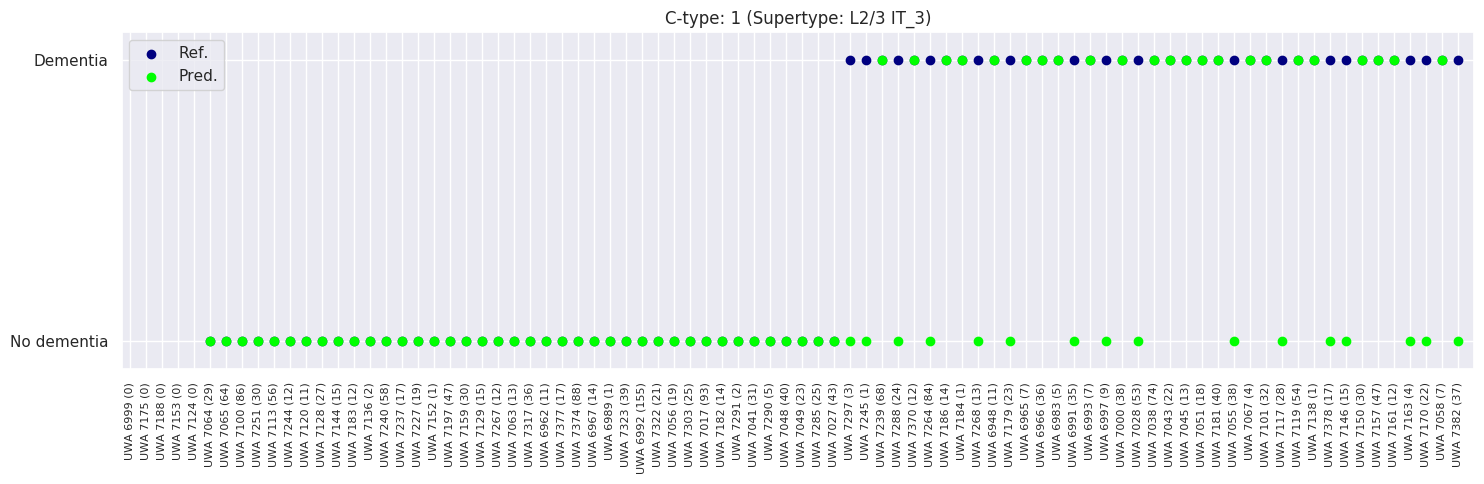

Pearsons correlation: 0.649


/home/yeganeh/miniconda3/envs/tf14-gpu/lib/python3.7/site-packages/ipykernel_launcher.py:135: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/yeganeh/miniconda3/envs/tf14-gpu/lib/python3.7/site-packages/ipykernel_launcher.py:136: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


2.0 0
using CPU ...
Total loss: 0.05271622200349444
Total loss: 0.0537933084721628
Total loss: 0.06112847241916155
Total loss: 0.05654955601417705
Total loss: 0.05706043306149935
Total loss: 0.04994174583177818
Total loss: 0.05654135071917584
Total loss: 0.054509591262199376
Total loss: 0.05444024777726123
Total loss: 0.05525637967021842


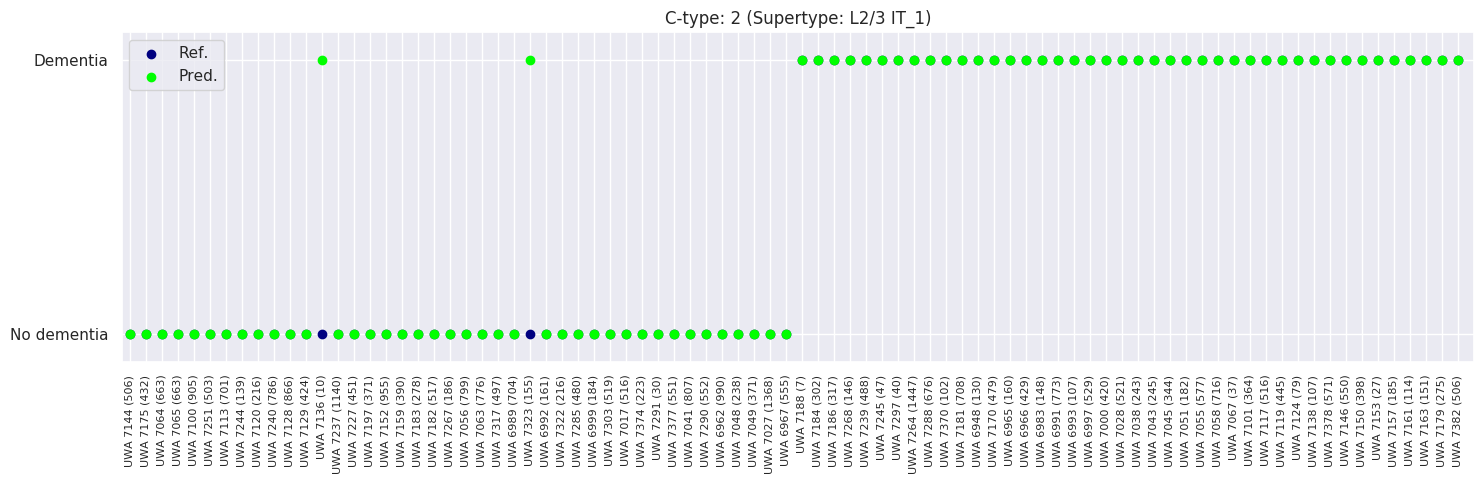

/home/yeganeh/miniconda3/envs/tf14-gpu/lib/python3.7/site-packages/ipykernel_launcher.py:131: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Pearsons correlation: 0.953
3.0 6
using CPU ...
Total loss: 0.04221462910728795
Total loss: 0.0433894619345665
Total loss: 0.04224508708076818
Total loss: 0.04795152913512928
Total loss: 0.04353344866207668
Total loss: 0.03575166647455522
Total loss: 0.05324393989784377
Total loss: 0.04955337695511324
Total loss: 0.03699705839556243
Total loss: 0.04289510626611965


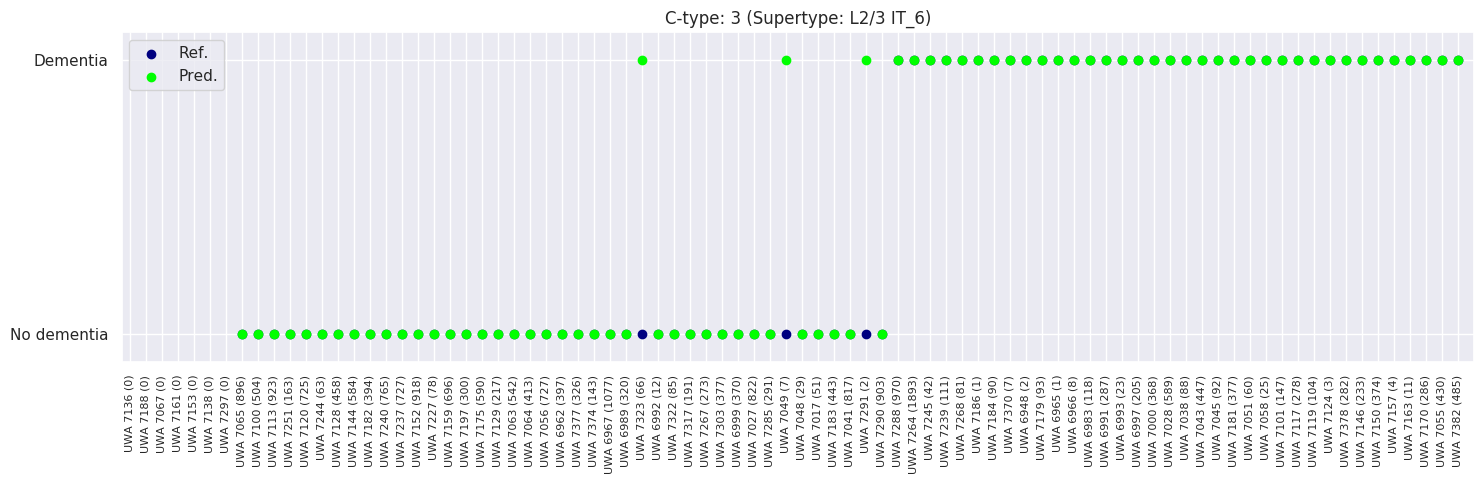

Pearsons correlation: 0.925
4.0 5
using CPU ...
Total loss: 0.044344866792218655
Total loss: 0.04786038833359877
Total loss: 0.054831470259361796
Total loss: 0.045428999389211334
Total loss: 0.05022496005727185
Total loss: 0.043561224101318255
Total loss: 0.040685608983039856
Total loss: 0.04942032280895445
Total loss: 0.04190178029239178
Total loss: 0.047916948795318604


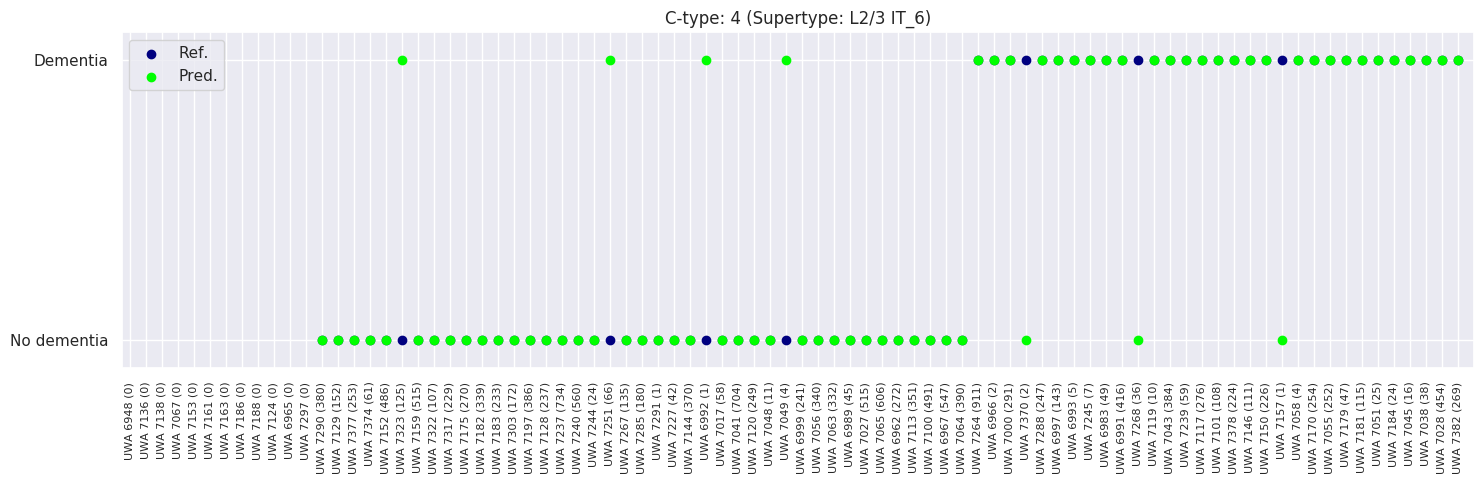

Pearsons correlation: 0.803
5.0 4
using CPU ...
Total loss: 0.04374530166387558
Total loss: 0.06033441238105297
Total loss: 0.046094803139567375
Total loss: 0.06227152422070503
Total loss: 0.055628204718232155
Total loss: 0.0565845537930727
Total loss: 0.04699644818902016
Total loss: 0.06319490447640419
Total loss: 0.042223500087857246
Total loss: 0.05743476003408432


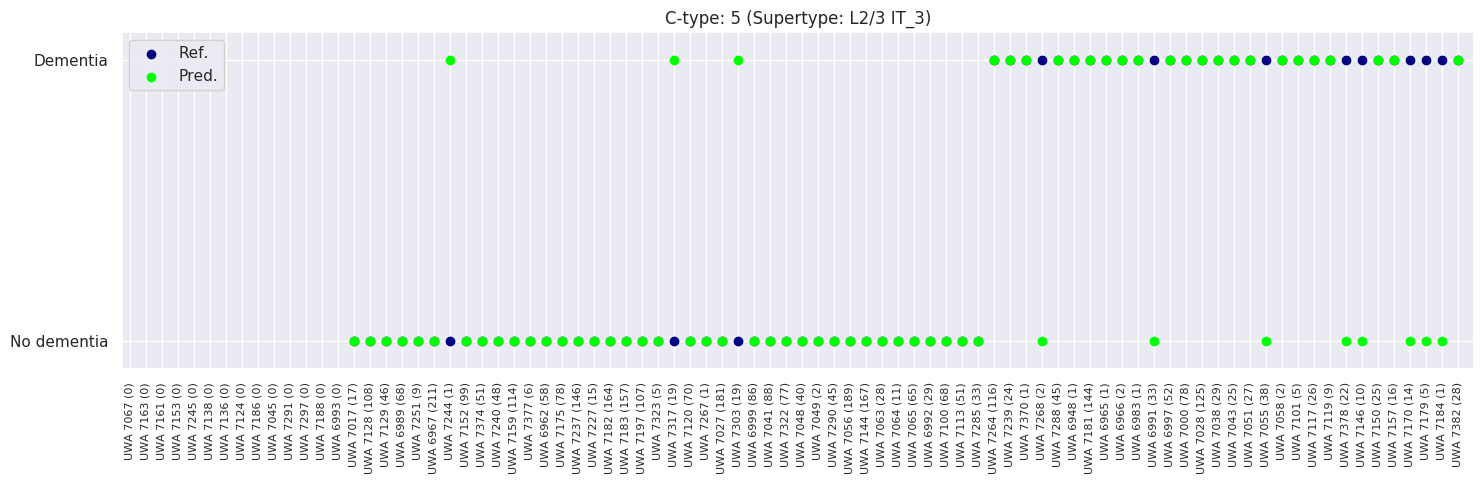

Pearsons correlation: 0.680
6.0 7
using CPU ...
Total loss: 0.11301400884985924
Total loss: 0.09469859674572945
Total loss: 0.1092618778347969
Total loss: 0.10367259383201599
Total loss: 0.08977621048688889
Total loss: 0.08838487416505814
Total loss: 0.12430057302117348
Total loss: 0.08357032015919685
Total loss: 0.08851566538214684
Total loss: 0.1175813153386116


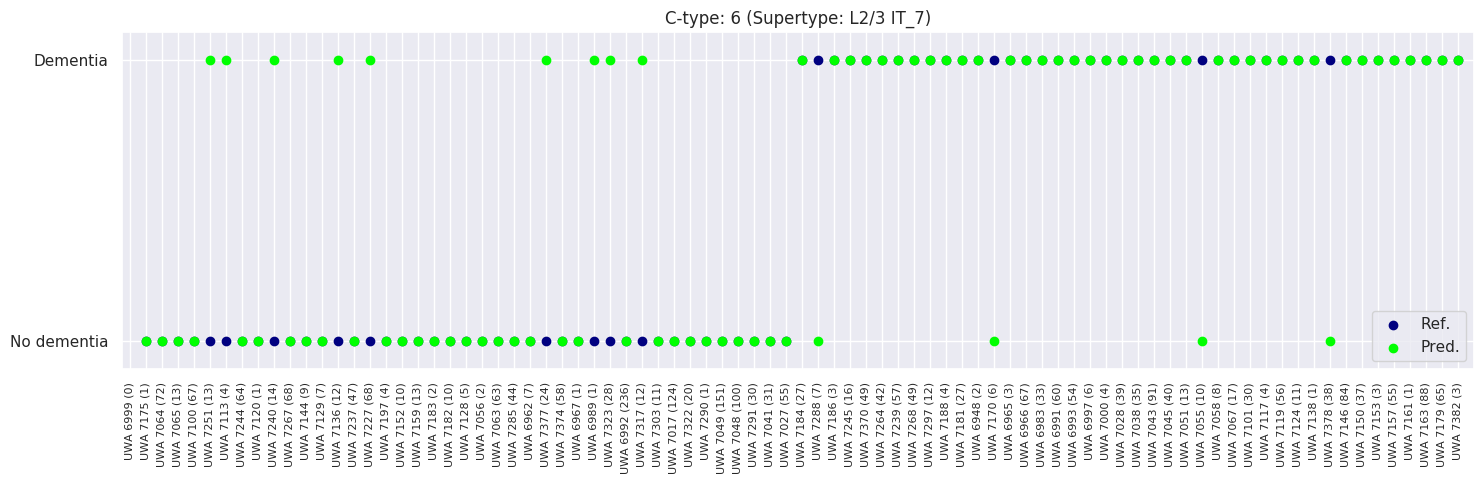

Pearsons correlation: 0.691
7.0 0
using CPU ...
Total loss: 0.05323747820768725
Total loss: 0.05647318358772763
Total loss: 0.053033403833122814
Total loss: 0.04611176548196989
Total loss: 0.0529735060819589
Total loss: 0.05747344410594772
Total loss: 0.057412352686857474
Total loss: 0.04828930550309665
Total loss: 0.05363574318642564
Total loss: 0.050732041921411807


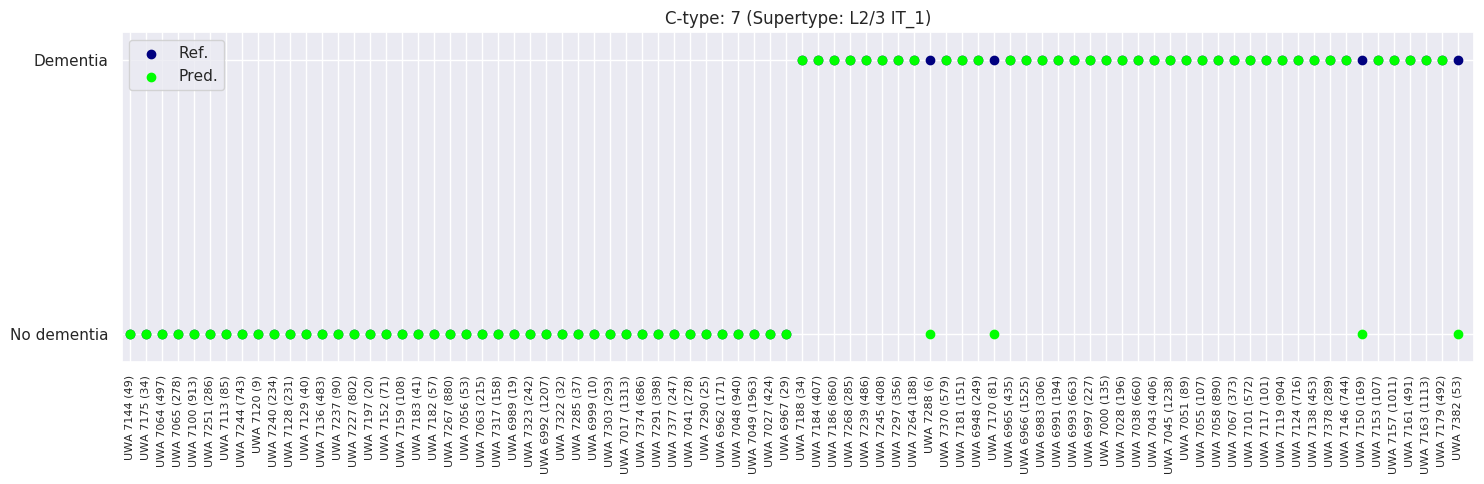

Pearsons correlation: 0.909
8.0 3
using CPU ...
Total loss: 0.043068461303067
Total loss: 0.04331344898257937
Total loss: 0.04998856224119663
Total loss: 0.04564572351851633
Total loss: 0.0532656939966338
Total loss: 0.05182927740471704
Total loss: 0.04218636932117598
Total loss: 0.04367928393185139
Total loss: 0.04204363615385124
Total loss: 0.053321999098573415


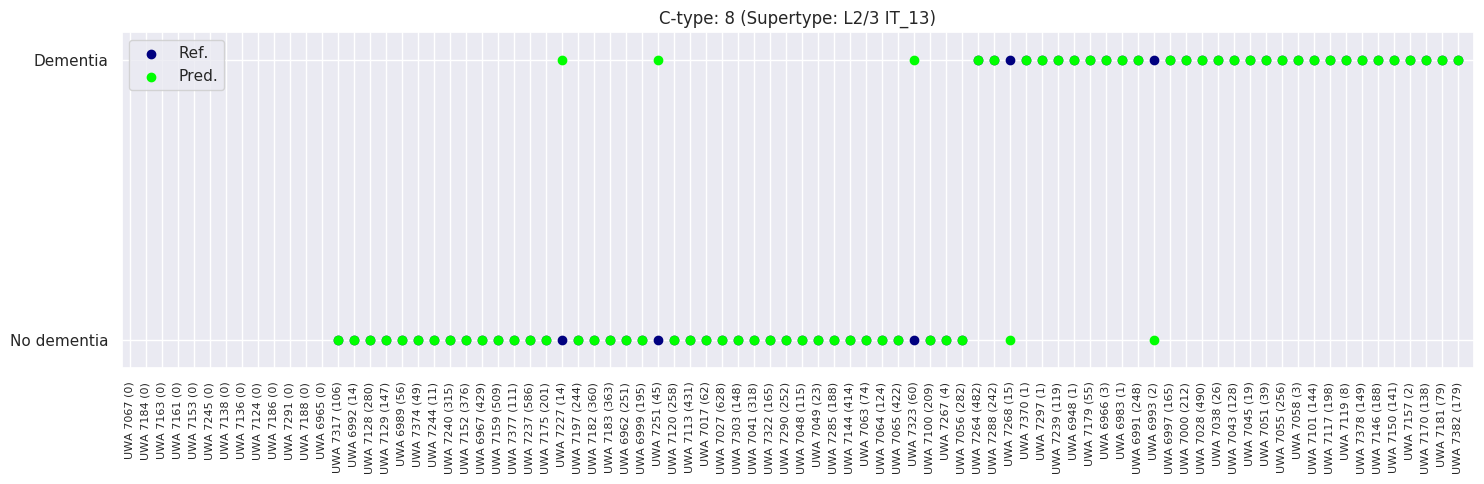

Pearsons correlation: 0.858
10.0 4
using CPU ...
Total loss: 0.049678029492497444
Total loss: 0.10355857387185097
Total loss: 0.1676008552312851
Total loss: 0.11242077872157097
Total loss: 0.12262629717588425
Total loss: 0.0845167487859726
Total loss: 0.103961531072855
Total loss: 0.04738151025958359
Total loss: 0.10301801189780235
Total loss: 0.05876733496552333


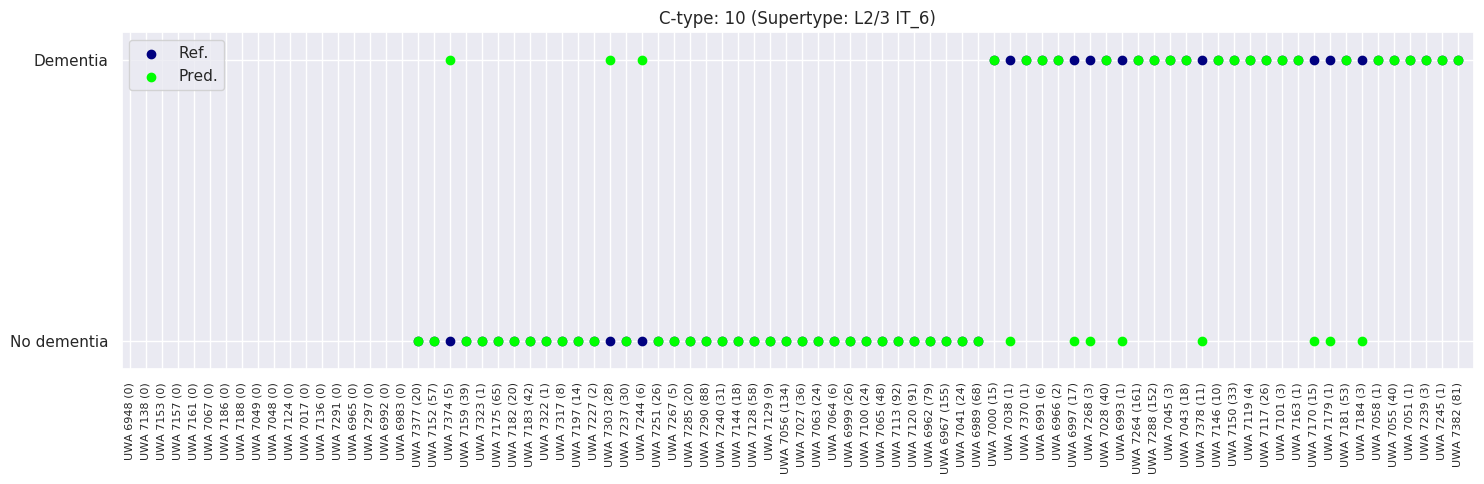

Pearsons correlation: 0.667


In [28]:
arm = 0
seed = 100
kfold = 10
state = outcome['state_mu'][arm, :, :]
pred_type = outcome['pred_label'][-1][arm, :]
s_idx = outcome['sample_id'][-1].astype(int)
cat = np.unique(pred_type)
supertypes = data['supertype_scANVI'][s_idx]
num_types = [sum(supertypes == tt) for tt in np.unique(supertypes)]
metadata = 'cognitive_status_binary'

m_ind = []
df_cs_binary = pd.DataFrame()
df_cs_binary['c'] = np.zeros(len(cat))
df_cs_binary['superype'] = np.zeros(len(cat))
df_cs_binary['pearson_corr'] = np.zeros(len(cat))
df_cs_binary['mse'] = np.zeros(len(cat))

if metadata == 'cognitive_status_binary':
    data['cs_binary'] = np.zeros(len(data[metadata]))
    indx_dem = np.where(data[metadata] == 'Dementia')[0]
    indx_nodem = np.where(data[metadata] == 'No dementia')[0]
    data['cs_binary'][indx_dem] = 1
    data['cs_binary'][indx_nodem] = 0
    metadata = 'cs_binary'
    binary = True
else:
    binary = False


for i_c, c in enumerate(cat):
    eval_dict = []
    error = []
    meta_true = []
    meta_pred = []
    donors_list = []
    idx = np.where(pred_type == c)[0]
    ref_t = data['supertype_scANVI'][s_idx[idx]]
    uniq_ref_t = np.unique(ref_t)
    meta_y = data[metadata][s_idx[idx]]
    tmp_donors = data['external_donor_name'][s_idx[idx]]
    n_types = [sum(ref_t==tt) for tt in uniq_ref_t]
    norm_count = [i / j for i, j in zip(n_types, num_types)]
    idxx = np.where(ref_t == uniq_ref_t[np.argmax(norm_count)])[0]
    print(c, np.argmax(norm_count))
    x = state[idx[idxx], :]
    y = 1. * meta_y[idxx]
    donors = tmp_donors[idxx]
    classifier = state_analyzer(saving_folder=saving_folder, device=device)
    kf = KFold(n_splits=kfold, random_state=seed, shuffle=True)
    m = 0
    for train_index, test_index in kf.split(x):
        m += 1
        classifier.init_model(input_dim=state_dim, output_dim=1, lr=0., std=0.1, c=int(c), binary=False, 
                              meta_label=metadata)
        try:
            trained_model = glob.glob(saving_folder + '/model/deepClassifier_' + metadata + 
                                      '_fold_' + str(m) + '_cat_' + str(int(c)) + '*')[0]
            classifier.load_model(trained_model)
#             f = open(saving_folder + '/summary_' + metadata + '_fold_' + str(m) + '_cat_' + str(int(c))+ '.p', "rb")
#             data_dict = pickle.load(f)
#             f.close()
#             indx = data_dict['sample_indx'].astype(int)
            donors_list.append(donors[test_index])
            eval_dict.append(classifier.eval_prediction(x[test_index, :], y[test_index], donors[test_index], 200))
            meta_true.append(eval_dict[-1]['metadata'])
            meta_pred.append(eval_dict[-1]['prediction'])
            error.append(np.mean(np.abs(eval_dict[-1]['metadata'] - eval_dict[-1]['prediction'])))
        except:
            print('quit')
            break

    if m > 1:
        meta_true = np.concatenate(meta_true)
        meta_pred = np.concatenate(meta_pred)
        donors_list = np.concatenate(donors_list)

        meta_true_mean, meta_true_std = [], []
        meta_pred_mean, meta_pred_std = [], []
        xtick = []

        for i_d, dd in enumerate(uniq_donor):
            d_idx = np.where(donors_list==dd)[0]
            xtick.append(f'{dd} ({len(d_idx)})')
            if len(d_idx) > 0:
                meta_true_mean.append(np.median(meta_true[d_idx]))
                meta_true_std.append(np.std(meta_true[d_idx]))
                meta_pred_mean.append(np.median(meta_pred[d_idx]))
                meta_pred_std.append(np.std(meta_pred[d_idx]))
            else:
                meta_true_mean.append(-10)
                meta_true_std.append(0)
                meta_pred_mean.append(-10)
                meta_pred_std.append(0)

        meta_true_mean = np.array(meta_true_mean)
        meta_true_std = np.array(meta_true_std)
        meta_pred_mean = np.array(meta_pred_mean)
        meta_pred_std = np.array(meta_pred_std)

        values = np.unique(meta_true_mean)
        meta_pred_score = []
        for p_m in meta_pred_mean:
            if p_m > 0:
                dist = (p_m - values)**2
                meta_pred_score.append(values[np.argmin(dist)])
            else:
                meta_pred_score.append(p_m)
                    

        meta_pred_score = np.array(meta_pred_score)
        color = np.array(color)
        m_indx = np.argsort(meta_true_mean)
        x = np.arange(len(uniq_donor))
        plt.figure(figsize=[15, 5],dpi=100)
        plt.scatter(x, meta_true_mean[m_indx], color='Navy', label='Ref.')
        plt.scatter(x, meta_pred_score[m_indx], color='Lime', label='Pred.')
        plt.yticks(np.unique(data[metadata]), ['No dementia', 'Dementia'])
        plt.xticks(x, np.array(xtick)[m_indx], rotation=90, fontsize=8)
        plt.xlim([-.5, np.max(x)+1])
        plt.ylim([-0.1, np.max(y)+0.1*np.max(y)])
        plt.legend()
        plt.title(f'C-type: {int(c)} (Supertype: {uniq_ref_t[np.argmax(norm_count)]})')
        plt.tight_layout()
        stype = uniq_ref_t[np.argmax(n_types)]
        plt.savefig(saving_folder + '/cs_binary_' + str(int(c)) + '_' + stype[stype.find('_')+1:] + '_arm_' + str(arm) + '.png', dpi=600)
        plt.show()
        
        y_pred = meta_pred_score[meta_pred_score >= 0]
        y_true = meta_true_mean[meta_pred_score >= 0]
        df_cs_binary['c'][i_c] = int(c)
        df_cs_binary['superype'][i_c] = uniq_ref_t[np.argmax(norm_count)]
        corr, _ = pearsonr(y_true, y_pred)
        print('Pearsons correlation: %.3f' % corr)
        df_cs_binary['pearson_corr'][i_c] = corr
        df_cs_binary['mse'][i_c] = np.mean((y_pred - y_true)**2)

In [29]:
df_cs_binary

c    superype  pearson_corr       mse
0   1.0   L2/3 IT_3      0.649034  0.202532
1   2.0   L2/3 IT_1      0.953463  0.023810
2   3.0   L2/3 IT_6      0.924951  0.038961
3   4.0   L2/3 IT_6      0.802827  0.097222
4   5.0   L2/3 IT_3      0.679924  0.157143
5   6.0   L2/3 IT_7      0.691298  0.156627
6   7.0   L2/3 IT_1      0.908893  0.047619
7   8.0  L2/3 IT_13      0.857721  0.070423
8  10.0   L2/3 IT_6      0.667211  0.166667